In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from data_utils import performing_data_cleaning
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import probplot
from scipy.stats import jarque_bera
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df = pd.read_csv('train.csv')


In [5]:
performing_data_cleaning(df)

/content/data_utils.py:84: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_picked_time=lambda x: pd.to_datetime(x["order_picked_time"], errors="coerce"),


In [6]:
df = pd.read_csv("cleaned_data.csv")

In [7]:
df.head()

rider_id   age  ratings  restaurant_latitude  restaurant_longitude  \
0   INDORES13DEL02   37.0      4.9            22.745049             75.892471   
1   BANGRES18DEL02   34.0      4.5            12.913041             77.683237   
2   BANGRES19DEL01   23.0      4.4            12.914264             77.678400   
3  COIMBRES13DEL02   38.0      4.7            11.003669             76.976494   
4   CHENRES12DEL01   32.0      4.6            12.972793             80.249982   

   delivery_latitude  delivery_longitude  order_date     weather traffic  ...  \
0          22.765049           75.912471  2022-03-19       sunny    high  ...   
1          13.043041           77.813237  2022-03-25      stormy     jam  ...   
2          12.924264           77.688400  2022-03-19  sandstorms     low  ...   
3          11.053669           77.026494  2022-04-05       sunny  medium  ...   
4          13.012793           80.289982  2022-03-26      cloudy    high  ...   

   time_taken city_name order_day  order_month order_day_of_week is_weekend  \
0          24      INDO  Saturday            3          saturday          1   
1          33      BANG    Friday            3            friday          0   
2          26      BANG  Saturday            3          saturday          1   
3          21     COIMB   Tuesday            4           tuesday          0   
4          30      CHEN  Saturday            3          saturday          1   

   pickup_time_minutes order_time_hour order_time_day   distance  
0           66116175.0            11.0        morning   2.550318  
1           66116165.0            19.0        evening  17.015498  
2           66116175.0             8.0        morning   1.309035  
3           66116170.0            18.0        evening   6.567610  
4           66116175.0            13.0      afternoon   5.235387  

[5 rows x 26 columns]

In [8]:
df.shape

(45502, 26)

In [9]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_day', 'distance'],
      dtype='object')

In [10]:
df.describe()

age       ratings  restaurant_latitude  restaurant_longitude  \
count  43648.000000  43594.000000         41872.000000          41872.000000   
mean      29.555008      4.635287            18.913696             76.921664   
std        5.761482      0.313827             5.467265              3.503107   
min       20.000000      2.500000             9.957144             72.768726   
25%       25.000000      4.500000            12.986047             73.897902   
50%       30.000000      4.700000            19.065838             76.618203   
75%       35.000000      4.900000            22.751234             78.368855   
max       39.000000      5.000000            30.914057             88.433452   

       delivery_latitude  delivery_longitude  vehicle_condition  \
count       41872.000000        41872.000000       45502.000000   
mean           18.977356           76.985325           1.019406   
std             5.469056            3.503260           0.835229   
min             9.967144           72.778726           0.000000   
25%            13.065996           73.940327           0.000000   
50%            19.124049           76.662620           1.000000   
75%            22.820040           78.405467           2.000000   
max            31.054057           88.563452           3.000000   

       multiple_deliveries    time_taken   order_month    is_weekend  \
count         44509.000000  45502.000000  45502.000000  45502.000000   
mean              0.744928     26.297591      2.980726      0.274867   
std               0.572488      9.386419      0.546031      0.446452   
min               0.000000     10.000000      2.000000      0.000000   
25%               0.000000     19.000000      3.000000      0.000000   
50%               1.000000     26.000000      3.000000      0.000000   
75%               1.000000     32.000000      3.000000      1.000000   
max               3.000000     54.000000      4.000000      1.000000   

       pickup_time_minutes  order_time_hour      distance  
count         4.386200e+04     43862.000000  41872.000000  
mean          6.611614e+07        17.423966      8.193744  
std           1.961194e+02         4.817856      4.723454  
min           6.611472e+07         0.000000      1.235109  
25%           6.611616e+07        15.000000      3.926584  
50%           6.611617e+07        19.000000      7.750068  
75%           6.611618e+07        21.000000     11.533546  
max           6.611618e+07        23.000000     17.678093

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

In [12]:
df.nunique()

rider_id                1320
age                       20
ratings                   26
restaurant_latitude      388
restaurant_longitude     388
delivery_latitude       4362
delivery_longitude      4362
order_date                44
weather                    6
traffic                    4
vehicle_condition          4
type_of_order              4
type_of_vehicle            4
multiple_deliveries        4
festival                   2
city_type                  3
time_taken                45
city_name                 22
order_day                  7
order_month                3
order_day_of_week          7
is_weekend                 2
pickup_time_minutes        6
order_time_hour           17
order_time_day             5
distance                4362
dtype: int64

In [13]:
for col in df.columns:
  print(f"{col} : {df[col].unique()}  \n")

print("Total unique value in each column :- ")
df.nunique()

rider_id : ['INDORES13DEL02 ' 'BANGRES18DEL02 ' 'BANGRES19DEL01 ' ...
 'KOCRES04DEL01 ' 'BHPRES06DEL03 ' 'GOARES03DEL03 ']  

age : [37. 34. 23. 38. 32. 22. 33. 35. 36. 21. 24. 29. 25. 31. 27. 26. 20. nan
 28. 39. 30.]  

ratings : [4.9 4.5 4.4 4.7 4.6 4.8 4.2 4.3 4.  4.1 5.  3.5 nan 3.8 3.9 3.7 2.6 2.5
 3.6 3.1 2.7 3.2 3.3 3.4 2.8 2.9 3. ]  

restaurant_latitude : [22.745049 12.913041 12.914264 11.003669 12.972793 17.431668 23.369746
 12.352058 17.433809 30.327968 10.003064 18.56245  30.899584 26.463504
 19.176269 12.311072 18.592718 17.426228 22.552672 18.563934 23.357804
 12.986047 19.221315 13.005801 26.849596 21.160522 12.934179 18.51421
 11.022477 21.160437 15.51315  15.561295       nan 18.55144  18.593481
 21.173343 17.451976 12.972532 13.064181 19.121999 21.149569 19.091458
 22.539129 12.970324 21.175975 11.003681 10.96185  27.165108 26.88842
 26.913987 12.3085   21.183434 19.254567 25.449659 30.372202 21.157735
 21.186438 12.935662 17.431477 12.933298 22.311358 12.934365 13.08

rider_id                1320
age                       20
ratings                   26
restaurant_latitude      388
restaurant_longitude     388
delivery_latitude       4362
delivery_longitude      4362
order_date                44
weather                    6
traffic                    4
vehicle_condition          4
type_of_order              4
type_of_vehicle            4
multiple_deliveries        4
festival                   2
city_type                  3
time_taken                45
city_name                 22
order_day                  7
order_month                3
order_day_of_week          7
is_weekend                 2
pickup_time_minutes        6
order_time_hour           17
order_time_day             5
distance                4362
dtype: int64

In [14]:
df.isnull().sum()

rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     3630
restaurant_longitude    3630
delivery_latitude       3630
delivery_longitude      3630
order_date                 0
weather                  525
traffic                  510
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1198
time_taken                 0
city_name                  0
order_day                  0
order_month                0
order_day_of_week          0
is_weekend                 0
pickup_time_minutes     1640
order_time_hour         1640
order_time_day             0
distance                3630
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
missing_rows = (
    df
    .isnull()
    .any(axis=1)
    .sum()
)

print(f'There are {missing_rows} missing rows in the dataset')
print(f' It accounts for {(missing_rows/df.shape[0])*100:.2f}% of the data')

There are 7438 missing rows in the dataset
 It accounts for 16.35% of the data


In [17]:
df.dtypes

rider_id                 object
age                     float64
ratings                 float64
restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
order_date               object
weather                  object
traffic                  object
vehicle_condition         int64
type_of_order            object
type_of_vehicle          object
multiple_deliveries     float64
festival                 object
city_type                object
time_taken                int64
city_name                object
order_day                object
order_month               int64
order_day_of_week        object
is_weekend                int64
pickup_time_minutes     float64
order_time_hour         float64
order_time_day           object
distance                float64
dtype: object

In [18]:
num_cols = df.columns[[1,2,3,4,5,6,16,22,25]].tolist()
cat_cols = [col for col in df.columns.tolist() if col not in num_cols]

print(f'There are {len(num_cols)} numerical columns and {len(cat_cols)} categorical columns in the data')

There are 9 numerical columns and 17 categorical columns in the data


In [19]:

cat_cols

['rider_id',
 'order_date',
 'weather',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'city_name',
 'order_day',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_hour',
 'order_time_day']

In [20]:
num_cols

['age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'time_taken',
 'pickup_time_minutes',
 'distance']

In [21]:
df[num_cols].describe()

age       ratings  restaurant_latitude  restaurant_longitude  \
count  43648.000000  43594.000000         41872.000000          41872.000000   
mean      29.555008      4.635287            18.913696             76.921664   
std        5.761482      0.313827             5.467265              3.503107   
min       20.000000      2.500000             9.957144             72.768726   
25%       25.000000      4.500000            12.986047             73.897902   
50%       30.000000      4.700000            19.065838             76.618203   
75%       35.000000      4.900000            22.751234             78.368855   
max       39.000000      5.000000            30.914057             88.433452   

       delivery_latitude  delivery_longitude    time_taken  \
count       41872.000000        41872.000000  45502.000000   
mean           18.977356           76.985325     26.297591   
std             5.469056            3.503260      9.386419   
min             9.967144           72.778726     10.000000   
25%            13.065996           73.940327     19.000000   
50%            19.124049           76.662620     26.000000   
75%            22.820040           78.405467     32.000000   
max            31.054057           88.563452     54.000000   

       pickup_time_minutes      distance  
count         4.386200e+04  41872.000000  
mean          6.611614e+07      8.193744  
std           1.961194e+02      4.723454  
min           6.611472e+07      1.235109  
25%           6.611616e+07      3.926584  
50%           6.611617e+07      7.750068  
75%           6.611618e+07     11.533546  
max           6.611618e+07     17.678093

In [22]:
(df.assign(**{
    col:df[col].astype('object')
    for col in cat_cols
})
.describe(include="object")
.T)

count unique              top     freq
rider_id               45502   1320  PUNERES01DEL01        67
order_date             45502     44       2022-03-15     1190
weather                44977      6              fog     7654
traffic                44992      4              low    15477
vehicle_condition      45502      4                2    15034
type_of_order          45502      4            snack    11512
type_of_vehicle        45502      4       motorcycle    26427
multiple_deliveries  44509.0    4.0              1.0  28109.0
festival               45274      2               no    44380
city_type              44304      3    metropolitian    34029
city_name              45502     22              JAP     3439
order_day              45502      7        Wednesday     7077
order_month            45502      3                3    31919
order_day_of_week      45502      7        wednesday     7077
is_weekend             45502      2                0    32995
order_time_hour      43862.0   17.0             21.0   4686.0
order_time_day         45502      5            night    18312

In [23]:
import missingno as msno

<Axes: >

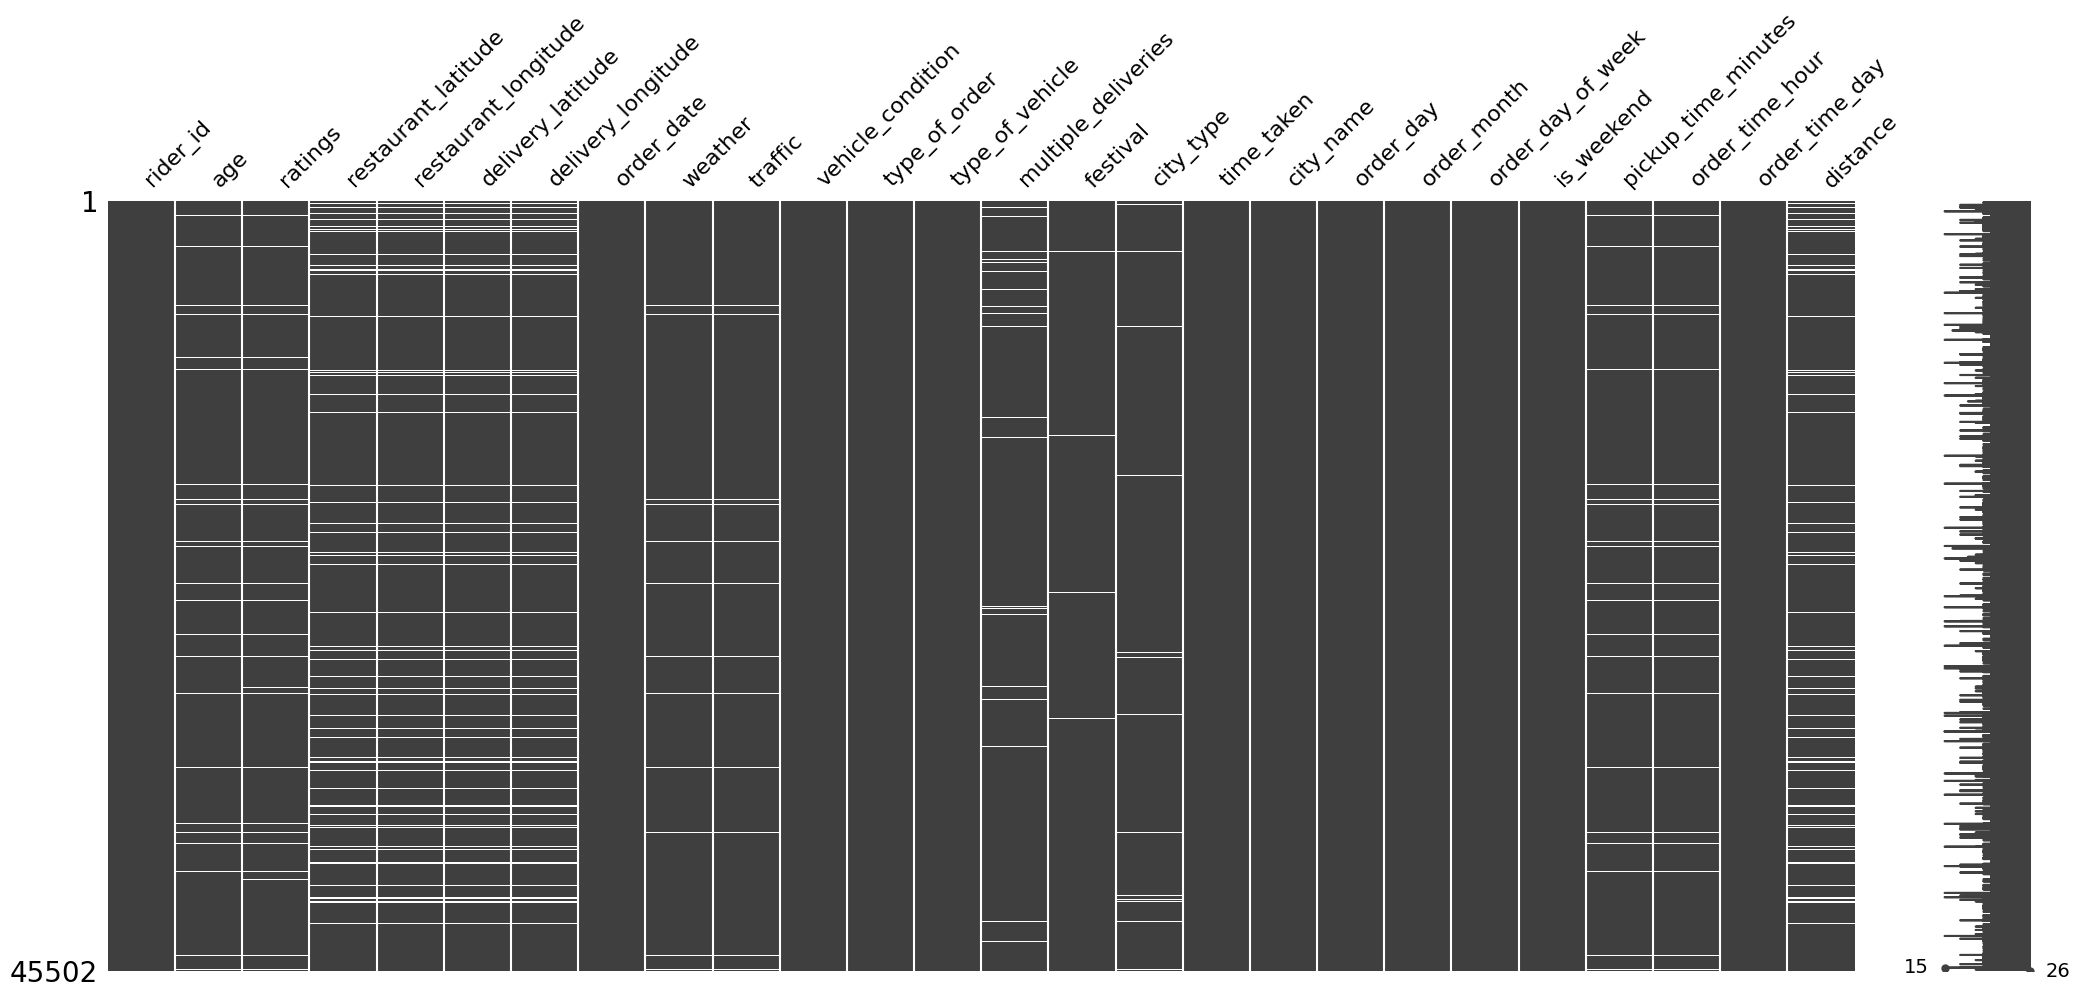

In [24]:
msno.matrix(df)

<Axes: >

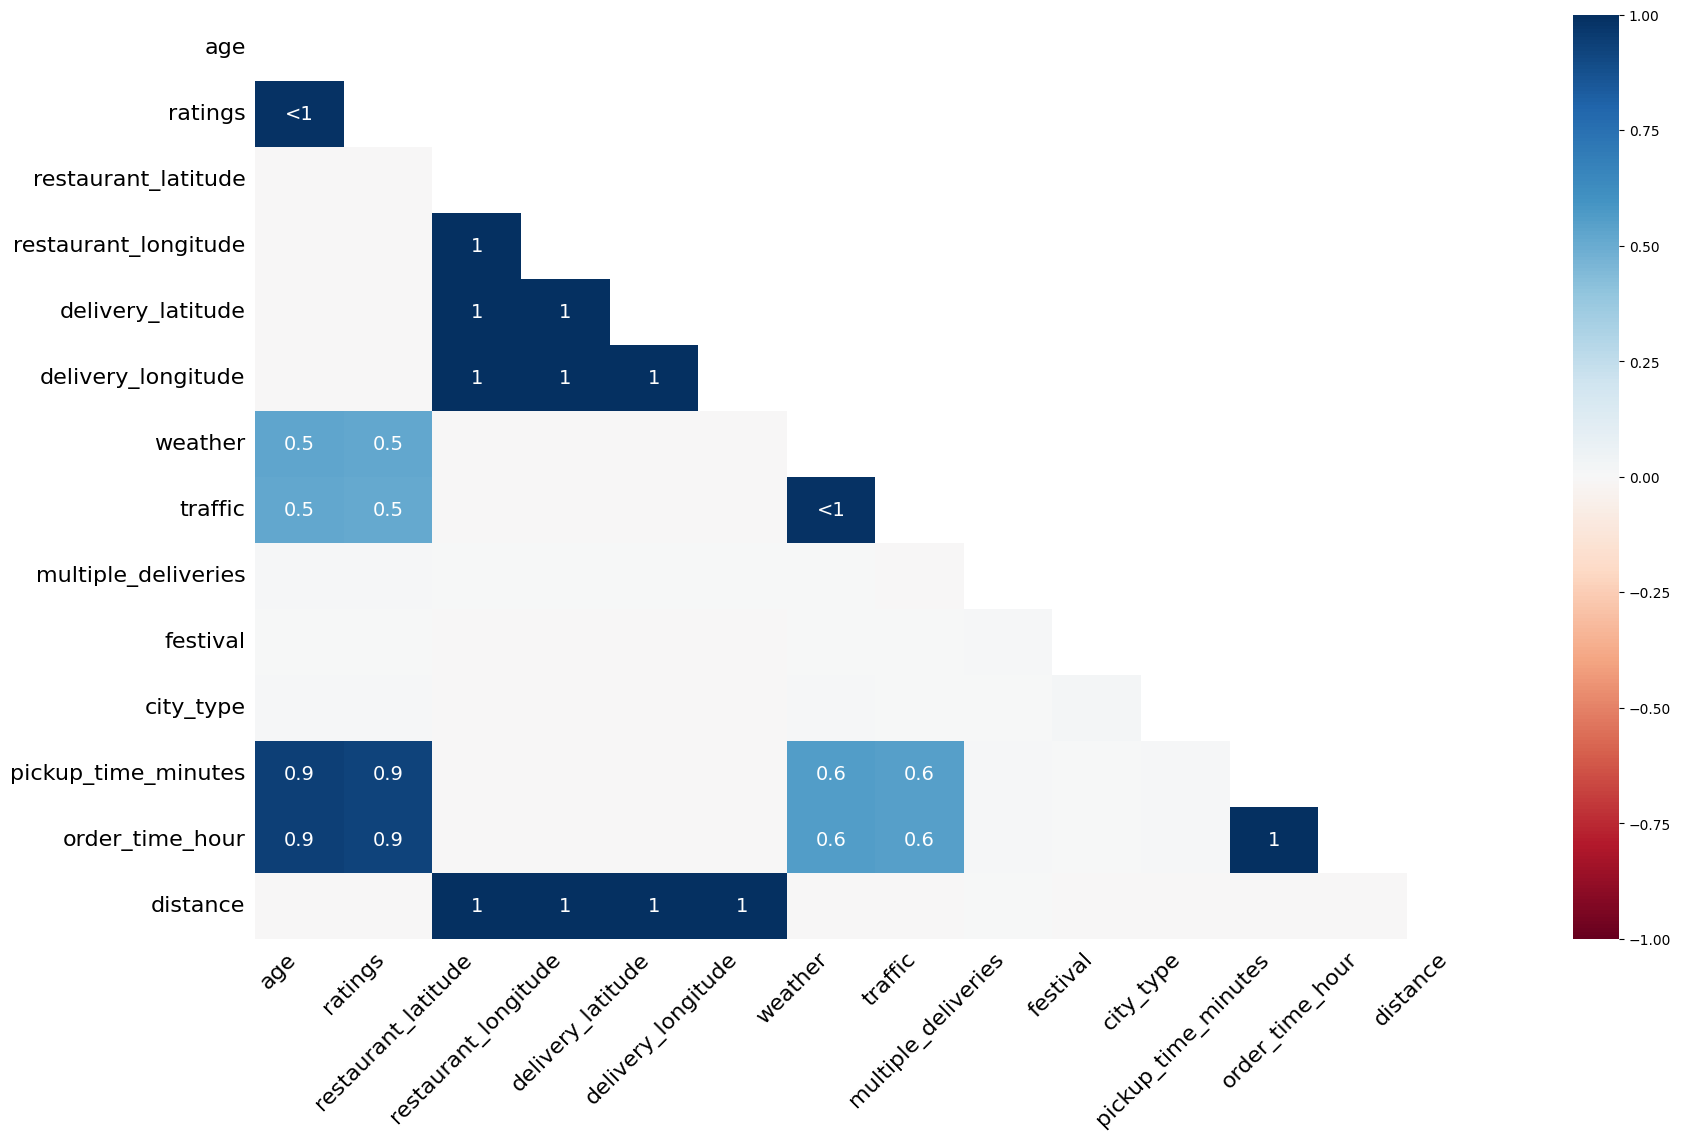

In [25]:

msno.heatmap(df)

# Functions to perform analysis

In [26]:
def numerical_analysis(dataframe, col_name, cat_col=None , bins='auto'):
  fig = plt.figure(figsize=(15,10))

  grid = gridspec.GridSpec(nrows=2, ncols = 2, figure=fig)
  ax1 = fig.add_subplot(grid[0,0])
  ax2 = fig.add_subplot(grid[0,1])
  ax3 = fig.add_subplot(grid[1,:])

  sns.kdeplot(data=dataframe, x=col_name, ax=ax1, hue=cat_col)

  sns.boxplot(data=dataframe, x=col_name, ax=ax2)

  sns.histplot(data=dataframe, x=col_name, bins=bins, hue=cat_col, kde=True, ax=ax3)

  plt.tight_layout()
  plt.show()

## About this function
🔹 Matlab Kya Hai?

Is function ka purpose hai ek numerical column ka 360° analysis ek hi figure mein:

Distribution (KDE + Histogram)

Spread & Outliers (Boxplot)

Category-wise Comparison (hue ke through)

Isse quickly samajh jaoge ki data ka spread kaisa hai, skewness hai ya nahi, outliers kitne hain, aur categories ke hisaab se values alag-alag kaisi behave karti hain.

In [27]:
def numerical_categorical_analysis(dataframe, cat_col, num_col):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    sns.boxplot(data=dataframe, x=cat_col, y=num_col, ax=axes[0, 0])
    sns.barplot(data=dataframe, x=cat_col, y=num_col, ax=axes[0, 1])
    sns.violinplot(data=dataframe, x=cat_col, y=num_col, ax=axes[1, 0])
    sns.stripplot(data=dataframe, x=cat_col, y=num_col, ax=axes[1, 1])

    plt.tight_layout()
    plt.show()


## About this function:-


🔹 Is function ka use case / fayda

Ye function categorical vs numerical analysis ke 4 alag-alag perspectives deta hai:

Boxplot → Spread + Outliers

Barplot → Central Tendency (mean/median)

Violinplot → Full distribution shape

Stripplot → Har point ka placement

👉 Matlab, agar tumhe check karna hai “Category A me values kaise distributed hain vs Category B”, toh ye 4 plots ek saath sab kuch clear kar denge.

✅ Conclusion:
Is function ko use karke tumhe numerical variable ka categorical grouping ke respect me complete picture milta hai → Central tendency, spread, distribution shape, aur raw data points sab ek saath.



## About Stripplot

🔹 Stripplot Kya Hai?

seaborn.stripplot ek scatter plot jaisa hota hai, jisme:

x-axis → categorical variable (jaise gender, city, class)

y-axis → numerical variable (jaise salary, marks, age)

Har dot ek individual data point ko represent karta hai.

🔹 Stripplot Kya Batata Hai?

Raw Data Distribution

Har ek data point dikhata hai (boxplot/violinplot me ye points hide hote hain).

Tumhe pata chalta hai ki category ke andar values kaise scattered hain.

Example:

Category = Gender, Value = Salary

Dots dikhayenge ki male salaries mostly 30k–60k hain aur ek aadmi 1 lakh kama raha hai → wo clearly outlier dikh jayega.

Density ka Approx Idea

Agar dots ek jagah zyada chipke hue hain → waha pe data dense hai.

Agar dots sparse hain → data waha kam hai.

Outlier Detection

Agar ek dot sabse alag khada hai → wo outlier hai.

Comparison Between Categories

Tum dekh sakte ho ki ek category ke values upar shift hain aur dusri ke neeche.

Matlab ek tarah se category-wise distribution comparison.



🔹 Summary (simple words me)

Boxplot → summary statistics (median, quartiles, outliers indirectly).

Violinplot → smooth distribution ka shape.

Stripplot → har ek data point ka sach (raw scatter view).

👉 Matlab stripplot wo cheez dikha deta hai jo boxplot/violin hide kar dete hain.

In [28]:
def categorical_analysis(dataframe, column_name):
  display(
      pd.DataFrame({
          "Count":(
              dataframe[column_name]
              .value_counts()
          ),
          "Percentage":(
              dataframe[column_name]
              .value_counts(normalize=True)
          )
      }

      )

  )

  print("*" * 50)
  #get unique categories
  unique_categories = dataframe[column_name].unique.tolist()
  number_of_categories = dataframe[column_name].nqunique()
  print(f" The unique categories in {column_name} column are {unique_categories}")
  print("*"*50)
  print(f"there number of categories in {column_name} column are {number_of_categories}")
  print("*"*50)

  sns.countplot(data=dataframe, x=column_name)
  plt.xticks(rotation=90)
  plt.show()

## About this function

Isko chalane se kya insights milte hain (practical guide)

Dominant categories — kaun-si category sabse zyada frequent hai (imbalanced classes dikhte hain).

Example: marketing campaign mein agar 90% users ek category mein hain → balanced splitting/stratification sochna padega.

Rare categories — bahut kam freq wali categories (long tail).

Rare categories ko group karke 'Other' banana, ya encode strategy change karna (target/frequency encoding).

Missing values — agar NaN include karo to pata chalega kitna missing hai. value_counts(dropna=False) se NaN count milega.

Typos / duplicates — unique list dekh ke pata chalega "Delhi" aur "delhi " jaise duplicates (strip/lower() se clean karna padega).

Cardinality — nunique() bataega cardinality; agar bahut high → one-hot encoding costly hoga → frequency/target/embed encoding consider karna.

Visualization — barplot se quickly samajh aata hai distribution shape (long tail, one dominating category).

Preprocessing decision — ye sab dekhar decide kar sakte ho:

one-hot vs target encoding vs embedding

group rare categories

treat missing as separate category or impute

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def categorical_analysis(df, column_name, top_n=None, dropna=False, figsize=(10,6), show_percent=True):
    """
    Robust categorical summary + barplot.
    - top_n: show only top N categories in the plot/table (useful for high-cardinality cols)
    - dropna: whether to exclude NaNs when computing unique/nunique (default False to be explicit)
    - show_percent: whether to show percentage column
    """
    s = df[column_name]

    # 1) counts and percentages (include NaN if dropna=False)
    counts = s.value_counts(dropna=dropna)
    pct = s.value_counts(normalize=True, dropna=dropna) * 100

    summary = pd.DataFrame({'Count': counts})
    if show_percent:
        summary['Percentage'] = pct.round(2)

    # If top_n specified, limit the table to top_n categories
    if top_n is not None:
        summary = summary.head(top_n)

    display(summary)  # Jupyter display

    print("*" * 50)
    unique_categories = s.dropna().unique().tolist()   # dropna in unique display (optional)
    number_of_categories = s.nunique(dropna=dropna)
    print(f"Unique categories (sample up to 20): {unique_categories[:20]}")
    print(f"Number of categories: {number_of_categories}")
    print("*" * 50)

    # 2) Visual: barplot for top categories (or all if small)
    order = counts.index if top_n is None else counts.head(top_n).index
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=counts.index if top_n is None else order,
                y=counts.values if top_n is None else counts.head(top_n).values,
                palette="Set2", ax=ax)

    # rotate x labels for readability
    ax.set_xticklabels([str(x) for x in order], rotation=90)

    # annotate bars with counts (and percent if wanted)
    for i, p in enumerate(ax.patches):
        h = p.get_height()
        if show_percent:
            percent = (h / counts.sum()) * 100
            label = f"{int(h)}\n{percent:.1f}%"
        else:
            label = f"{int(h)}"
        ax.annotate(label, (p.get_x() + p.get_width()/2., h),
                    ha='center', va='bottom', fontsize=9, xytext=(0, 4),
                    textcoords='offset points')

    ax.set_ylabel("Count")
    ax.set_xlabel(column_name)
    plt.tight_layout()
    plt.show()

    # Optionally return the summary DataFrame for further processing
    return summary


In [30]:
def multivariate_analysis(dataframe, num_col, cat_cols_1, cat_col_2):
  fig, (ax1, ax2) = plt.subplot( 2, 2 , figsize=(15, 7.5))

  sns.barplot(data=dataframe, x=cat_cols_1, y=num_col, hue =cat_col_2,gap=0.1, ax=ax1[0])
  sns.boxplot(data=dataframe, x=cat_cols_1, y=num_col, hue =cat_col_2,gap=0.1, ax=ax1[0])

  sns.violinplot(data=dataframe, x= cat_cols_1, gap=0.1, y=num_col, hue=cat_col_2, ax=ax2[0])
  sns.stripplot(data=dataframe, x=cat_cols_1, gap=0.1, y=num_col, hue=cat_col_2,dodge=True, ax=ax2[1])

  plt.tight_layout()
  plt.show()

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def multivariate_analysis(dataframe, num_col, cat_col_1, cat_col_2):
    # Create 2x2 subplot grid
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))

    # 1. Barplot → Mean comparison across groups
    sns.barplot(
        data=dataframe,
        x=cat_col_1,
        y=num_col,
        hue=cat_col_2,
        ax=ax[0, 0]
    )
    ax[0, 0].set_title(f"Barplot of {num_col} by {cat_col_1} and {cat_col_2}")

    # 2. Boxplot → Spread, median & outliers
    sns.boxplot(
        data=dataframe,
        x=cat_col_1,
        y=num_col,
        hue=cat_col_2,
        ax=ax[0, 1]
    )
    ax[0, 1].set_title(f"Boxplot of {num_col} by {cat_col_1} and {cat_col_2}")

    # 3. Violinplot → Distribution shape
    sns.violinplot(
        data=dataframe,
        x=cat_col_1,
        y=num_col,
        hue=cat_col_2,
        split=True,   # better visualization of both hue categories
        ax=ax[1, 0]
    )
    ax[1, 0].set_title(f"Violinplot of {num_col} by {cat_col_1} and {cat_col_2}")

    # 4. Stripplot → Raw datapoints distribution
    sns.stripplot(
        data=dataframe,
        x=cat_col_1,
        y=num_col,
        hue=cat_col_2,
        dodge=True,
        alpha=0.6,    # transparency to reduce overlap
        ax=ax[1, 1]
    )
    ax[1, 1].set_title(f"Stripplot of {num_col} by {cat_col_1} and {cat_col_2}")

    # Adjust layout
    plt.tight_layout()
    plt.show()


## About this function


Final Output Insight:

इस function का main फायदा यह है कि:

Barplot → Mean comparison across groups.

Boxplot → Spread, median, and outliers.

Violinplot → Shape of distribution (normal, skewed, bimodal).

Stripplot → Raw individual datapoints distribution.

👉 इससे आपको multivariate level पर numerical + categorical + categorical relationship clear दिखाई देता है।
(मतलब ek numerical feature ka behavior do categorical features ke respect me).

In [32]:
def chi_2_test(dataframe, col1, col2, alpha=0.05):
  data = (
      dataframe.loc[:,[col1, col2]]
      .dropna()
  )

  contingency_table = pd.crosstab(data[col1],data[col2])

  _, p_val, _, _ = chi2_contingency(contingency_table)
  print(p_val)
  if p_val <= alpha:
    print(f"Reject the null hypothesis. There is a significant association between {col1} and {col2}.")
  else:
    print(f"Fail to reject the null hypothesis. There is no significant association between {col1} and {col2}.")


## Step-by-Step Kya Ho Raha Hai?

data = dataframe.loc[:, [col1, col2]].dropna()

Sirf do columns (col1, col2) le raha hai.

Missing values (NaN) हटा रहा है ताकि test valid रहे।

contingency_table = pd.crosstab(data[col1], data[col2])

एक contingency table (cross-tabulation) बनाता है, मतलब दो categorical variables ke बीच frequency count.

Example: अगर col1 = Gender (Male/Female) और col2 = Purchased (Yes/No),
तो table बताएगा कितने males ने purchase किया, कितने females ने purchase किया।

chi2_contingency(contingency_table)

यह function Chi-Square Test of Independence run करता है।

Output deta hai:

chi2 statistic (हमने _ में ignore किया है)

p_val → test ka p-value

degrees of freedom (ignore किया है)

expected frequencies (ignore किया है, लेकिन useful हो सकता है diagnostic के लिए)।

if p_val <= alpha

Hypothesis testing rule apply कर रहा है।

Null Hypothesis (H₀): col1 और col2 independent हैं (कोई association नहीं है)।

Alternate Hypothesis (H₁): col1 और col2 dependent हैं (association है)।

अगर p_val ≤ alpha (default α=0.05), तो H₀ reject कर देंगे → मतलब association है।

वरना H₀ accept (fail to reject) करेंगे → मतलब कोई association नहीं है।

📊 इस function से क्या पता चलता है?

दो categorical variables के बीच relationship / dependency है या नहीं।

Example use cases:

Gender और Product Purchase behavior में relation है क्या?

Education Level और Job Type dependent हैं क्या?

City और Transport Mode choice में association है क्या?

👉 Real-world में यह test बहुत use होता है marketing analytics, survey data analysis, customer behavior analysis, medical research, social sciences में।



🔹 Ek Line mein:

Chi-Square Test ek tool hai jo categorical data mein “random coincidence” aur “actual relationship” ke beech फर्क बताता hai.

In [33]:
def annova_test(dataframe, num_col, cat_col, alpha=0.05):
  data = (
      dataframe.loc[:, [num_col, cat_col]]
      .dropna()
  )
  cat_group = data.groupby(cat_col)
  groups = [group[num_col].values for _, group in cat_group]
  f_stat, p_val = f_oneway(*groups)
  print(p_val)
  if p_val <= alpha:
    print(f"Reject the null hypothesis. There is a significant relationship between {num_col} and {cat_col}.")
  else:
    print(f"Fail to reject the null hypothesis. There is no significant relationship between  {num_col} and {cat_col}.")



## About this function



🔍 Step-by-Step Explanation
1. Data Selection & Cleaning
data = dataframe.loc[:, [num_col, cat_col]].dropna()


Sirf ek numerical column aur ek categorical column select karta hai.

Missing values drop kar deta hai (क्योंकि ANOVA missing values handle नहीं कर सकता)।

2. Grouping by Categorical Variable
cat_group = data.groupby(cat_col)
groups = [group[num_col].values for _, group in cat_group]


Categorical column ke unique values ke basis pe numerical column ko groups me todta hai.

Example:

num_col = Salary

cat_col = Education (HighSchool, Bachelor, Master)

Groups ban jaayenge:

HighSchool salaries

Bachelor salaries

Master salaries

3. Apply One-Way ANOVA
f_stat, p_val = f_oneway(*groups)


ANOVA (Analysis of Variance) test lagata hai.

One-way ANOVA check karta hai ki numerical variable ke means across multiple categories significantly different hain ya nahi.

👉 Null Hypothesis (H₀):

Sabhi groups ke means equal hain.

(Example: HighSchool, Bachelor aur Master ki salary mean same hai).

👉 Alternate Hypothesis (H₁):

कम से कम ek group ka mean alag hai.

4. Decision Rule
if p_val <= alpha:
    print("Reject H₀ → significant relationship")
else:
    print("Fail to reject H₀ → no significant relationship")


Agar p-value ≤ α (0.05) → Null reject → Matlab categories ke means me फर्क hai → Relationship hai.

Agar p-value > α → Null accept → Matlab means me फरक sirf chance se hai, real relation nahi hai.

🎯 Real-Life Example

Use Case: Education level aur salary ka relation hai kya?

Numerical = Salary

Categorical = Education (HighSchool, Bachelor, Master)

ANOVA test check karega ki salary ka average education ke according significantly differ karta hai ya nahi.

Agar p-value ≤ 0.05 → “Yes, education ka salary pe असर hai.”

Agar p-value > 0.05 → “No, salary aur education ka relation नहीं दिख रहा data se।”

🔑 Ek Line Mein:

ANOVA test numerical variable ke mean ko alag-alag categorical groups ke beech compare karta hai, aur बताता hai ki groups ke बीच differences significant hain ya sirf random chance.

In [34]:
def test_for_normality(dataframe, column_name, alpha=0.05):
  data = dataframe[column_name]
  print("Jarque Bera Test for Normality")
  _, p_val = jarque_bera(data)
  print(p_val)
  if p_val <= alpha:
    print(f"Reject the null hypothesis. The {column_name} column does not follow a normal distribution.")
  else:
    print(f"Fail to reject the null hypothesis. The {column_name} column follows a normal distribution.", end="\n\n")

## About all the three function


1️⃣ Chi-square Test (χ² Test)

Purpose: Categorical variables ke beech association ya independence check karna.

Data type: Categorical (e.g., Gender, Product Type)

Insight:

Kya do categorical variables independent hain ya related?

Example:

Variable1: Gender (Male/Female)

Variable2: Product Purchase (Yes/No)

Chi-square test se pata chalega ki purchase pattern gender pe depend karta hai ya nahi.

Null Hypothesis (H0): Variables independent hain.

Output: P-value → agar ≤ α → H0 reject → variables related.

2️⃣ ANOVA (Analysis of Variance)

Purpose: Multiple groups ke means compare karna.

Data type: Numerical dependent variable, Categorical independent variable (3+ categories)

Insight:

Kya 3 ya usse zyada groups ka average statistically different hai?

Example:

Independent variable: Teaching method (A, B, C)

Dependent variable: Test scores

ANOVA batayega ki methods ke scores me real difference hai ya sirf chance ka effect hai.

Null Hypothesis (H0): All group means are equal.

Output: P-value → agar ≤ α → H0 reject → at least ek group mean different hai.

3️⃣ Jarque-Bera Test

Purpose: Data ka normality check karna.

Data type: Numerical

Insight:

Kya data normal distribution follow karta hai?

Important for parametric tests like ANOVA, t-test, regression.

Null Hypothesis (H0): Data normal distribution follow karta hai.

Output: P-value → agar ≤ α → H0 reject → data normal nahi hai.


Workflow example:

Jarque-Bera → Check normality of numerical variable

ANOVA → If normal, compare means of groups

Chi-square → Check association between categorical variables

# Column Wise Analysis


In [35]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_day', 'distance'],
      dtype='object')

# EDA must start from target column

# Time Taken

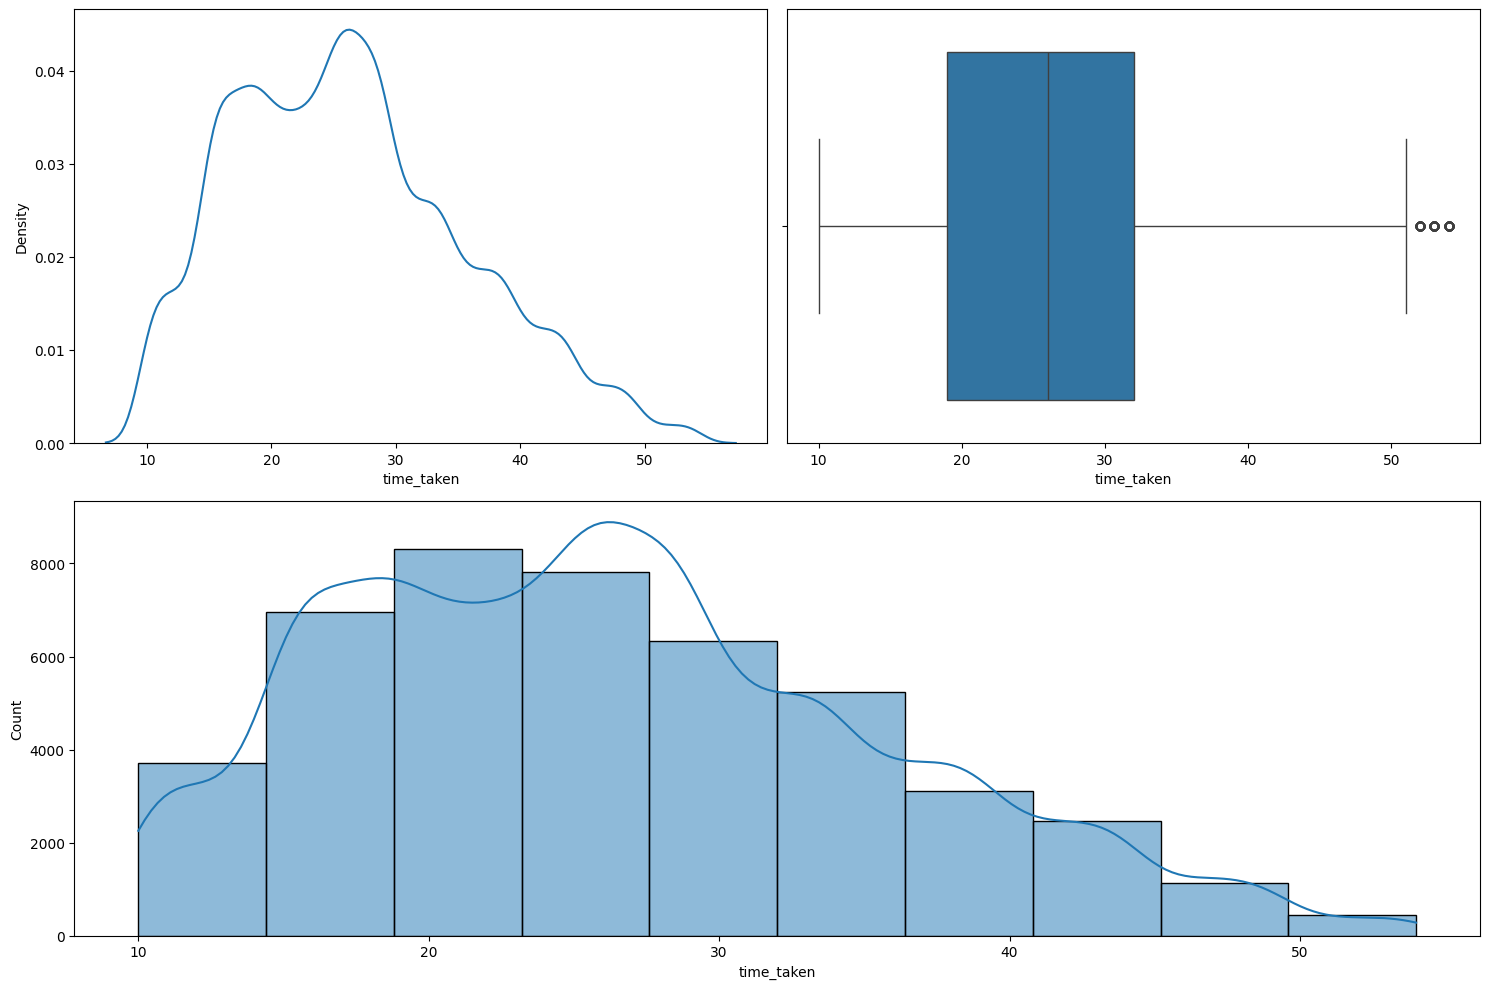

In [36]:
numerical_analysis(df, "time_taken", bins=10)

### Observations



1.   The target column is not fully continuous in nature
2.   The target column shows dual modality with two peaks - One peak around the 17-18 mark and other around 26-27 mark.
3. The target column has some extreme points which can be thought of as outliers but they are just extreme and rare , not outliers . 50 min time is possible for delivery in certain rare cases.



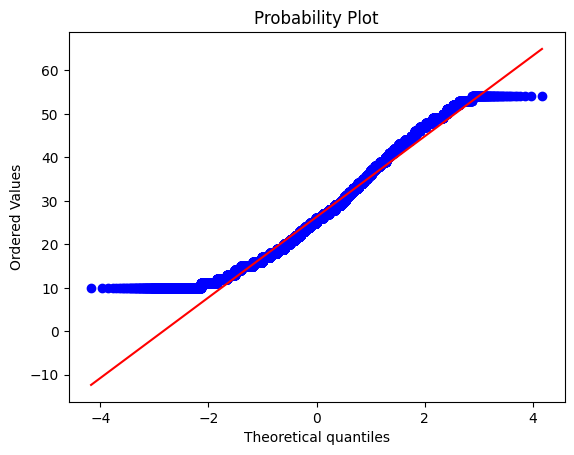

In [37]:
# Plot QQ plot for the target

probplot(df['time_taken'], plot = plt)
plt.show()

## About QQ Plot


QQ plot ka matlab hai Quantile-Quantile plot, aur ye ek graphical technique hai jo data ki distribution ko kisi theoretical distribution (mostly normal distribution) ke saath compare karta hai.

Main points step-by-step:

1️⃣ Purpose

Check karna ki data ka distribution normal hai ya nahi.

Ye statistical tests (like Jarque-Bera, Shapiro-Wilk) ka visual complement hai.

2️⃣ How it works

X-axis: Theoretical quantiles (e.g., normal distribution ke quantiles)

Y-axis: Data ke actual quantiles

Agar points roughly straight line me fall karte hain, to data normal distribution follow karta hai.

Agar points line se bahar fall karte hain (curve, S-shape), to data normal nahi hai.

3️⃣ Interpretation
Pattern in QQ plot	Insight
Straight diagonal line	Data approximately normal hai
S-shaped curve	Data me heavy tails hain (kuch extreme values)
Convex/concave curve	Data skewed hai (left ya right skew)
Outliers far from line	Extreme values present hain

In [38]:

# Test for normality

test_for_normality(df, "time_taken")

Jarque Bera Test for Normality
0.0
Reject the null hypothesis. The time_taken column does not follow a normal distribution.


In [39]:
# check out the rows where data is acting as outlier

target_25_per, target_75_per = np.percentile(df['time_taken'], [25,75])

iqr = target_75_per - target_25_per

upper_bound = target_75_per + (1.5 * iqr)
lower_bound = target_25_per - (1.5 * iqr)

df[(df['time_taken'] > upper_bound) | (df['time_taken'] < lower_bound)]
df.loc[(df['time_taken']>upper_bound), "traffic"].value_counts()

traffic
jam     241
high     24
Name: count, dtype: int64

In [40]:
df.loc[(df['time_taken']>upper_bound), "weather"].value_counts()

weather
fog           57
sunny         51
windy         44
cloudy        44
stormy        37
sandstorms    32
Name: count, dtype: int64

In [41]:
# average_distance

avg_distance = df.loc[:, "distance"].mean()
avg_distance_extreme = df.loc[(df['time_taken']>upper_bound), "distance"].mean()

print(avg_distance, avg_distance_extreme)

8.193743611976917 11.20579846513653


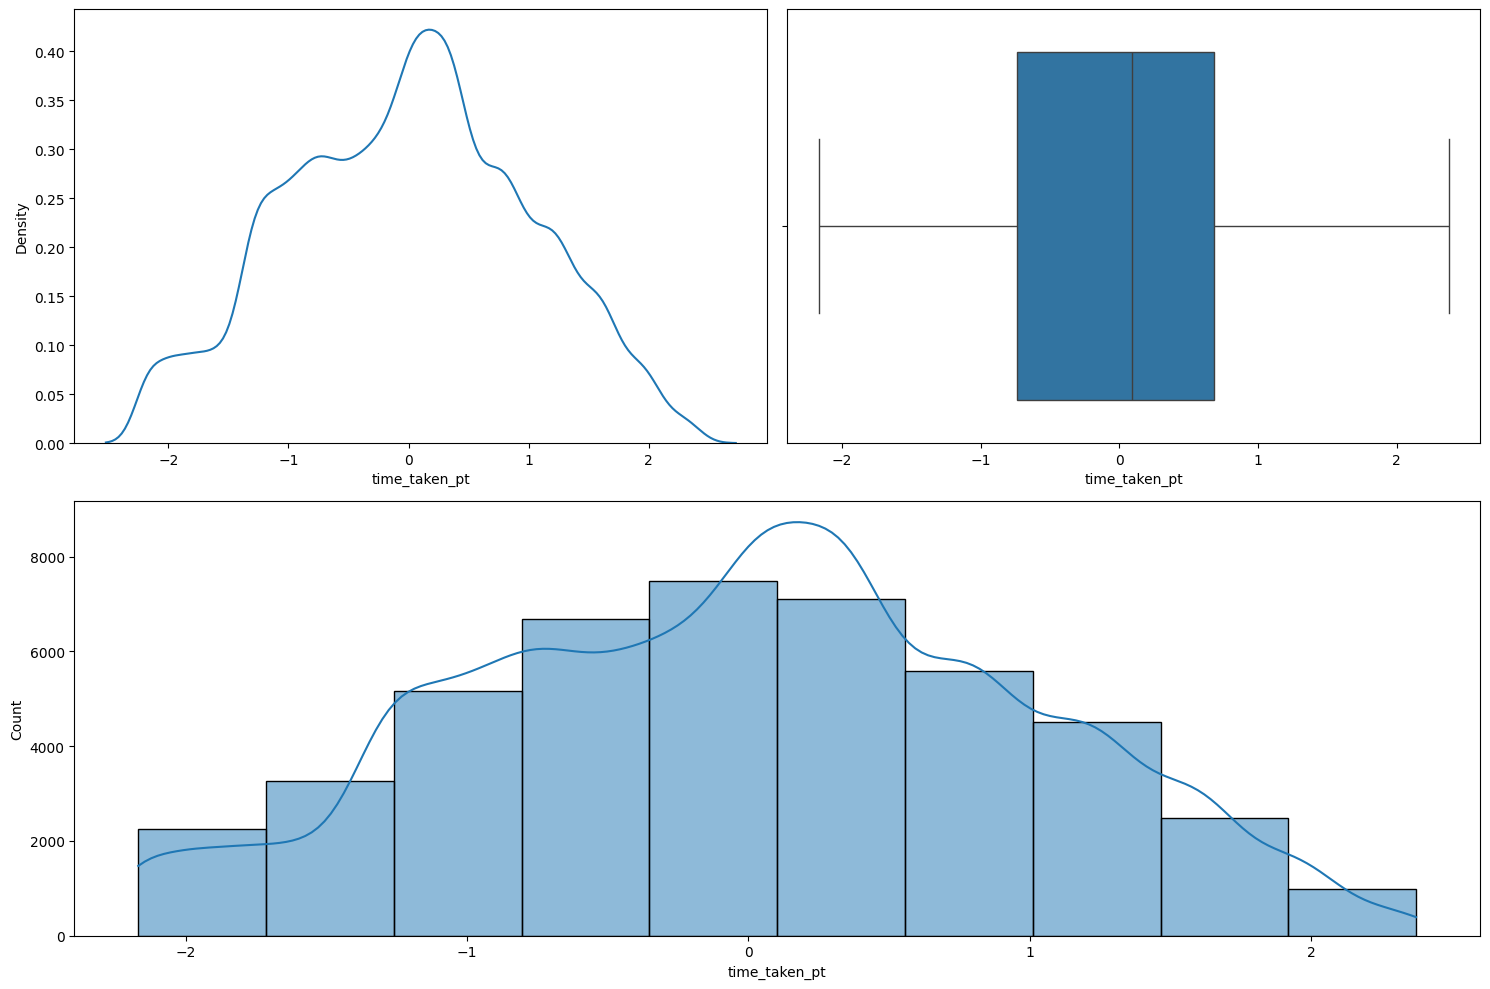

In [42]:
# fix target column using transformation

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson')

df['time_taken_pt'] = pt.fit_transform(df[['time_taken']])

numerical_analysis(df, "time_taken_pt", bins=10)

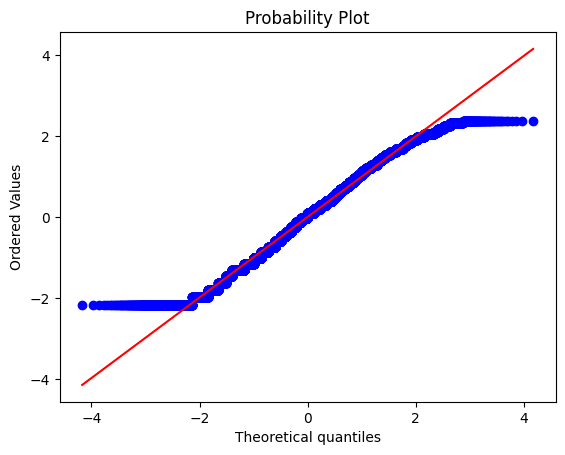

In [43]:
# Plot QQ plot for the target

probplot(df['time_taken_pt'], plot = plt)
plt.show()

# Rider Id

In [44]:
df['rider_id'].dtype

dtype('O')

In [45]:
df[['rider_id',"age","ratings"]]

rider_id   age  ratings
0        INDORES13DEL02   37.0      4.9
1        BANGRES18DEL02   34.0      4.5
2        BANGRES19DEL01   23.0      4.4
3       COIMBRES13DEL02   38.0      4.7
4        CHENRES12DEL01   32.0      4.6
...                  ...   ...      ...
45497     JAPRES04DEL01   30.0      4.8
45498     AGRRES16DEL01   21.0      4.6
45499    CHENRES08DEL03   30.0      4.9
45500   COIMBRES11DEL01   20.0      4.7
45501  RANCHIRES09DEL02   23.0      4.9

[45502 rows x 3 columns]

In [46]:
rider_id_group = df[["rider_id","age","ratings"]].groupby("rider_id")
rider_id_group.head(5).sort_values("rider_id")

rider_id   age  ratings
92     AGRRES010DEL01   34.0      4.7
7738   AGRRES010DEL01   21.0      4.7
4554   AGRRES010DEL01   38.0      4.7
12416  AGRRES010DEL01   34.0      4.5
13223  AGRRES010DEL01   39.0      4.4
...                ...   ...      ...
861     VADRES20DEL03   35.0      4.8
9792    VADRES20DEL03   30.0      4.6
9753    VADRES20DEL03   38.0      4.8
5094    VADRES20DEL03   35.0      4.9
5146    VADRES20DEL03   37.0      4.9

[6600 rows x 3 columns]

In [47]:
# Filter the duplicates
df[['rider_id','age','ratings']].dropna().duplicated(keep=False).sum()

np.int64(10155)

In [48]:
(
    df
    .loc[(df[['rider_id','age','ratings']].duplicated(keep=False)),['rider_id','age','ratings']]
    .dropna()
    .sort_values(['rider_id'])
)

rider_id   age  ratings
18533  AGRRES03DEL02   24.0      4.9
40285  AGRRES03DEL02   24.0      4.9
28473  AGRRES03DEL03   30.0      4.7
26275  AGRRES03DEL03   30.0      4.7
36131  AGRRES06DEL02   36.0      4.9
...               ...   ...      ...
12742  VADRES20DEL02   28.0      4.5
5094   VADRES20DEL03   35.0      4.9
17963  VADRES20DEL03   35.0      4.9
21957  VADRES20DEL03   37.0      4.9
5146   VADRES20DEL03   37.0      4.9

[10155 rows x 3 columns]

# Age

In [49]:
# data type of age column

df['age'].dtype

dtype('float64')

In [50]:
df['age'].describe()

count    43648.000000
mean        29.555008
std          5.761482
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

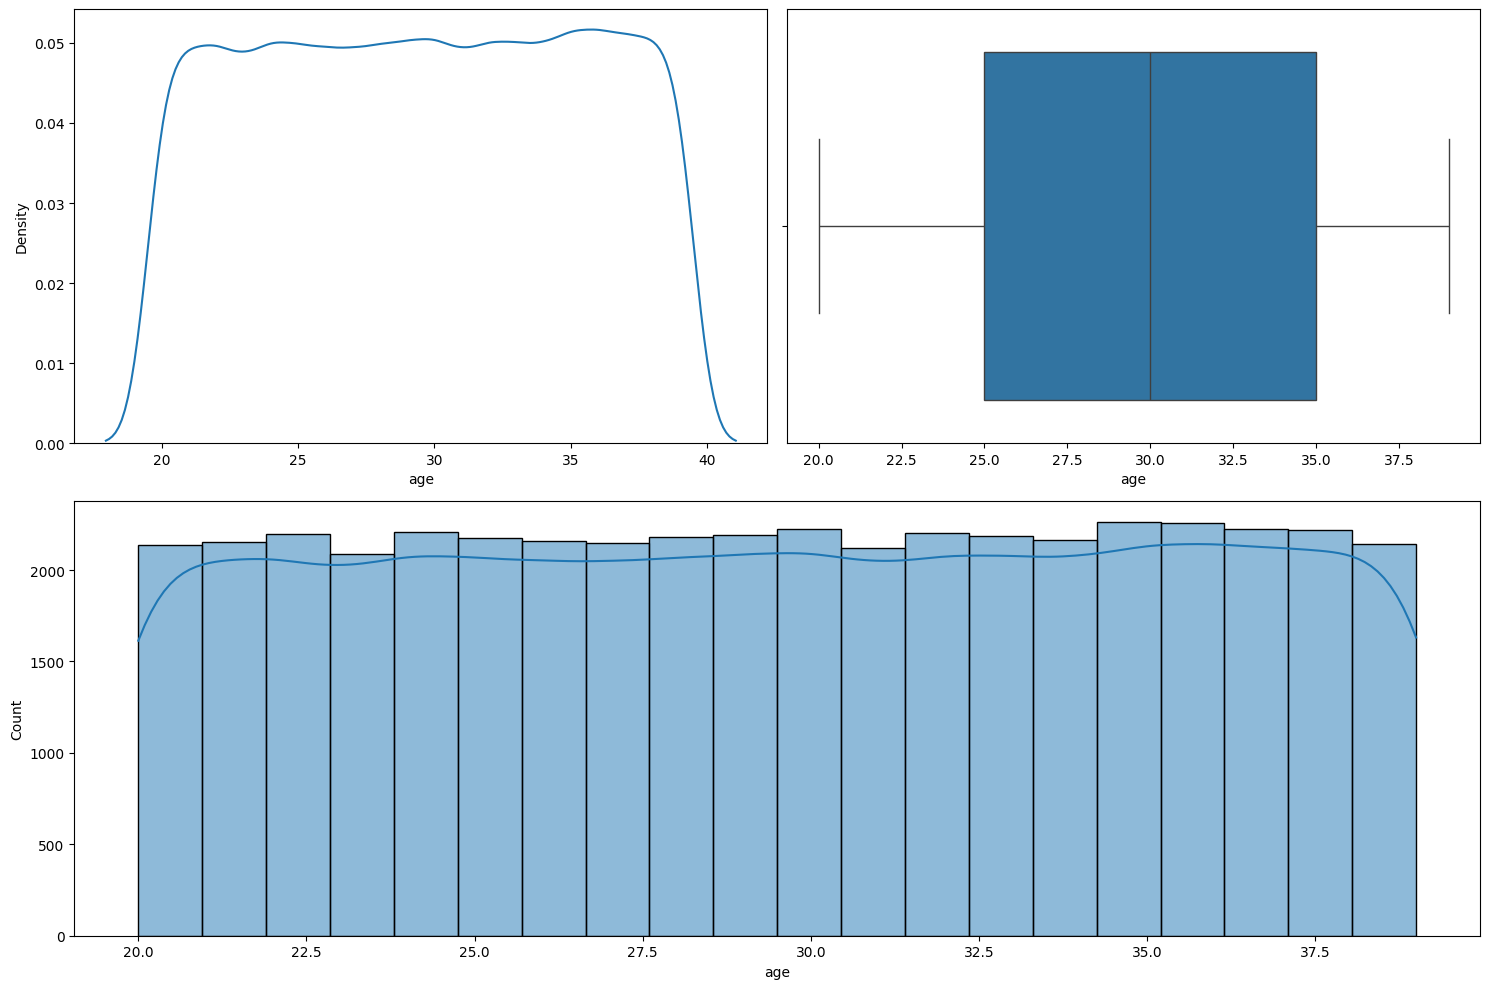

In [51]:
numerical_analysis(df,"age",bins=20)

<Axes: xlabel='age', ylabel='time_taken'>

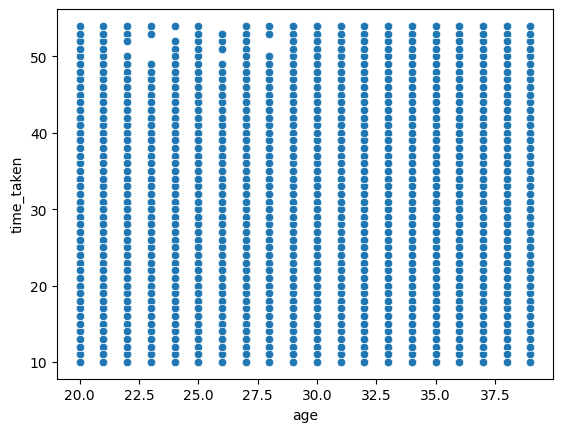

In [52]:
sns.scatterplot(data=df,x='age',y='time_taken' )

<Axes: xlabel='type_of_vehicle', ylabel='age'>

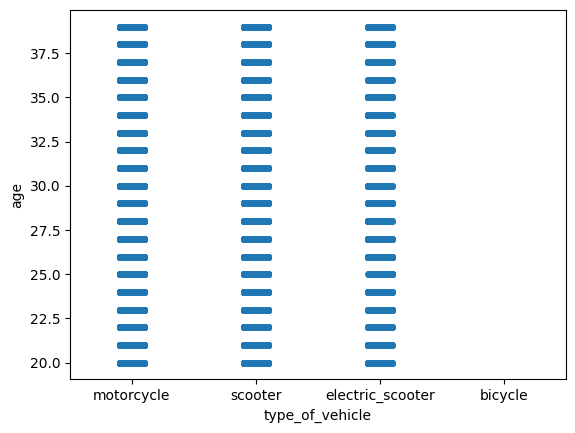

In [53]:
sns.stripplot(df,x='type_of_vehicle',y='age')

# Ratings

In [54]:
df['ratings'].dtype

dtype('float64')

In [55]:
df['ratings'].describe()

count    43594.000000
mean         4.635287
std          0.313827
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: ratings, dtype: float64

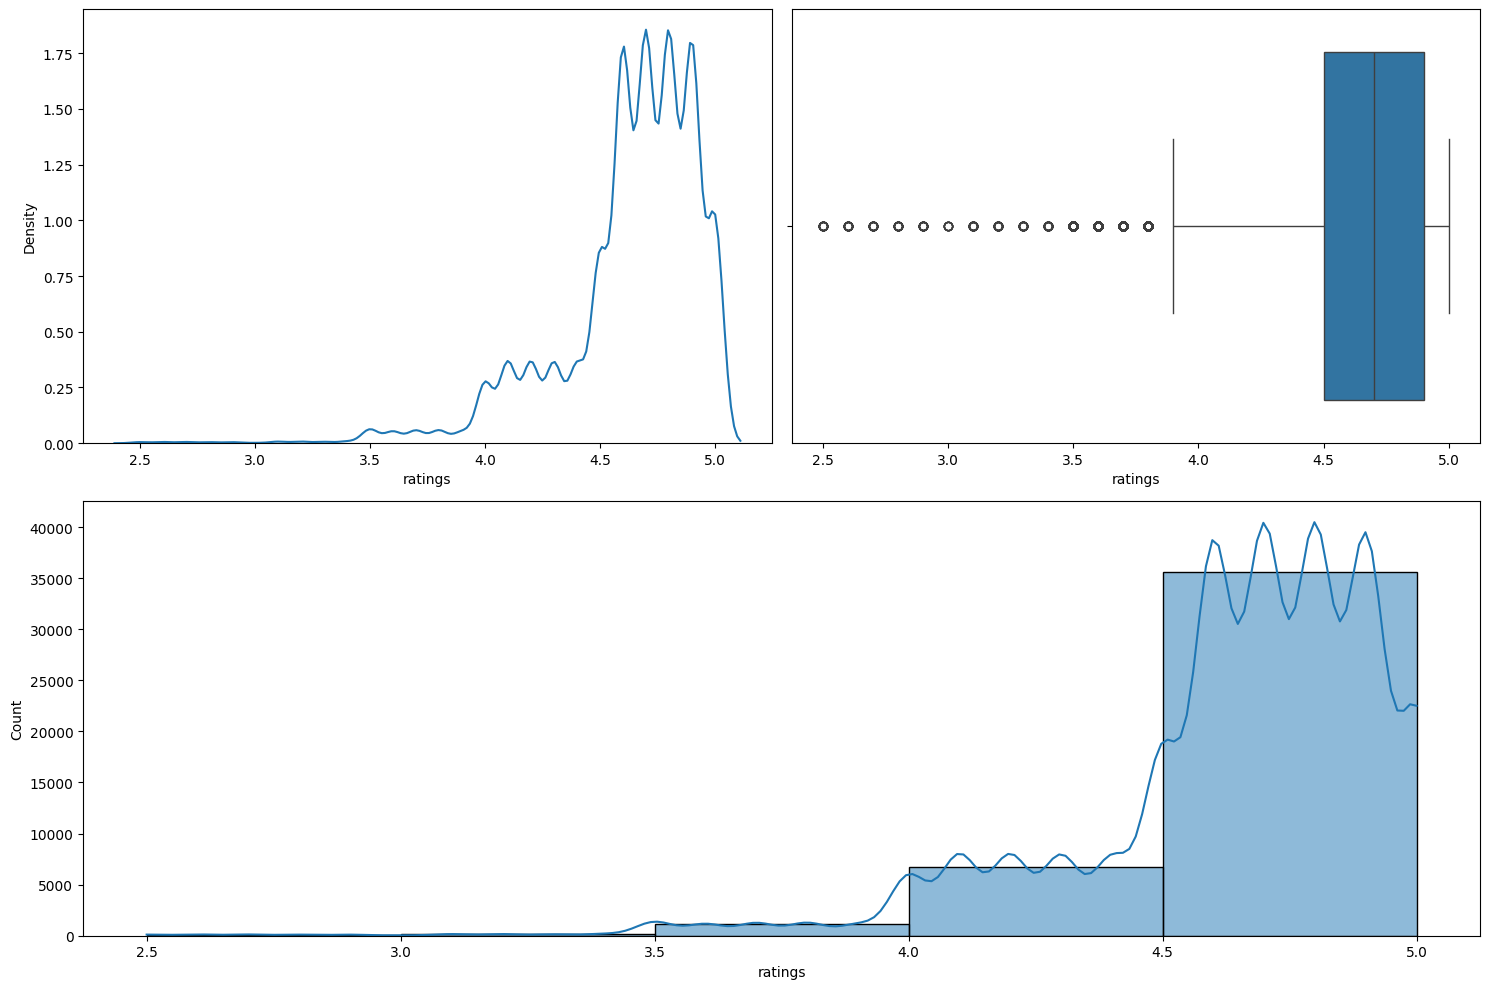

In [56]:
numerical_analysis(df,'ratings', bins=5)

<Axes: xlabel='ratings', ylabel='time_taken'>

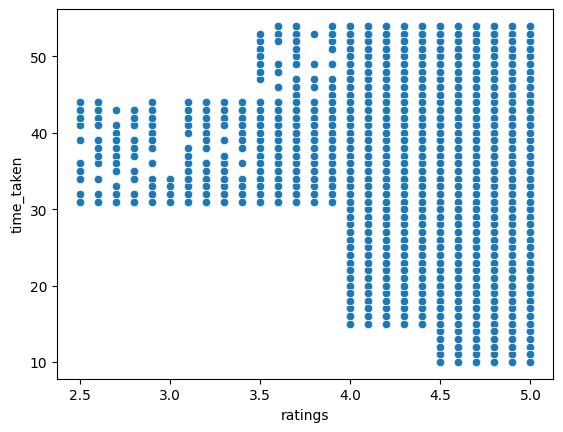

In [57]:
sns.scatterplot(data=df, x='ratings',y='time_taken')

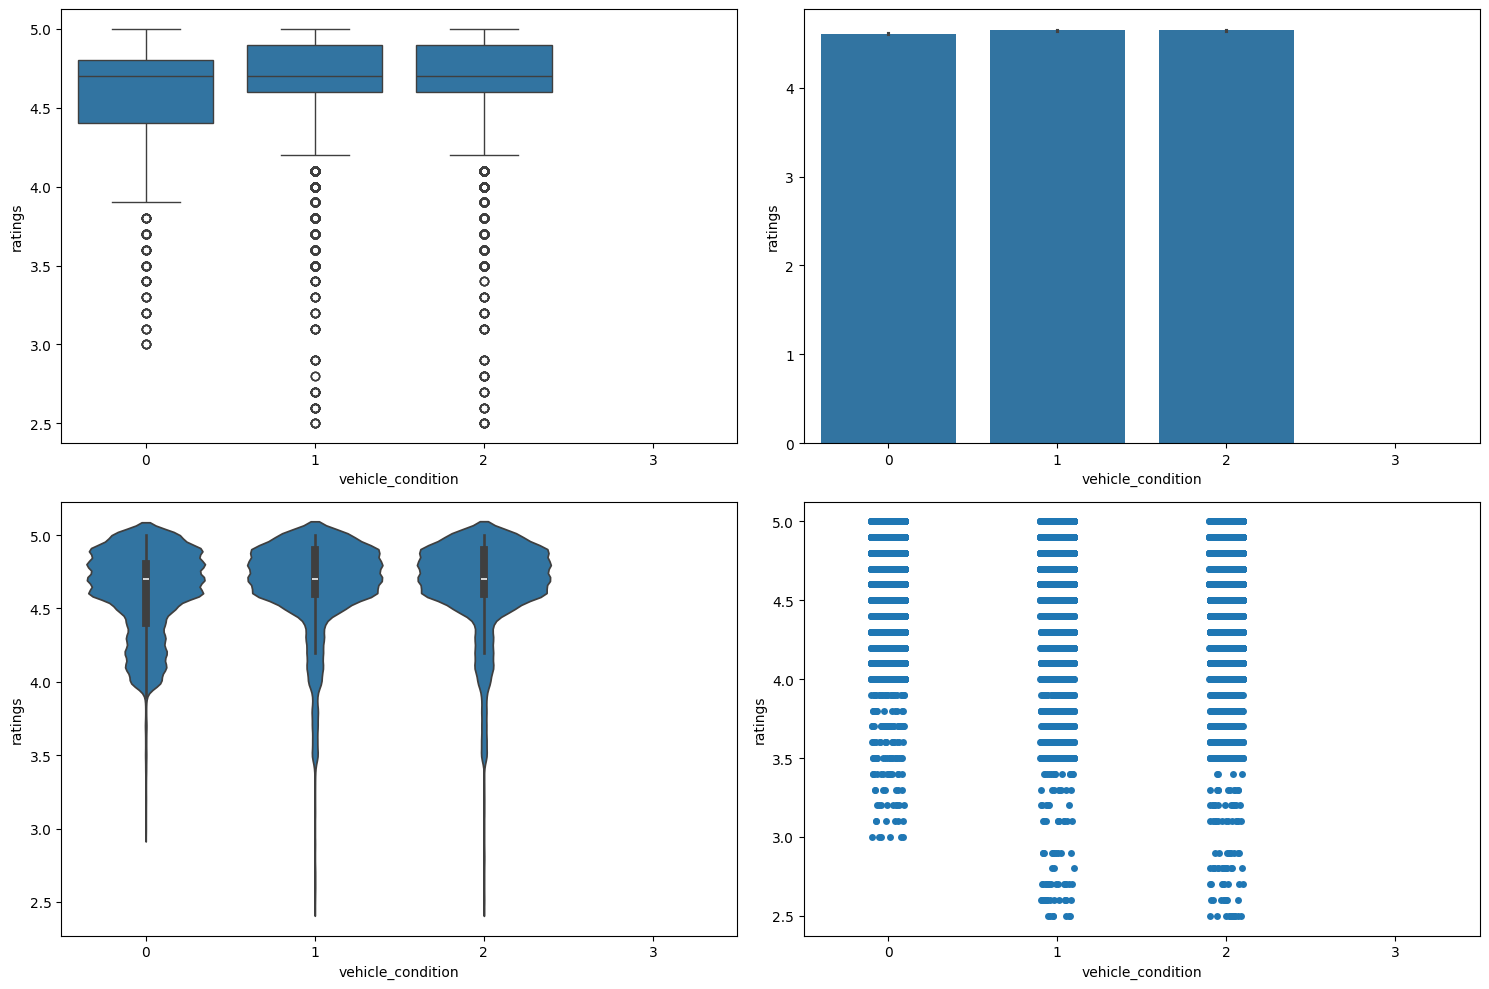

In [58]:
numerical_categorical_analysis(df, 'vehicle_condition', 'ratings')

## Insights



1.   The more worst the vehicle condition is the more lower the rating gets
2.   The category 3 has no data means there are NaN values . This simply means that customer avoid ratings their riders even rating of 1 when
the vehicle condition is bad



In [59]:
(
    df[['ratings','vehicle_condition']]
    .loc[df['vehicle_condition']==3,'ratings']
    .value_counts(dropna=False)
)

ratings
NaN    429
Name: count, dtype: int64

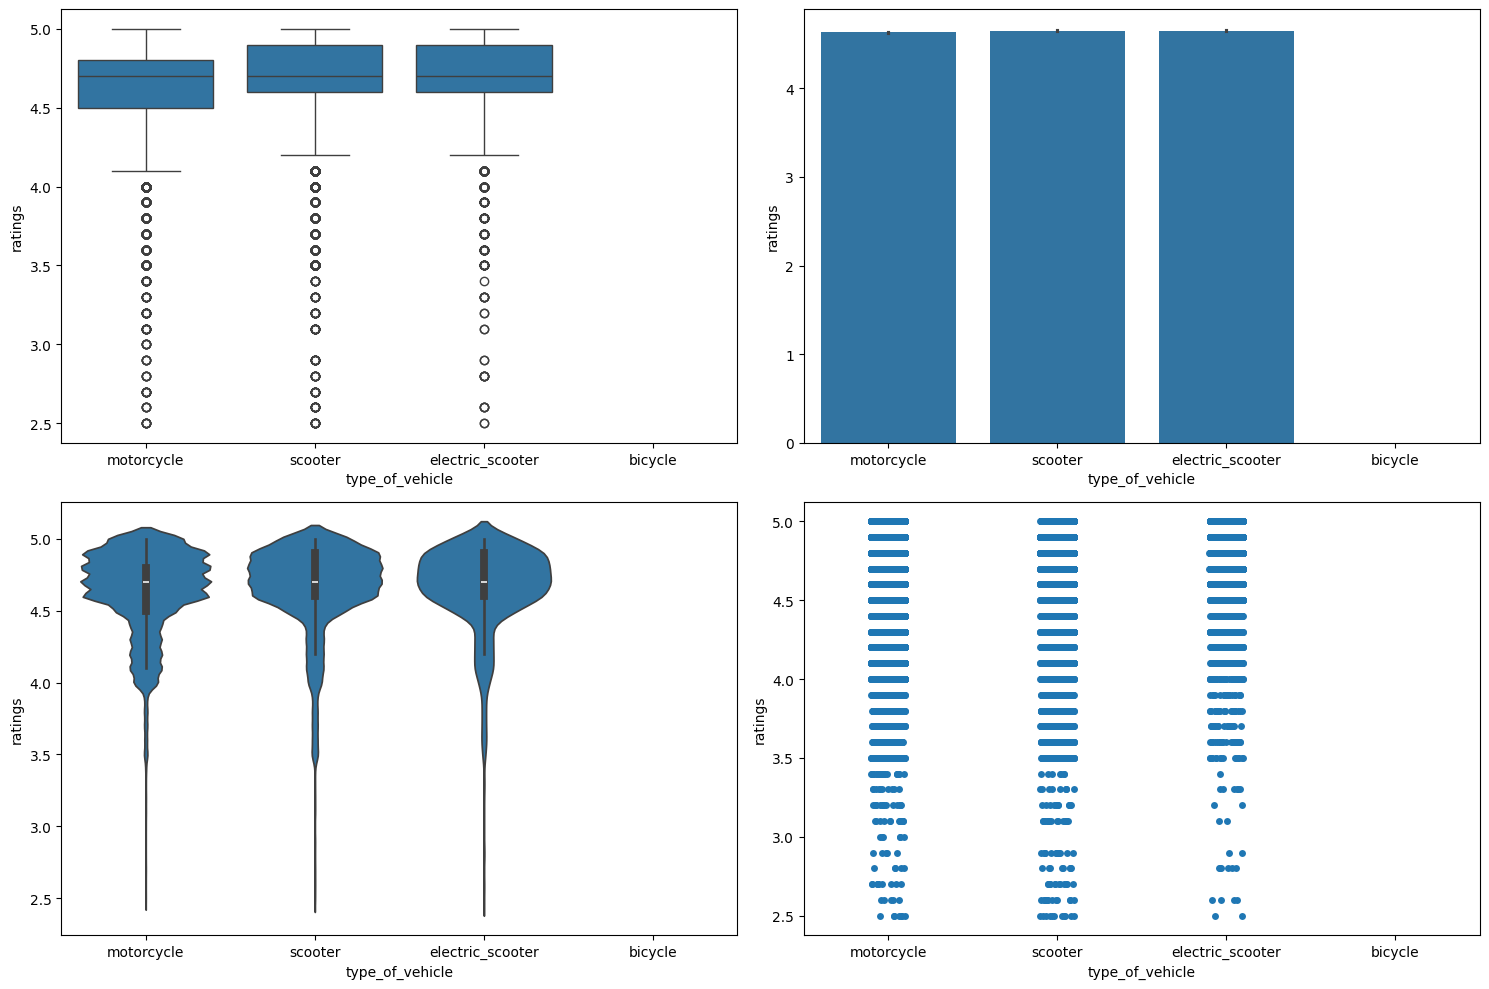

In [60]:
numerical_categorical_analysis(df, 'type_of_vehicle', 'ratings')

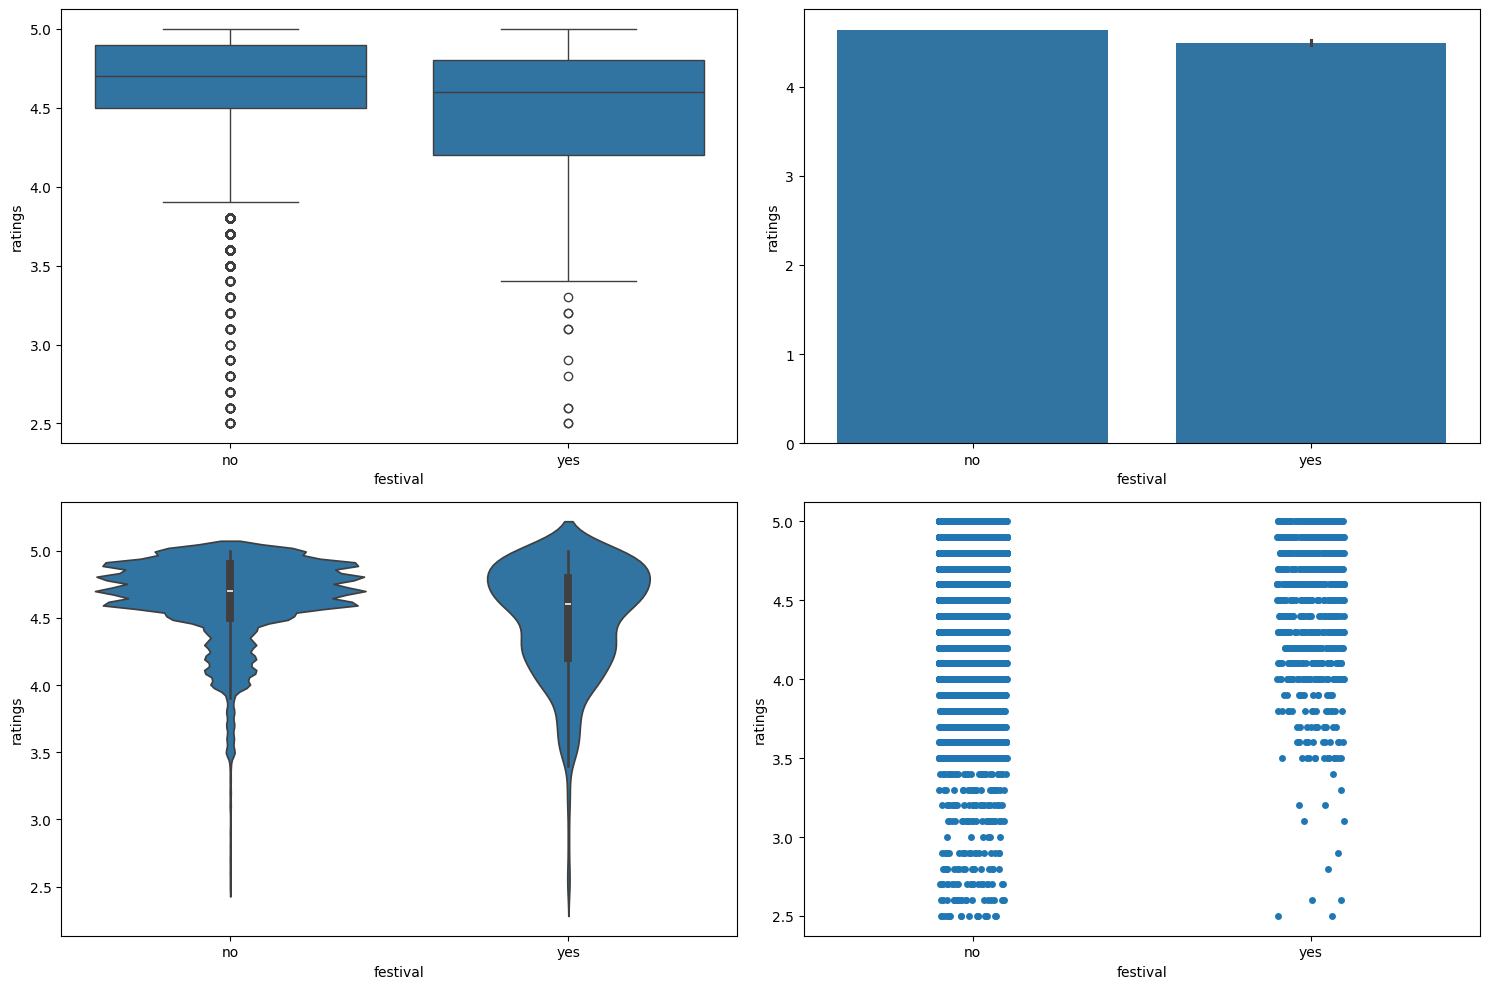

In [61]:
numerical_categorical_analysis(df, 'festival', 'ratings')

# Location Based Features

In [62]:
df.columns[3:7].tolist() + ["city_name"]

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'city_name']

In [63]:
location_subset = df.loc[:,df.columns[3:7].tolist()+["city_name"]]

location_subset

restaurant_latitude  restaurant_longitude  delivery_latitude  \
0                22.745049             75.892471          22.765049   
1                12.913041             77.683237          13.043041   
2                12.914264             77.678400          12.924264   
3                11.003669             76.976494          11.053669   
4                12.972793             80.249982          13.012793   
...                    ...                   ...                ...   
45497            26.902328             75.794257          26.912328   
45498                  NaN                   NaN                NaN   
45499            13.022394             80.242439          13.052394   
45500            11.001753             76.986241          11.041753   
45501            23.351058             85.325731          23.431058   

       delivery_longitude city_name  
0               75.912471      INDO  
1               77.813237      BANG  
2               77.688400      BANG  
3               77.026494     COIMB  
4               80.289982      CHEN  
...                   ...       ...  
45497           75.804257       JAP  
45498                 NaN       AGR  
45499           80.272439      CHEN  
45500           77.026241     COIMB  
45501           85.405731    RANCHI  

[45502 rows x 5 columns]

In [64]:
location_subset.dtypes

restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
city_name                object
dtype: object

In [65]:
location_subset.dropna(inplace=True)

location_subset

restaurant_latitude  restaurant_longitude  delivery_latitude  \
0                22.745049             75.892471          22.765049   
1                12.913041             77.683237          13.043041   
2                12.914264             77.678400          12.924264   
3                11.003669             76.976494          11.053669   
4                12.972793             80.249982          13.012793   
...                    ...                   ...                ...   
45496            23.371292             85.327872          23.481292   
45497            26.902328             75.794257          26.912328   
45499            13.022394             80.242439          13.052394   
45500            11.001753             76.986241          11.041753   
45501            23.351058             85.325731          23.431058   

       delivery_longitude city_name  
0               75.912471      INDO  
1               77.813237      BANG  
2               77.688400      BANG  
3               77.026494     COIMB  
4               80.289982      CHEN  
...                   ...       ...  
45496           85.437872    RANCHI  
45497           75.804257       JAP  
45499           80.272439      CHEN  
45500           77.026241     COIMB  
45501           85.405731    RANCHI  

[41872 rows x 5 columns]

In [66]:
# plot deliveries on map

delivery_df = pd.DataFrame({
    'latitude': location_subset['delivery_latitude'],
    'longitude': location_subset['delivery_longitude'],
    'city': location_subset['city_name']
})

In [67]:
#create a map using plotly's scatter_mapbox

fig = px.scatter_mapbox(
    delivery_df,
    lat='latitude',
    lon = 'longitude',
    title = 'Delivery points',
    hover_name = "city"
)

fig.update_layout(
    mapbox_style = "carto-positron",
    mapbox_center = {"lat":20.5937, "lon":78.9629},
    mapbox_zoom = 3
)

fig.show()


# Order Date

In [68]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_day', 'distance', 'time_taken_pt'],
      dtype='object')

In [69]:
df.filter(like="order")

order_date type_of_order  order_day  order_month order_day_of_week  \
0      2022-03-19         snack   Saturday            3          saturday   
1      2022-03-25         snack     Friday            3            friday   
2      2022-03-19        drinks   Saturday            3          saturday   
3      2022-04-05        buffet    Tuesday            4           tuesday   
4      2022-03-26         snack   Saturday            3          saturday   
...           ...           ...        ...          ...               ...   
45497  2022-03-24          meal   Thursday            3          thursday   
45498  2022-02-16        buffet  Wednesday            2         wednesday   
45499  2022-03-11        drinks     Friday            3            friday   
45500  2022-03-07         snack     Monday            3            monday   
45501  2022-03-02         snack  Wednesday            3         wednesday   

       order_time_hour order_time_day  
0                 11.0        morning  
1                 19.0        evening  
2                  8.0        morning  
3                 18.0        evening  
4                 13.0      afternoon  
...                ...            ...  
45497             11.0        morning  
45498             19.0        evening  
45499             23.0          night  
45500             13.0      afternoon  
45501             17.0        evening  

[45502 rows x 7 columns]

In [70]:
order_date_subset = df.loc[:,["order_date","order_day","order_month","order_day_of_week","is_weekend","festival"]]

order_date_subset

order_date  order_day  order_month order_day_of_week  is_weekend  \
0      2022-03-19   Saturday            3          saturday           1   
1      2022-03-25     Friday            3            friday           0   
2      2022-03-19   Saturday            3          saturday           1   
3      2022-04-05    Tuesday            4           tuesday           0   
4      2022-03-26   Saturday            3          saturday           1   
...           ...        ...          ...               ...         ...   
45497  2022-03-24   Thursday            3          thursday           0   
45498  2022-02-16  Wednesday            2         wednesday           0   
45499  2022-03-11     Friday            3            friday           0   
45500  2022-03-07     Monday            3            monday           0   
45501  2022-03-02  Wednesday            3         wednesday           0   

      festival  
0           no  
1           no  
2           no  
3           no  
4           no  
...        ...  
45497       no  
45498       no  
45499       no  
45500       no  
45501       no  

[45502 rows x 6 columns]

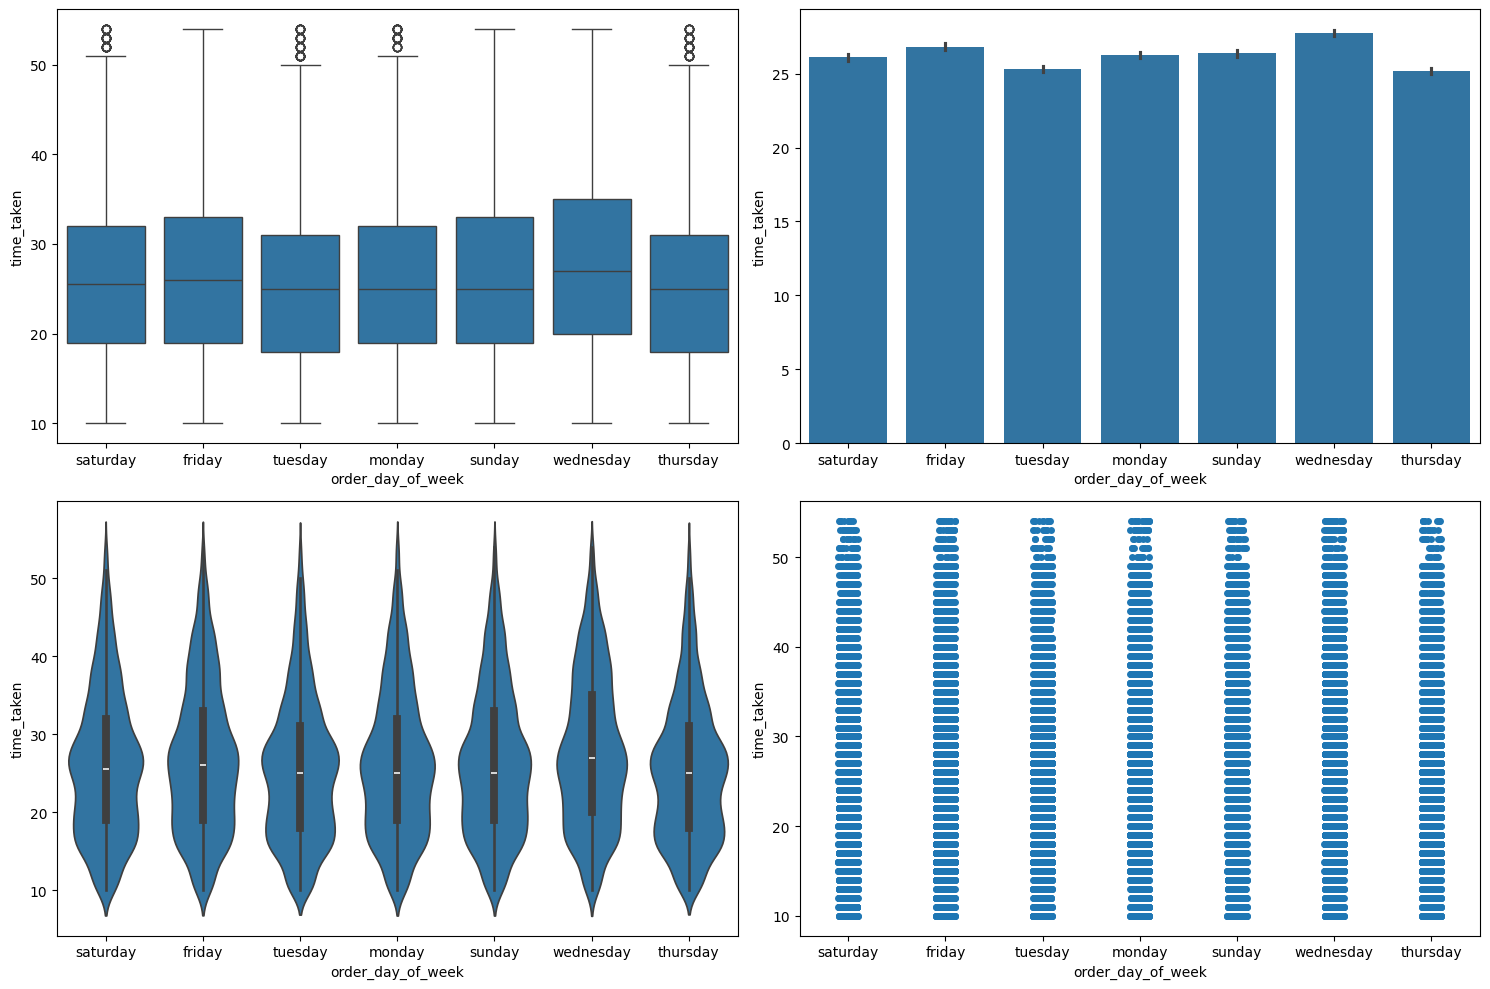

In [71]:
numerical_categorical_analysis(df,'order_day_of_week',"time_taken")

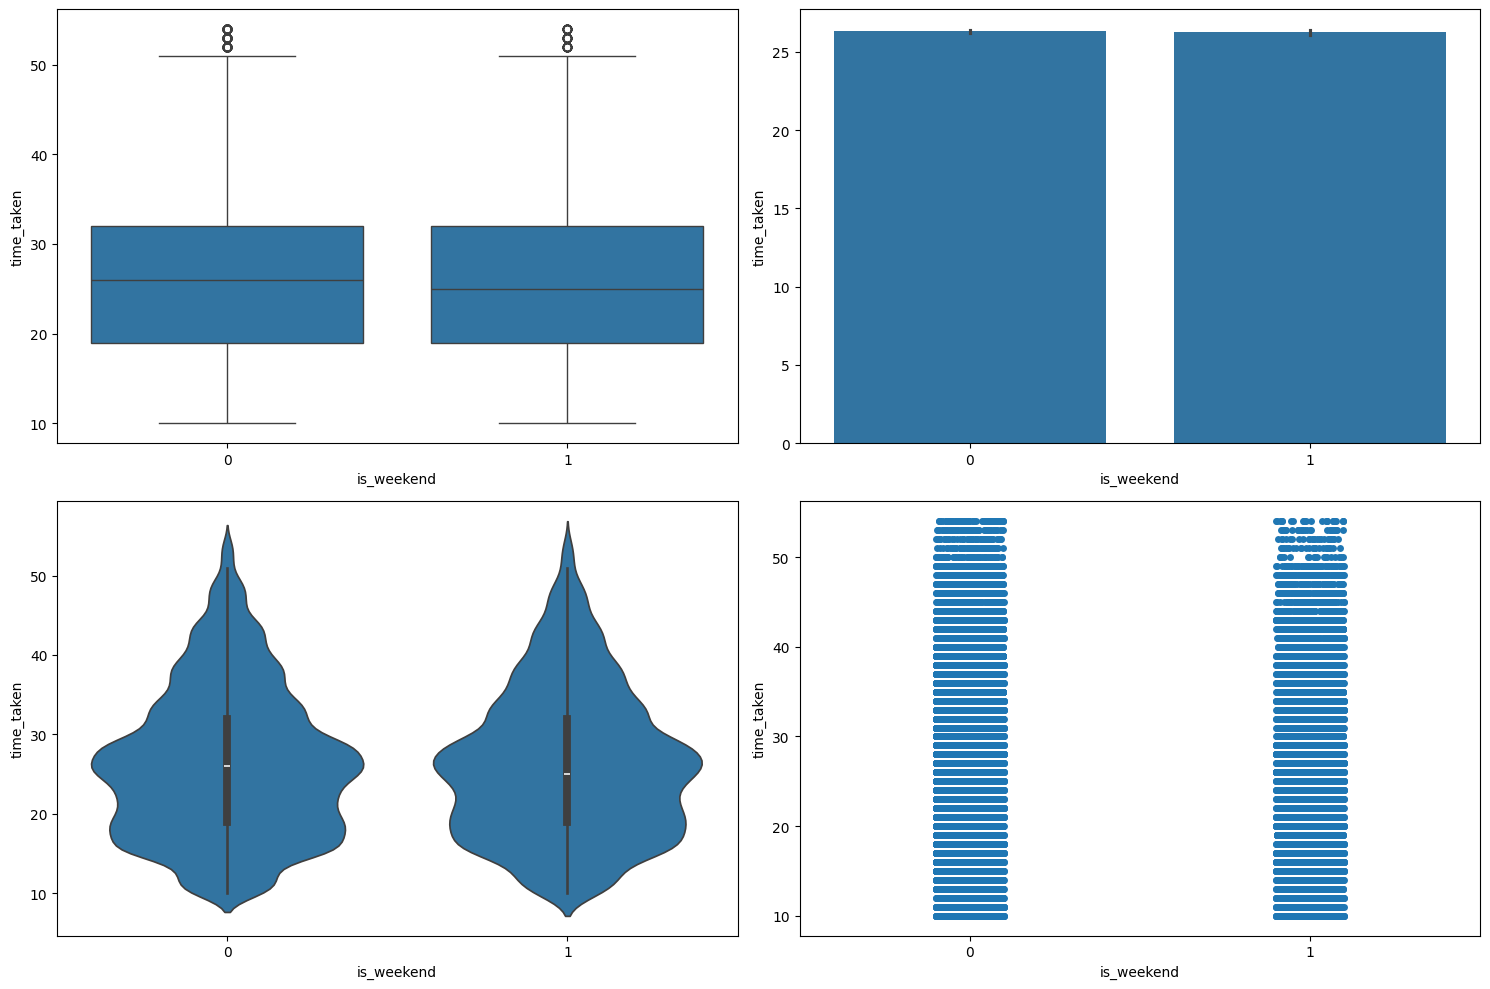

In [72]:
numerical_categorical_analysis(df, "is_weekend","time_taken")

In [73]:
chi_2_test(df, "is_weekend","traffic")

0.6845961396354259
Fail to reject the null hypothesis. There is no significant association between is_weekend and traffic.


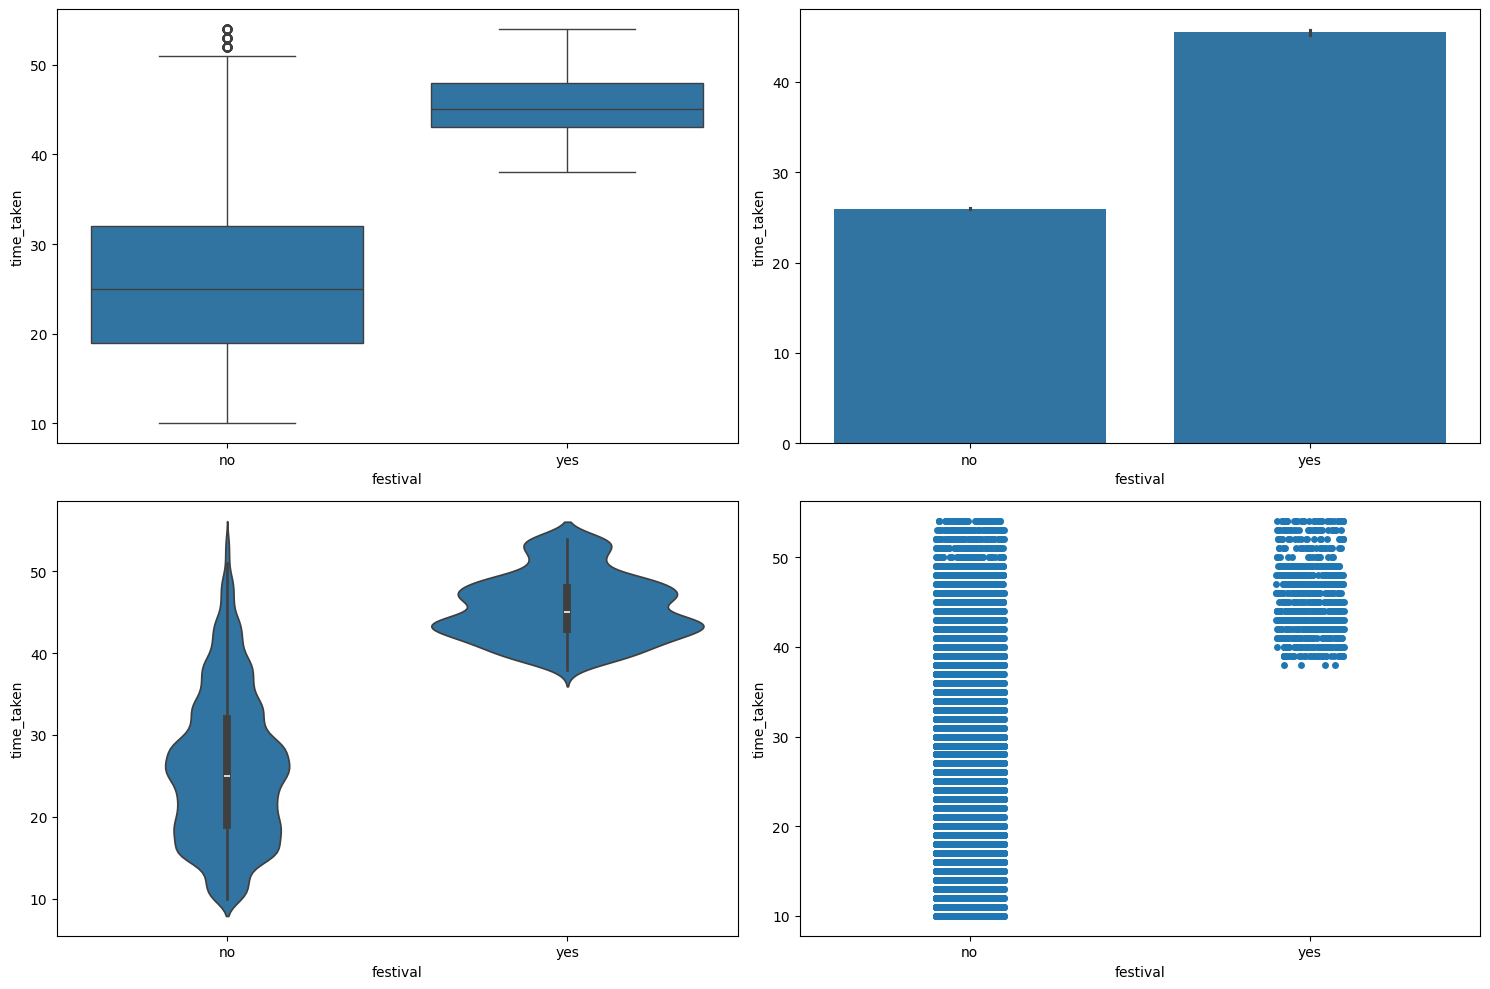

In [74]:
numerical_categorical_analysis(df, "festival","time_taken")

## Observation



1.   The avg time it takes for delivery varies when there is a festival
2.   The range of delivery time is shorter when there is a festival with lesser variation, which means on a festival delivery times usually takes longer



In [75]:
chi_2_test(df, "festival","traffic")

1.1223471129146869e-153
Reject the null hypothesis. There is a significant association between festival and traffic.


In [76]:
df.pivot_table(index="traffic",columns="festival",values="time_taken",aggfunc="mean")

festival         no        yes
traffic                       
high      27.010373  45.826087
jam       30.538039  46.093651
low       21.284332  42.020000
medium    26.550288  43.715385

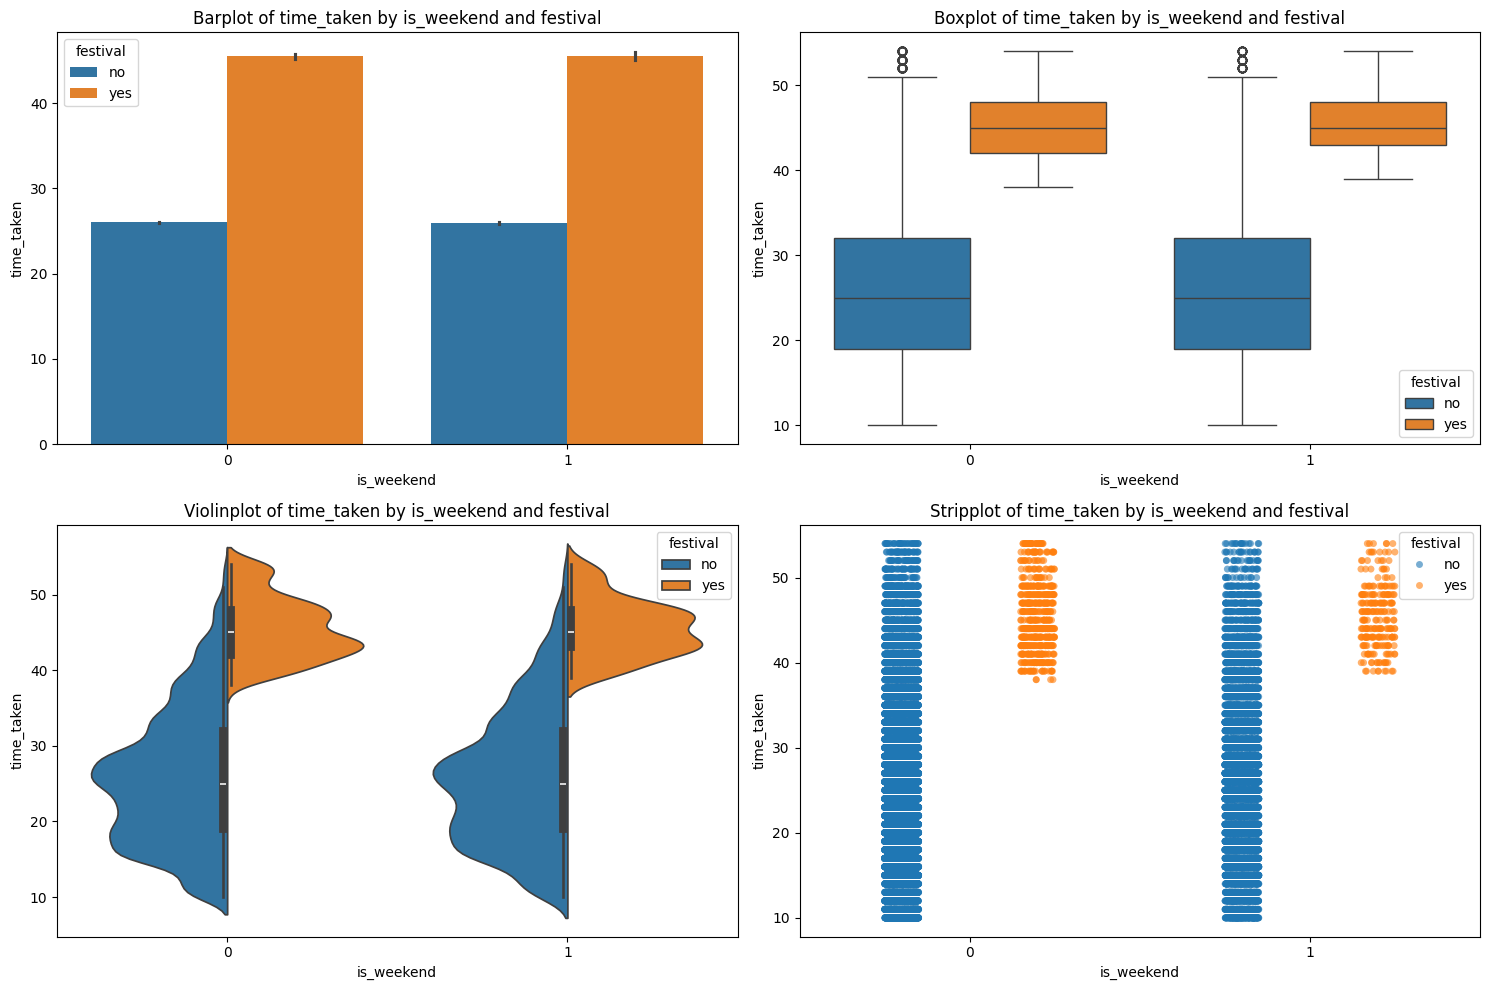

In [77]:
multivariate_analysis(df, "time_taken","is_weekend","festival")

# Order Time

In [78]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_day', 'distance', 'time_taken_pt'],
      dtype='object')

In [79]:
time_subset = df.loc[:,["order_time_hour","order_time_day","pickup_time_minutes"]]
time_subset

order_time_hour order_time_day  pickup_time_minutes
0                 11.0        morning           66116175.0
1                 19.0        evening           66116165.0
2                  8.0        morning           66116175.0
3                 18.0        evening           66116170.0
4                 13.0      afternoon           66116175.0
...                ...            ...                  ...
45497             11.0        morning           66116170.0
45498             19.0        evening           66116175.0
45499             23.0          night           66114735.0
45500             13.0      afternoon           66116165.0
45501             17.0        evening           66116165.0

[45502 rows x 3 columns]

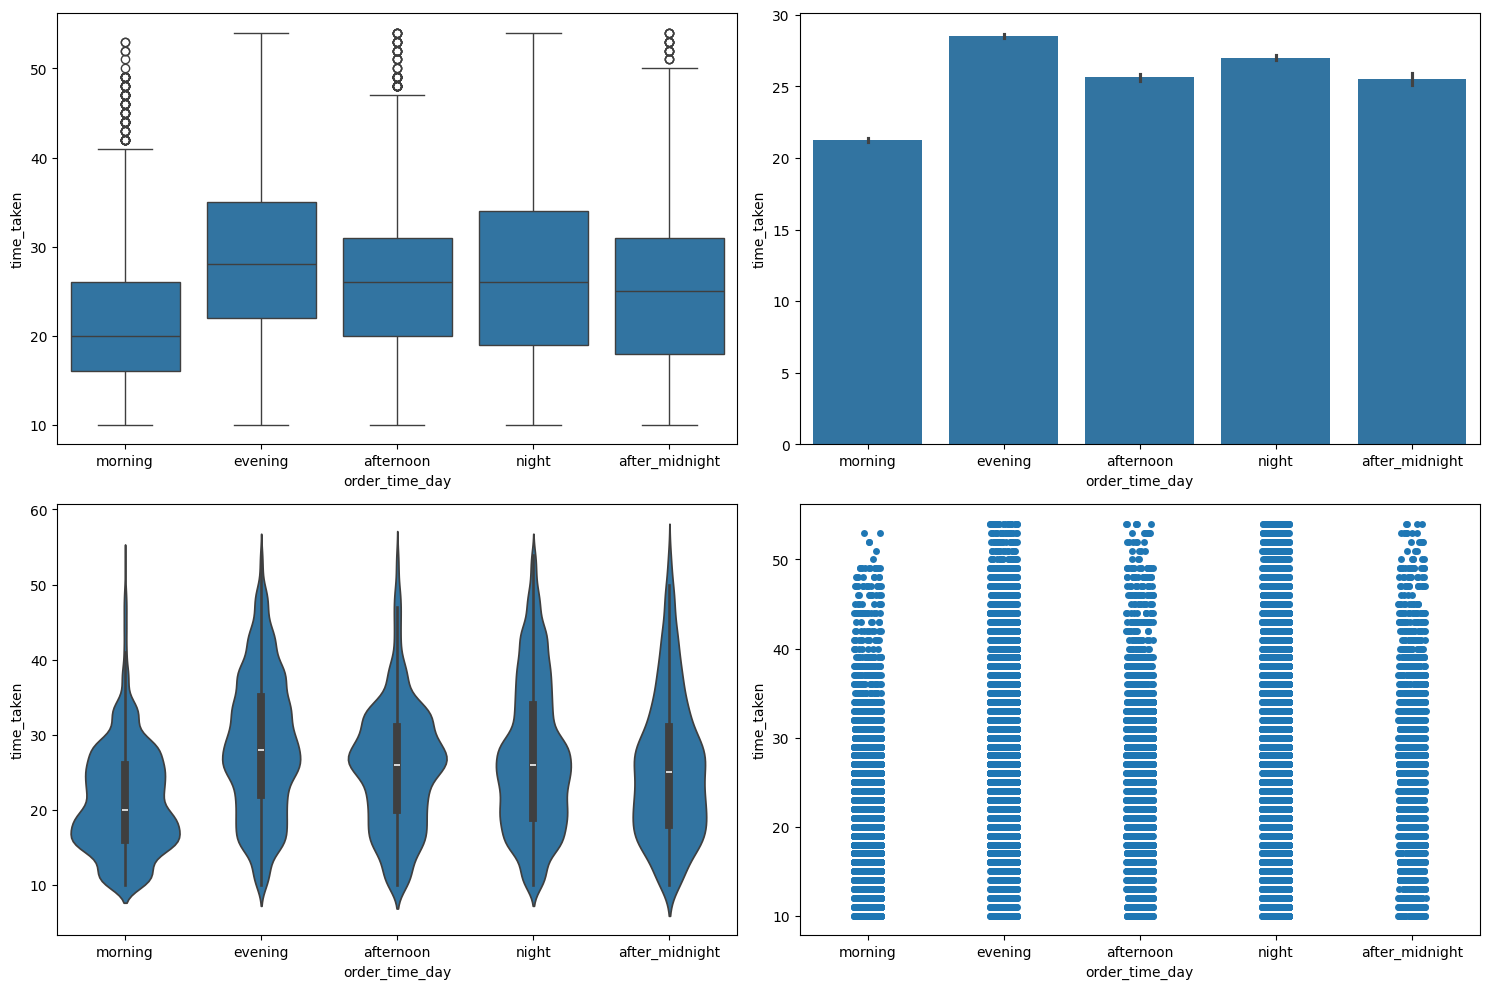

In [80]:
numerical_categorical_analysis(df, "order_time_day","time_taken")

In [81]:
annova_test(df, "time_taken","order_time_day")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and order_time_day.


In [82]:
df['order_time_hour'].value_counts().head(5)

order_time_hour
21.0    4686
19.0    4595
22.0    4576
20.0    4539
23.0    4511
Name: count, dtype: int64

Count  Percentage
order_time_hour                   
21.0              4686       10.30
19.0              4595       10.10
22.0              4576       10.06
20.0              4539        9.98
23.0              4511        9.91
18.0              4480        9.85
17.0              4278        9.40
10.0              1991        4.38
11.0              1962        4.31
9.0               1947        4.28
8.0               1818        4.00
NaN               1640        3.60
12.0               892        1.96
15.0               873        1.92
14.0               791        1.74
13.0               784        1.72
16.0               709        1.56
0.0                430        0.95

**************************************************
Unique categories (sample up to 20): [11.0, 19.0, 8.0, 18.0, 13.0, 21.0, 17.0, 20.0, 14.0, 9.0, 22.0, 12.0, 23.0, 10.0, 16.0, 15.0, 0.0]
Number of categories: 18
**************************************************


/tmp/ipython-input-592092594.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-592092594.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



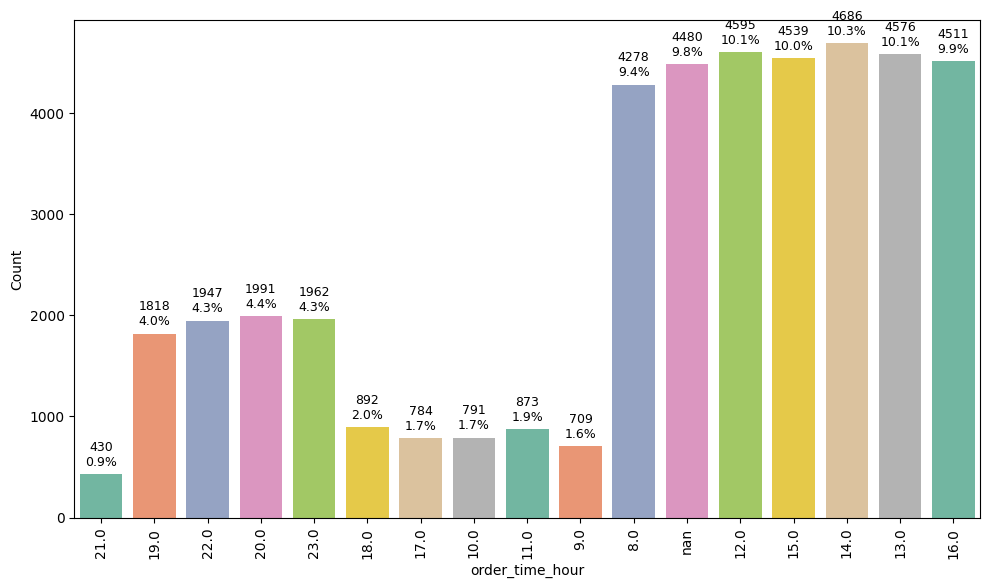

Count  Percentage
order_time_hour                   
21.0              4686       10.30
19.0              4595       10.10
22.0              4576       10.06
20.0              4539        9.98
23.0              4511        9.91
18.0              4480        9.85
17.0              4278        9.40
10.0              1991        4.38
11.0              1962        4.31
9.0               1947        4.28
8.0               1818        4.00
NaN               1640        3.60
12.0               892        1.96
15.0               873        1.92
14.0               791        1.74
13.0               784        1.72
16.0               709        1.56
0.0                430        0.95

In [83]:
categorical_analysis(df, "order_time_hour")

Count  Percentage
order_time_day                   
night           18312       40.24
evening         13353       29.35
morning          7718       16.96
afternoon        4049        8.90
after_midnight   2070        4.55

**************************************************
Unique categories (sample up to 20): ['morning', 'evening', 'afternoon', 'night', 'after_midnight']
Number of categories: 5
**************************************************


/tmp/ipython-input-592092594.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-592092594.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



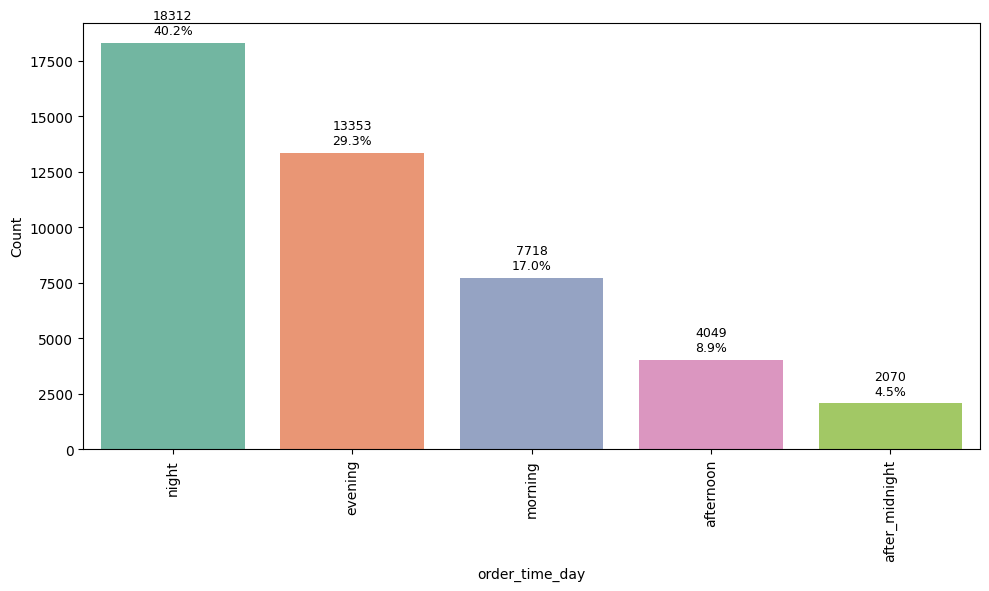

Count  Percentage
order_time_day                   
night           18312       40.24
evening         13353       29.35
morning          7718       16.96
afternoon        4049        8.90
after_midnight   2070        4.55

In [84]:
categorical_analysis(df, "order_time_day")

# Pickup Time

In [85]:
df['pickup_time_minutes'].dtype

dtype('float64')

<Axes: xlabel='pickup_time_minutes', ylabel='time_taken'>

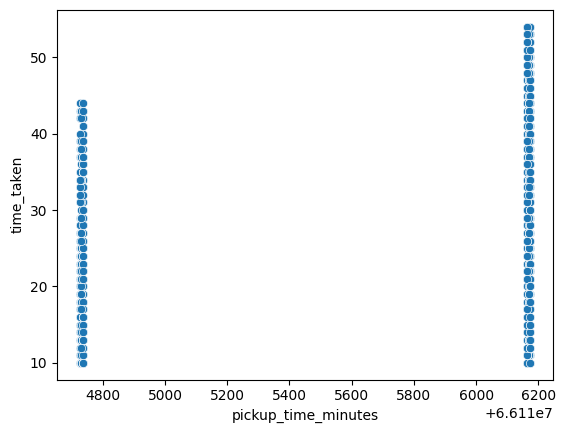

In [86]:
sns.scatterplot(df, x="pickup_time_minutes",y="time_taken")

Count  Percentage
pickup_time_minutes                   
66116165.0           14564       32.01
66116170.0           14288       31.40
66116175.0           14179       31.16
NaN                   1640        3.60
66114735.0             431        0.95
66114730.0             261        0.57
66114725.0             139        0.31

**************************************************
Unique categories (sample up to 20): [66116175.0, 66116165.0, 66116170.0, 66114735.0, 66114730.0, 66114725.0]
Number of categories: 7
**************************************************


/tmp/ipython-input-592092594.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-592092594.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



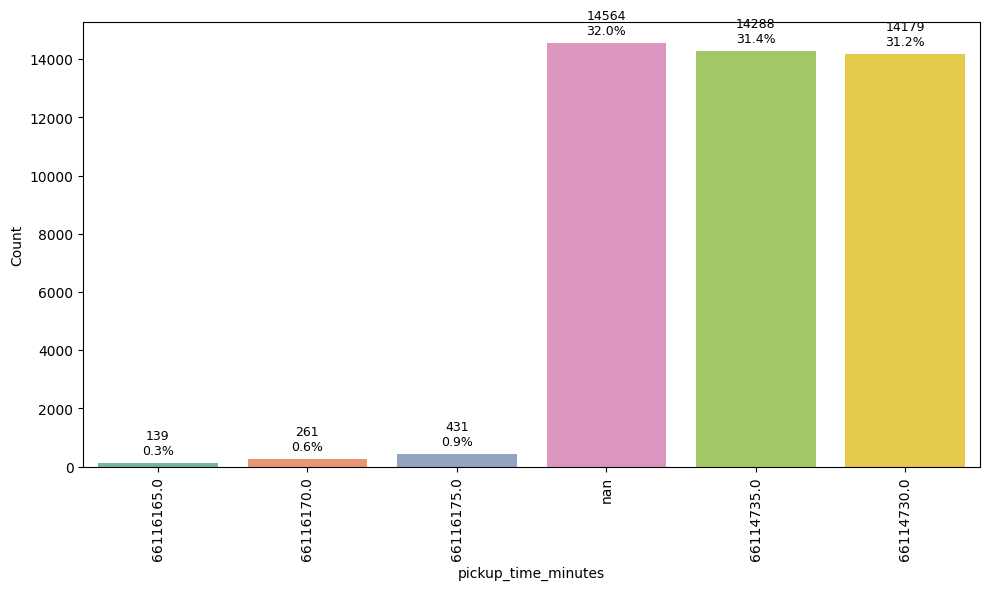

Count  Percentage
pickup_time_minutes                   
66116165.0           14564       32.01
66116170.0           14288       31.40
66116175.0           14179       31.16
NaN                   1640        3.60
66114735.0             431        0.95
66114730.0             261        0.57
66114725.0             139        0.31

In [87]:
categorical_analysis(df, "pickup_time_minutes")

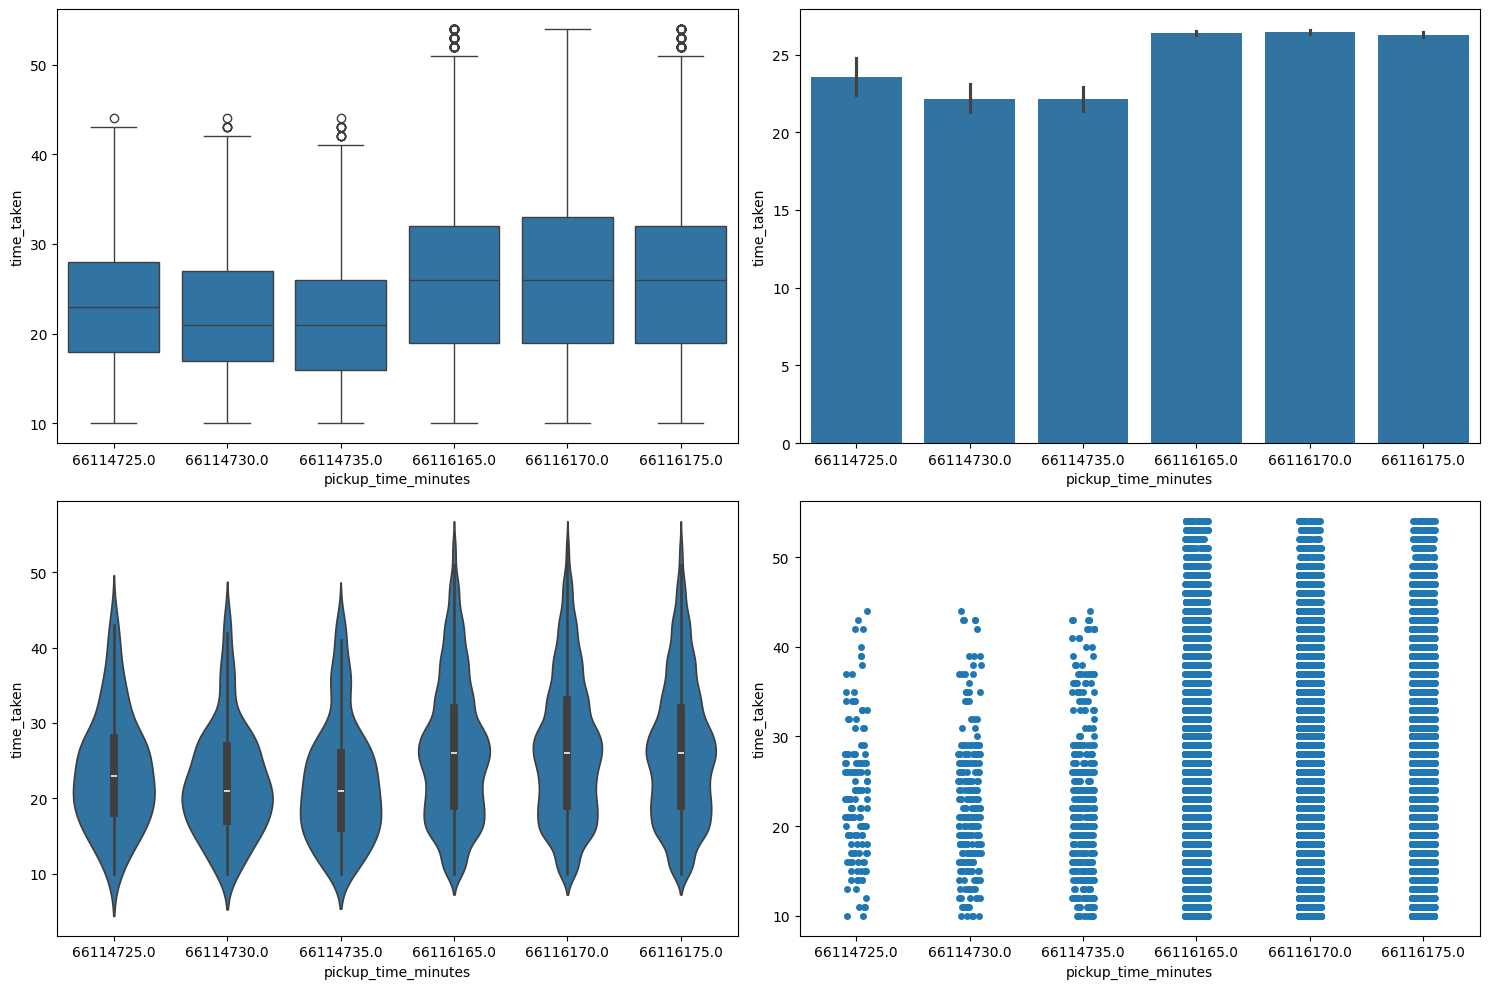

In [88]:
numerical_categorical_analysis(df, "pickup_time_minutes","time_taken")

In [89]:
annova_test(df, "time_taken",'pickup_time_minutes')

3.0052497712417464e-31
Reject the null hypothesis. There is a significant relationship between time_taken and pickup_time_minutes.


# Traffic

In [90]:
df['traffic'].dtype

dtype('O')

Count  Percentage
traffic                   
low      15477       34.01
jam      14143       31.08
medium   10947       24.06
high      4425        9.72
NaN        510        1.12

**************************************************
Unique categories (sample up to 20): ['high', 'jam', 'low', 'medium']
Number of categories: 5
**************************************************


/tmp/ipython-input-592092594.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-592092594.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



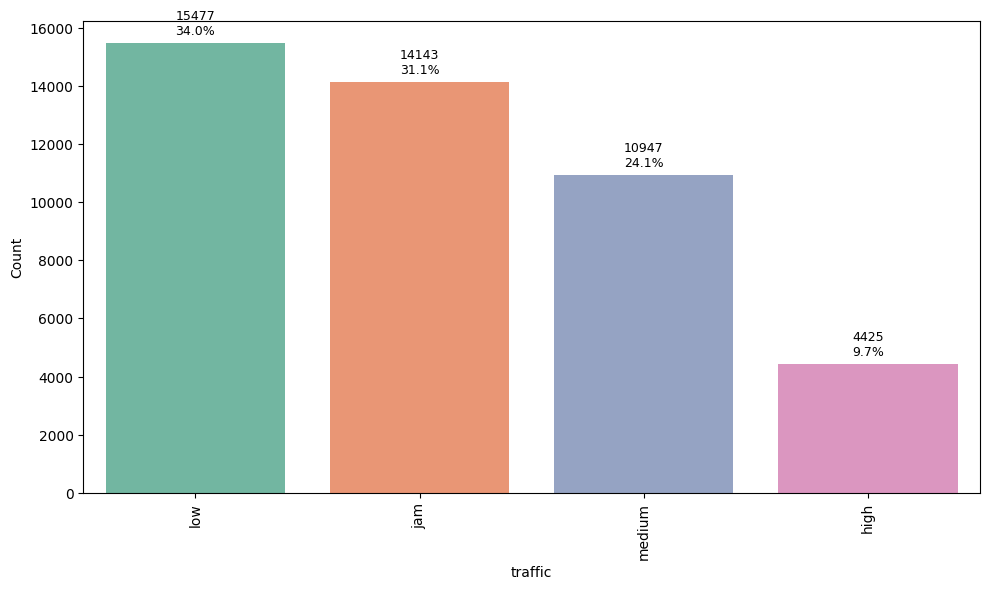

Count  Percentage
traffic                   
low      15477       34.01
jam      14143       31.08
medium   10947       24.06
high      4425        9.72
NaN        510        1.12

In [91]:
categorical_analysis(df, "traffic")

In [92]:
chi_2_test(df, "traffic", "city_type")

2.3390790568495405e-104
Reject the null hypothesis. There is a significant association between traffic and city_type.


In [93]:
chi_2_test(df, "traffic", "city_name")

0.4978080180955253
Fail to reject the null hypothesis. There is no significant association between traffic and city_name.


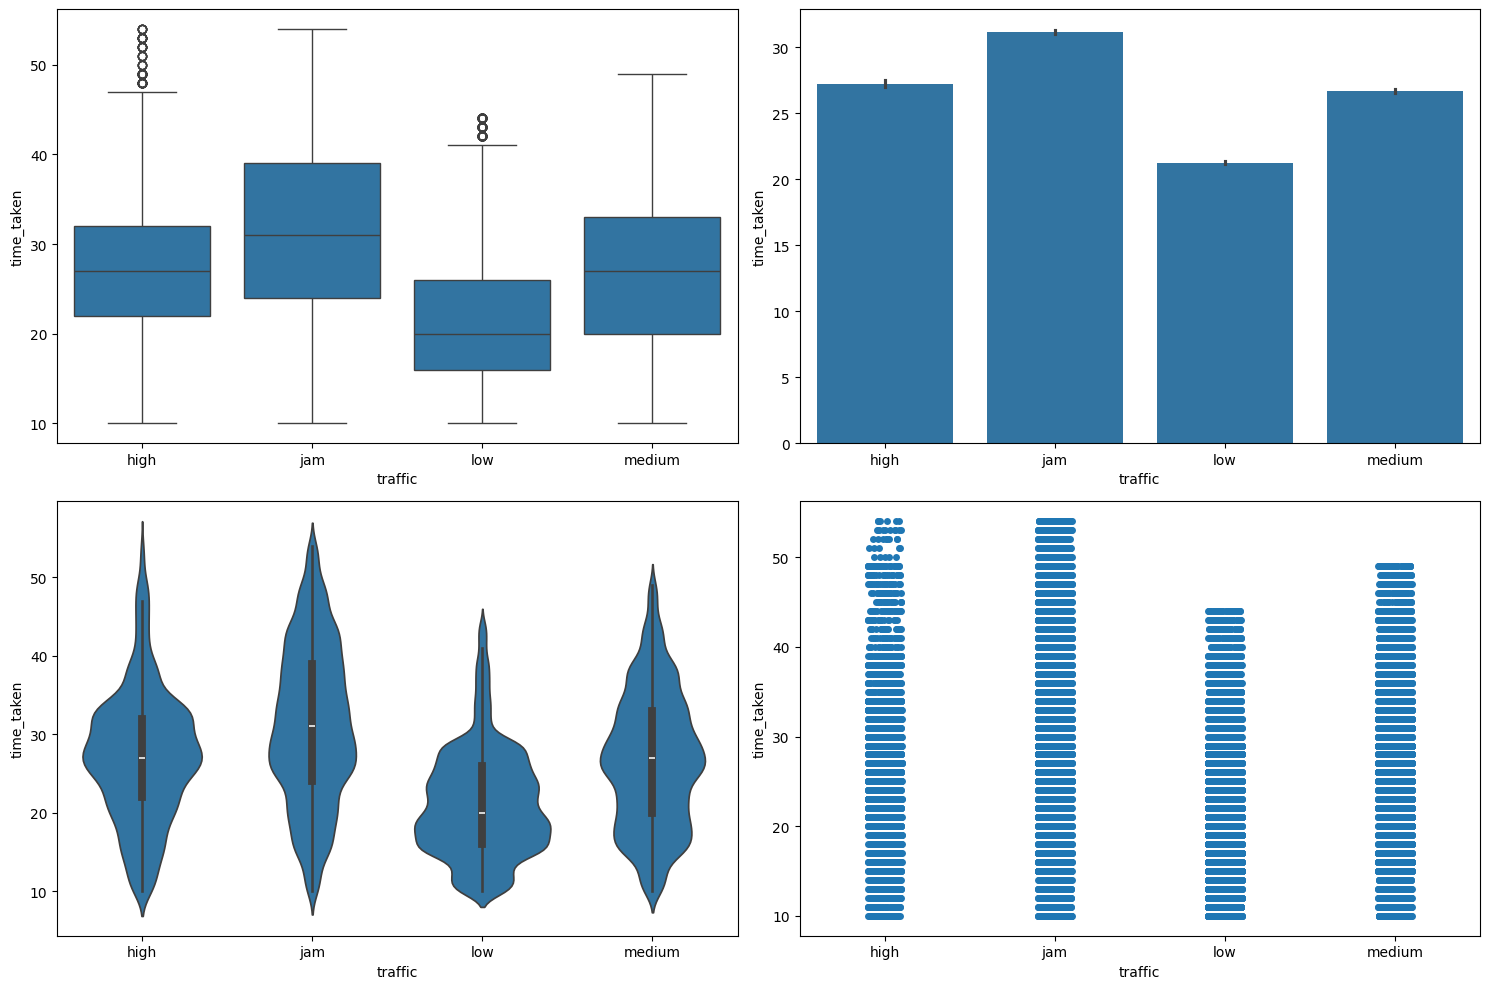

In [94]:
numerical_categorical_analysis(df, "traffic","time_taken")

In [95]:
annova_test(df, "time_taken", "traffic")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and traffic.


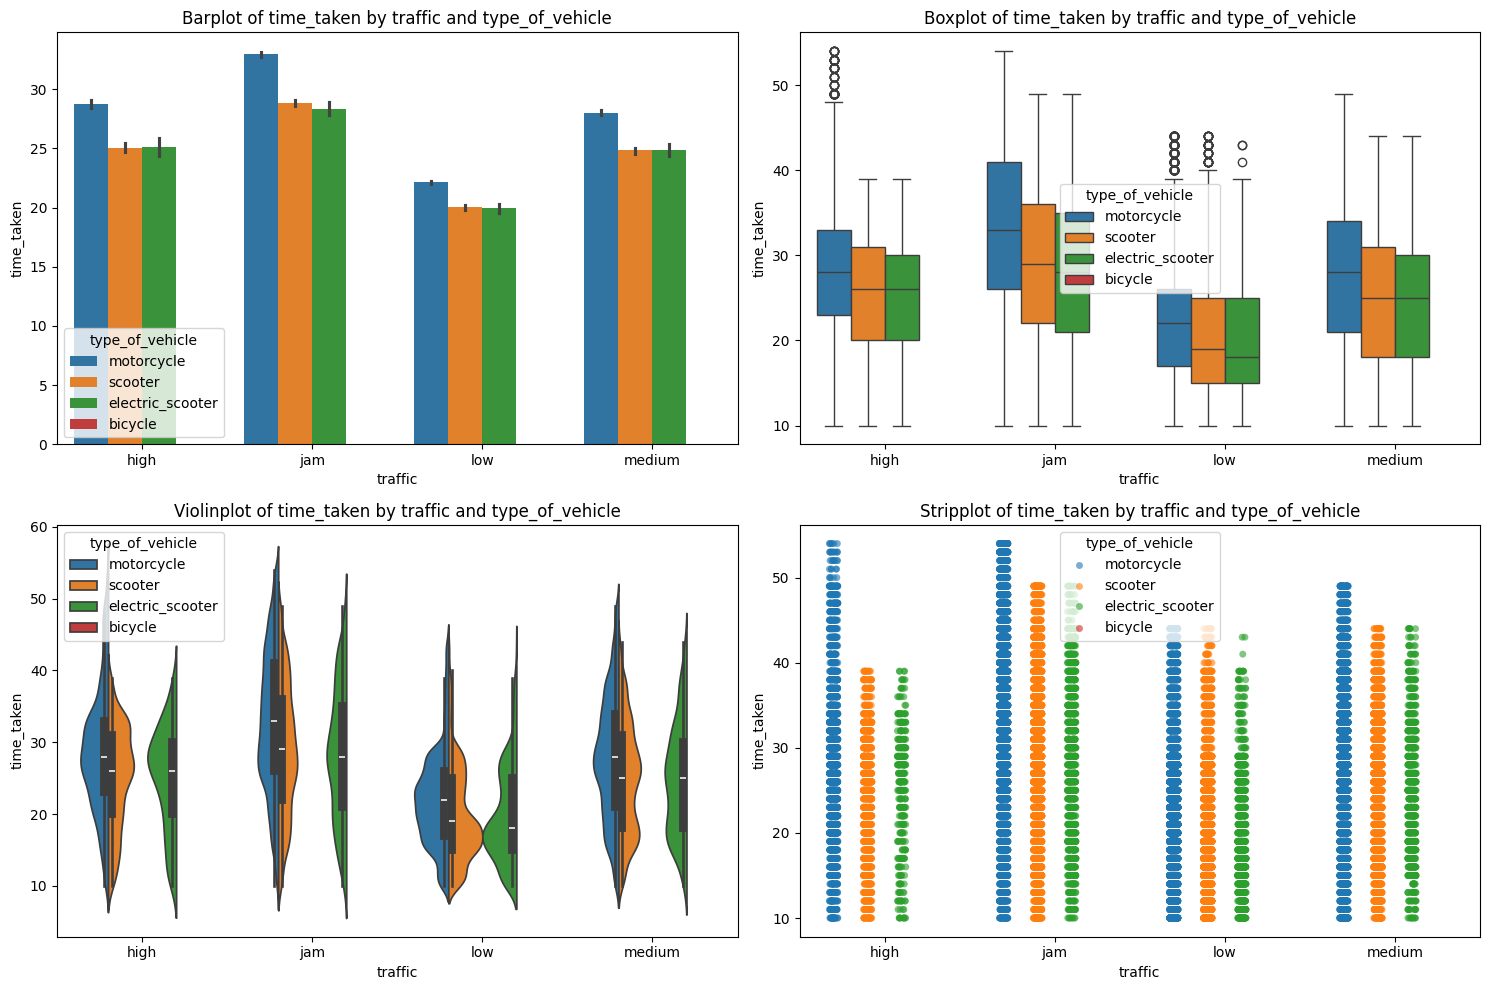

In [96]:
multivariate_analysis(df, "time_taken", "traffic", "type_of_vehicle")

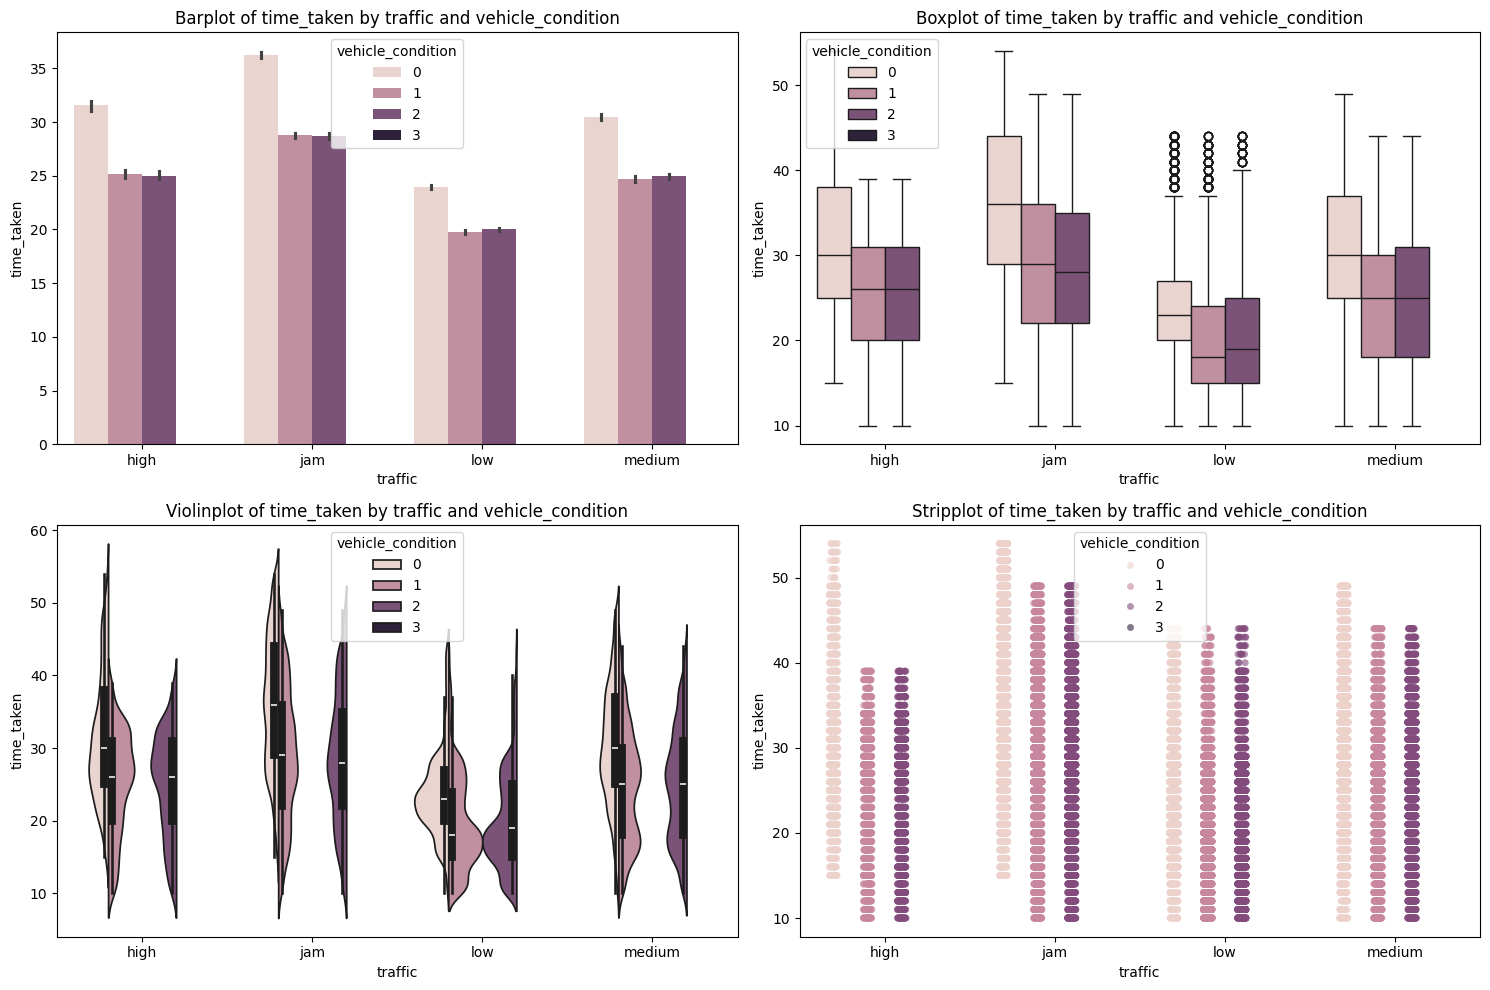

In [97]:
multivariate_analysis(df, "time_taken","traffic", "vehicle_condition")

Dont make wrong interpretations that good condition vehicles takes longer time on avg




*   This simply means that good vehicles are prefered for deliveries during festivals which results in longer delivery times



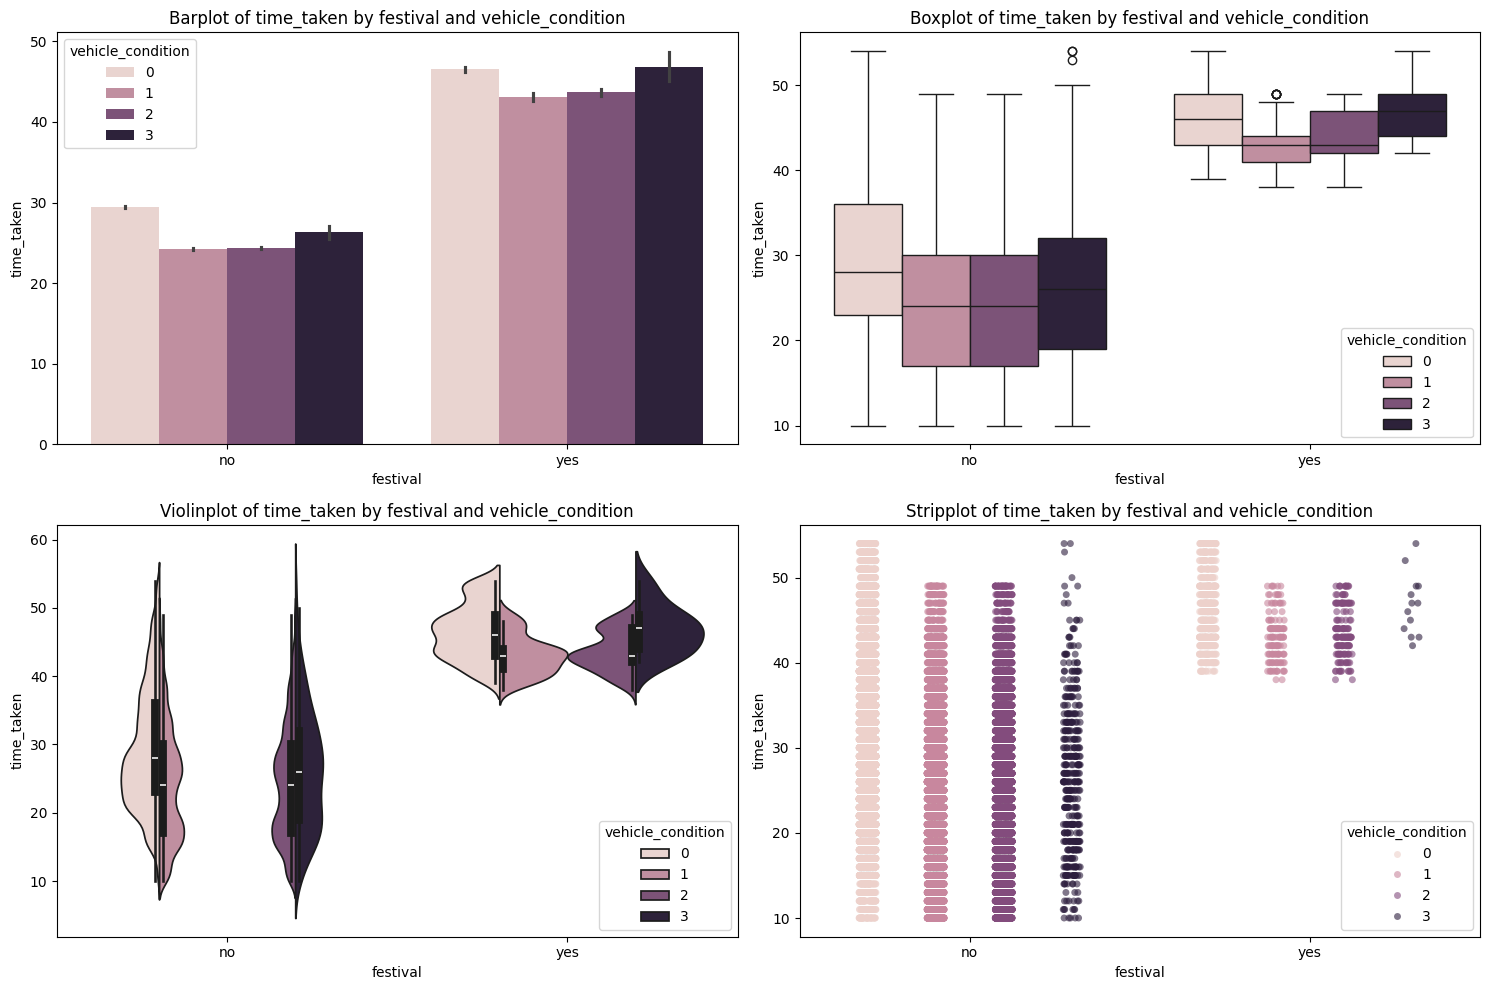

In [98]:
multivariate_analysis(df, "time_taken", "festival", "vehicle_condition")

# Multiple Deliveries

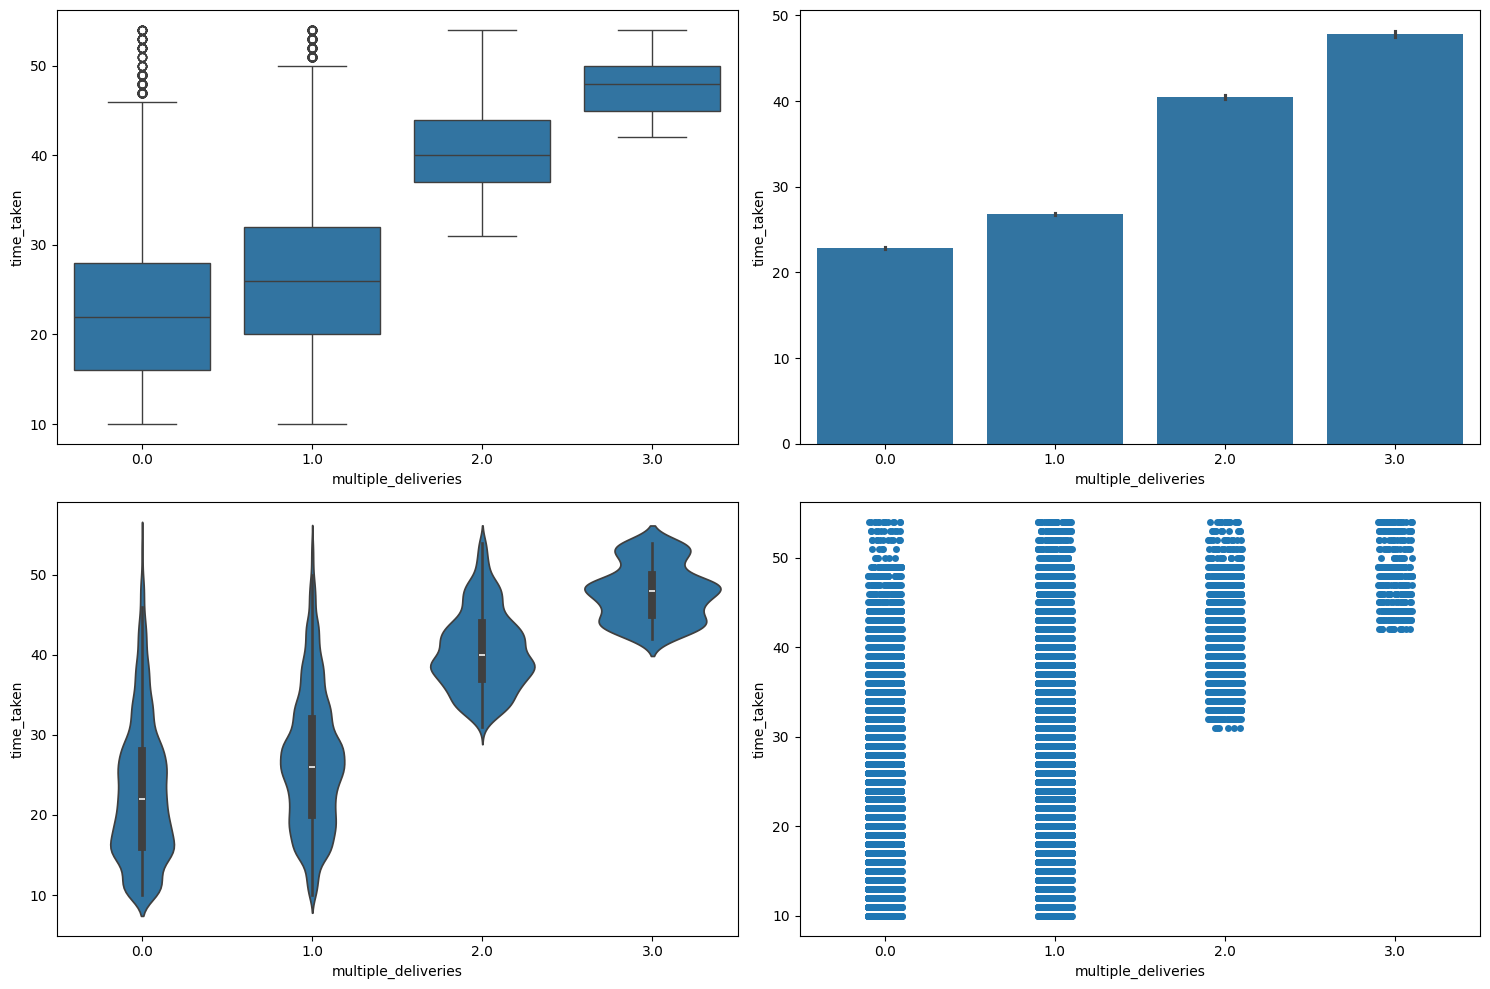

In [99]:
numerical_categorical_analysis(df, "multiple_deliveries","time_taken")

In [100]:
annova_test(df, "time_taken", "multiple_deliveries")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and multiple_deliveries.


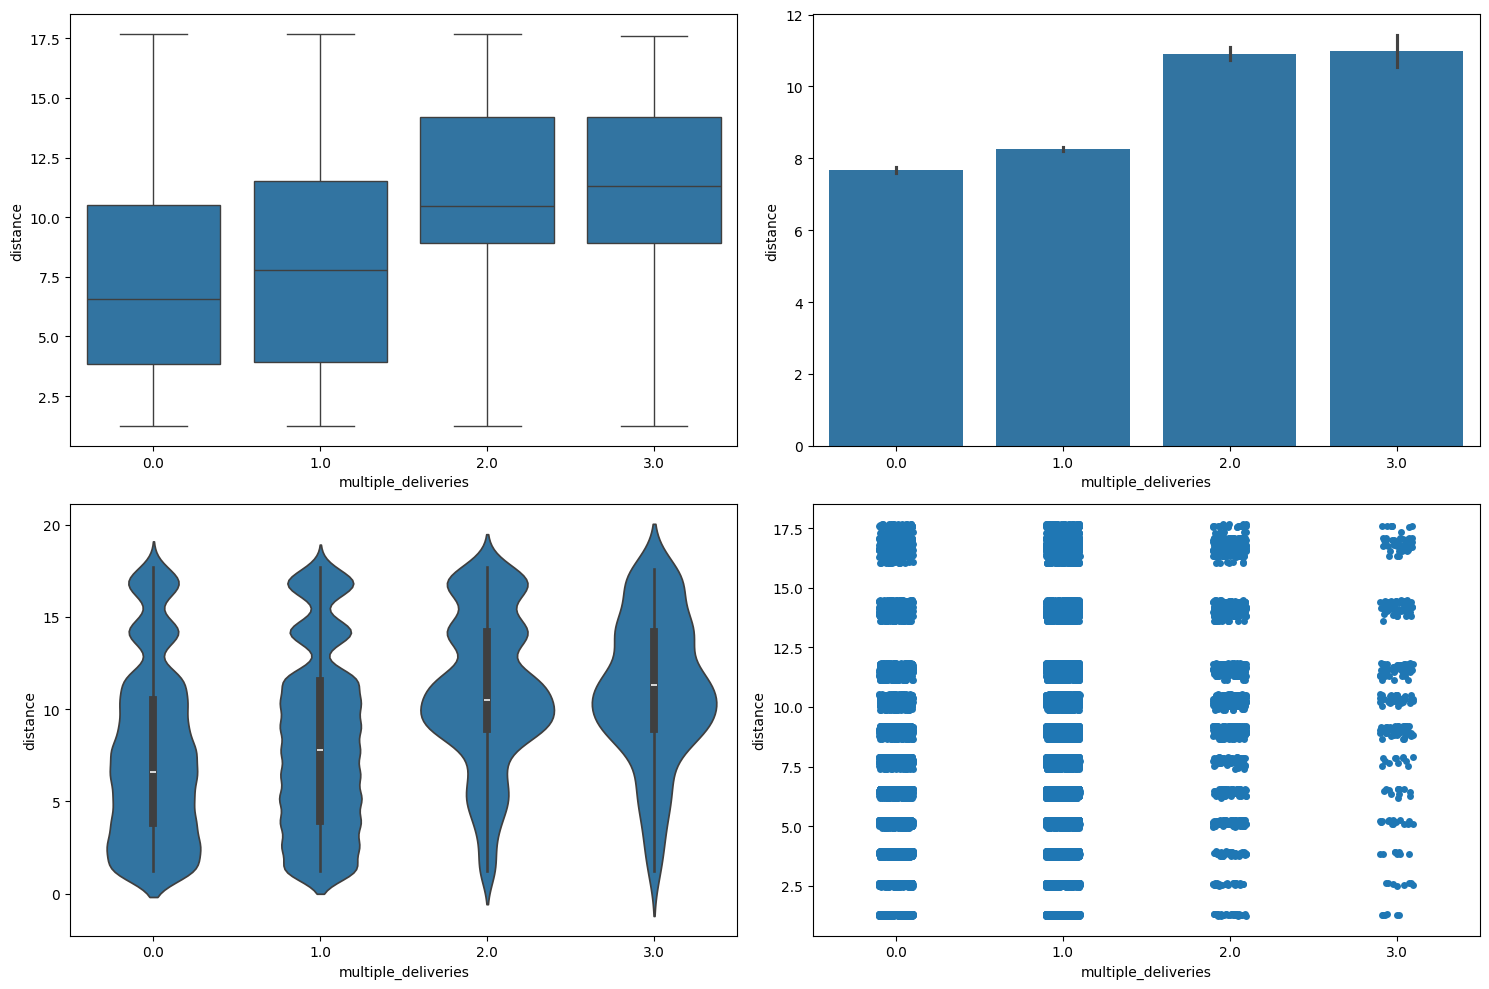

In [101]:
numerical_categorical_analysis(df, "multiple_deliveries","distance")

# Weather



In [102]:
df['weather'].dtype

dtype('O')

Count  Percentage
weather                      
fog          7654       16.82
stormy       7586       16.67
cloudy       7536       16.56
sandstorms   7495       16.47
windy        7422       16.31
sunny        7284       16.01
NaN           525        1.15

**************************************************
Unique categories (sample up to 20): ['sunny', 'stormy', 'sandstorms', 'cloudy', 'fog', 'windy']
Number of categories: 7
**************************************************


/tmp/ipython-input-592092594.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-592092594.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



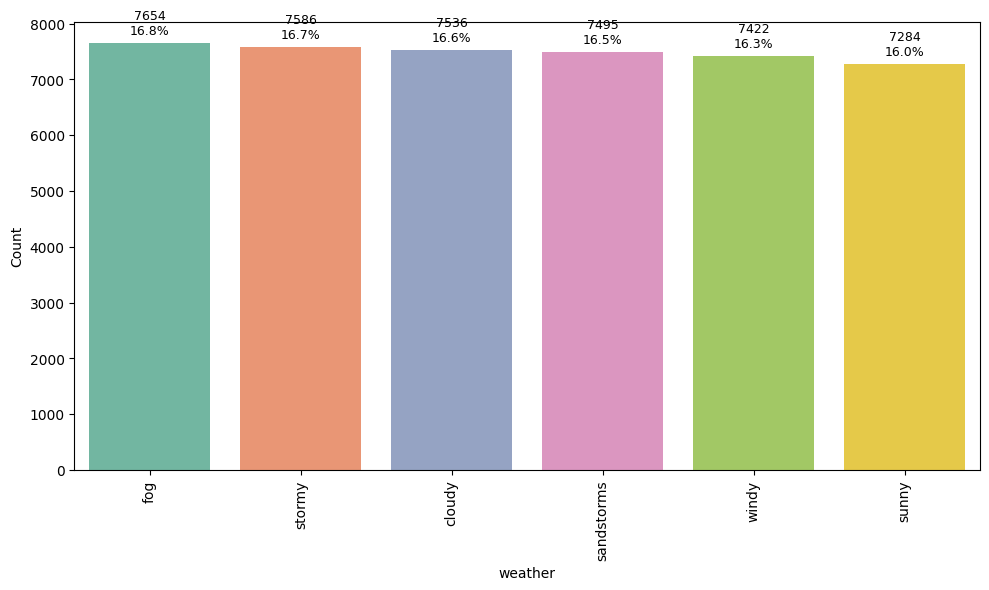

Count  Percentage
weather                      
fog          7654       16.82
stormy       7586       16.67
cloudy       7536       16.56
sandstorms   7495       16.47
windy        7422       16.31
sunny        7284       16.01
NaN           525        1.15

In [103]:
categorical_analysis(df, 'weather')

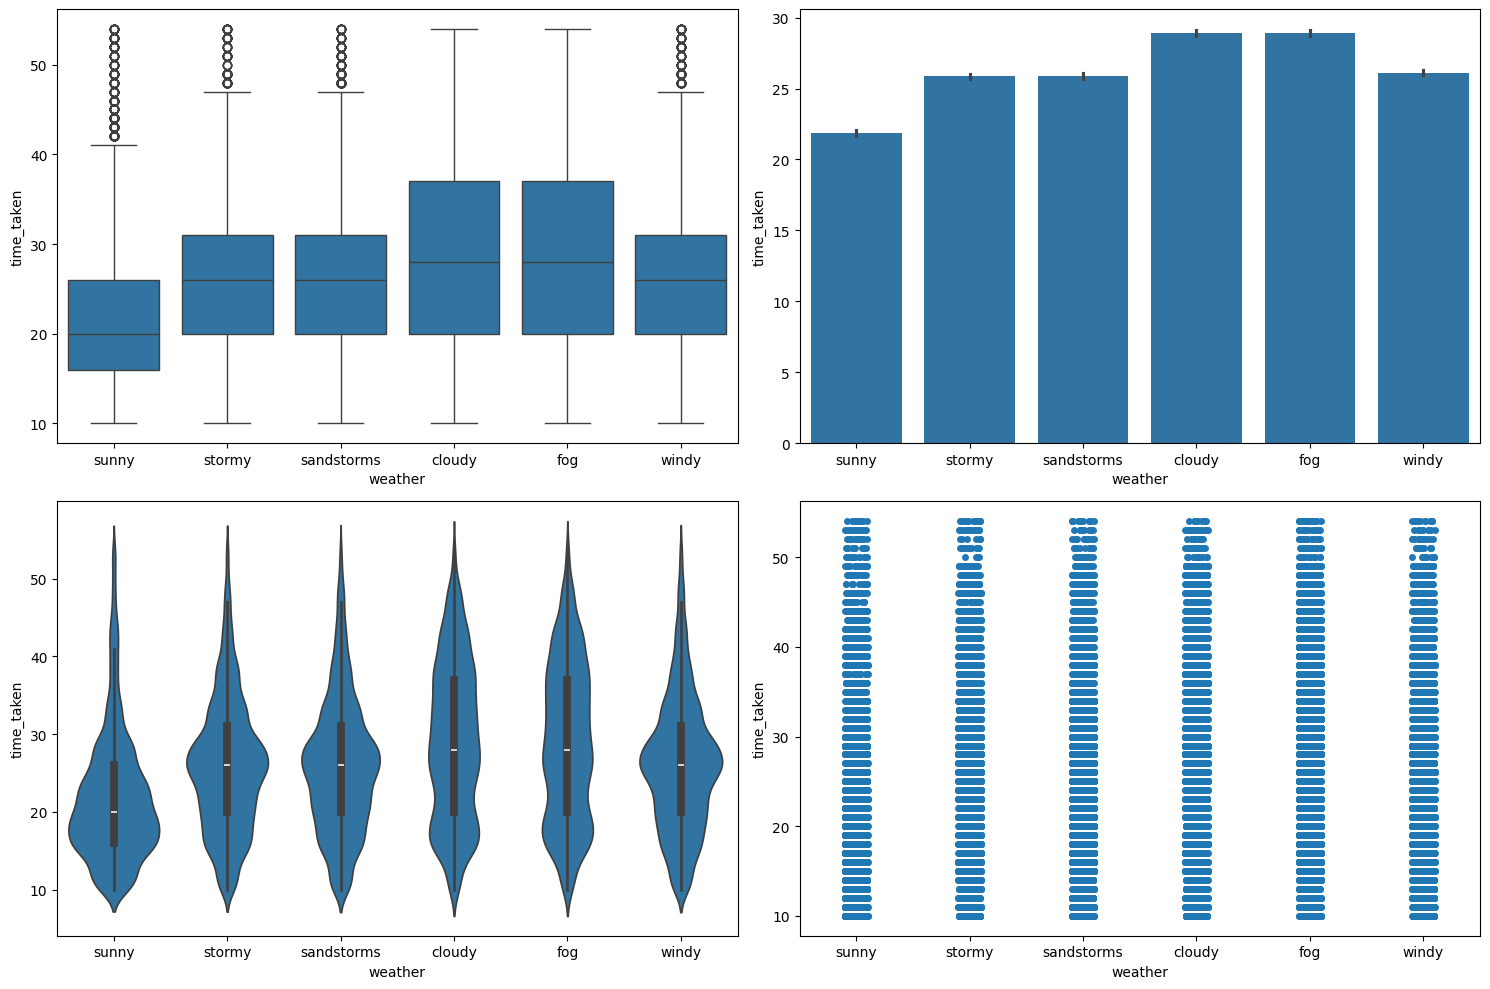

In [104]:
numerical_categorical_analysis(df, "weather","time_taken")

In [105]:
annova_test(df, "time_taken", "weather")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and weather.


In [106]:
chi_2_test(df, "weather","traffic")

0.4796388074753828
Fail to reject the null hypothesis. There is no significant association between weather and traffic.


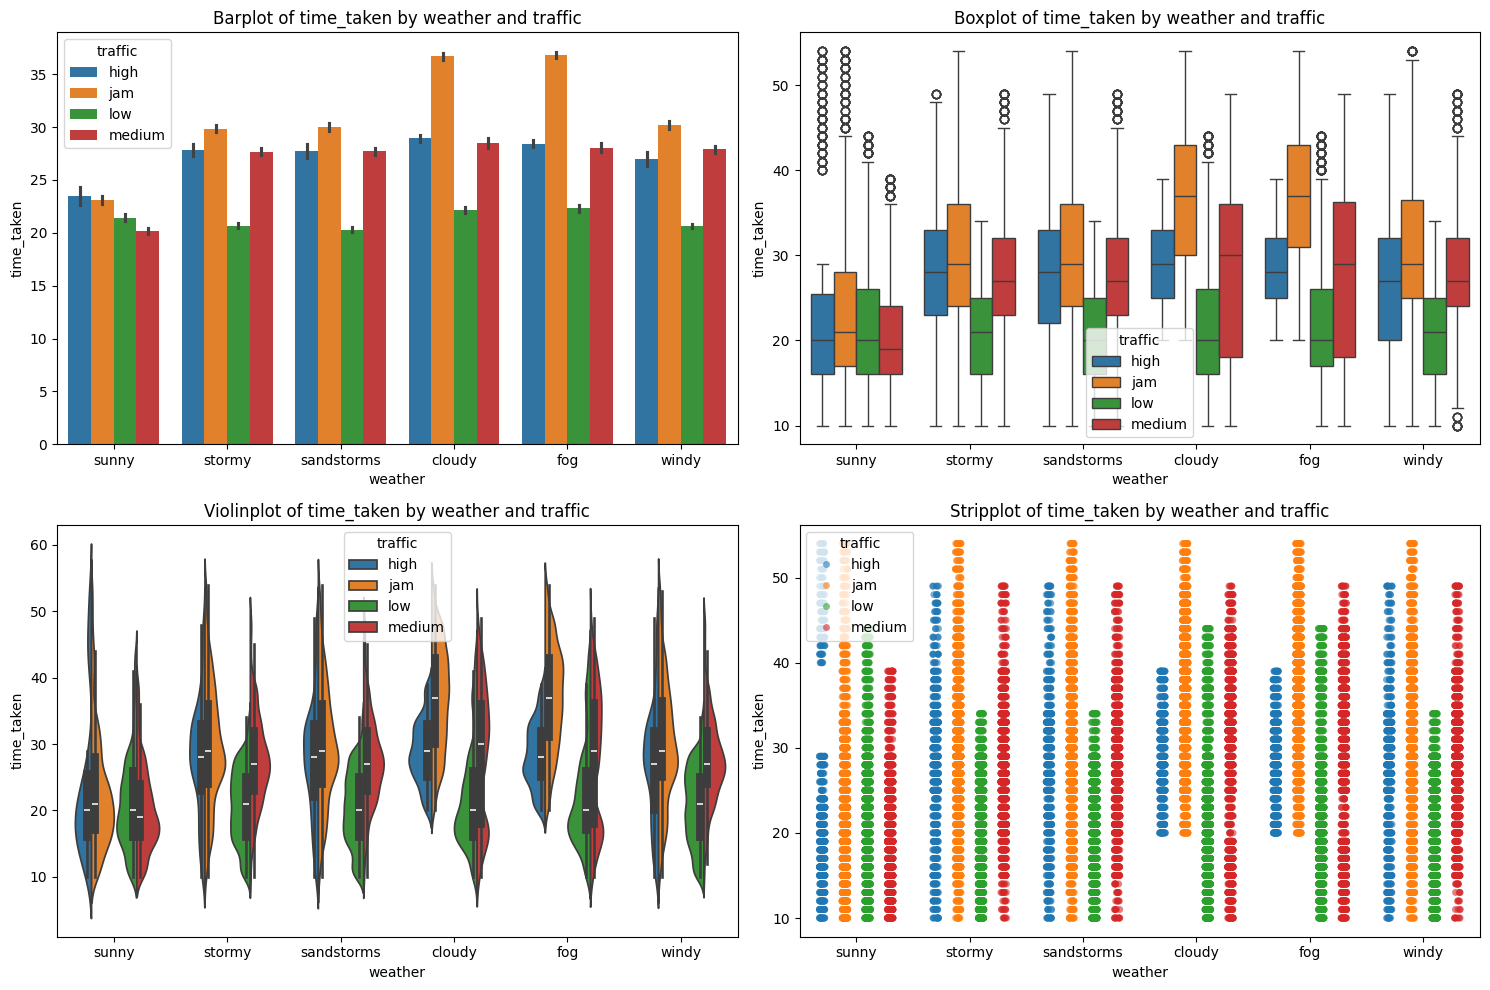

In [107]:
multivariate_analysis(df, "time_taken", "weather", "traffic")

In [108]:
df.pivot_table(index="weather",columns="traffic",values="time_taken",aggfunc="mean")

traffic          high        jam        low     medium
weather                                               
cloudy      28.940860  36.689655  22.208445  28.483134
fog         28.426546  36.806916  22.303427  28.044816
sandstorms  27.711840  30.018758  20.297049  27.738522
stormy      27.845839  29.850194  20.681734  27.680502
sunny       23.448980  23.082132  21.449293  20.195518
windy       26.972789  30.219056  20.665862  27.888769

# Vehicle-Condition and Type

Count  Percentage
vehicle_condition                   
2                  15034       33.04
1                  15030       33.03
0                  15009       32.99
3                    429        0.94

**************************************************
Unique categories (sample up to 20): [2, 0, 1, 3]
Number of categories: 4
**************************************************


/tmp/ipython-input-592092594.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-592092594.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



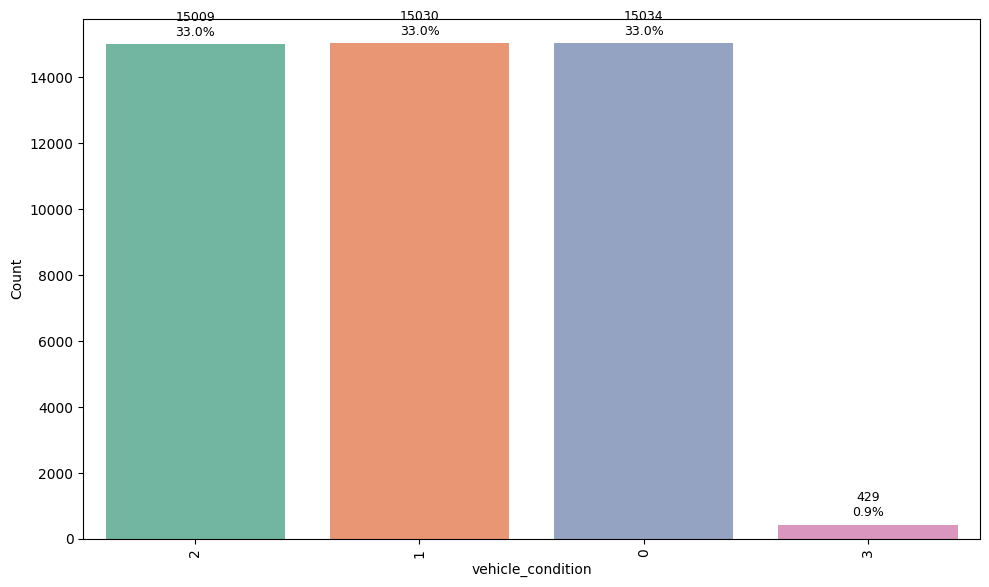

Count  Percentage
vehicle_condition                   
2                  15034       33.04
1                  15030       33.03
0                  15009       32.99
3                    429        0.94

In [109]:
categorical_analysis(df, "vehicle_condition")

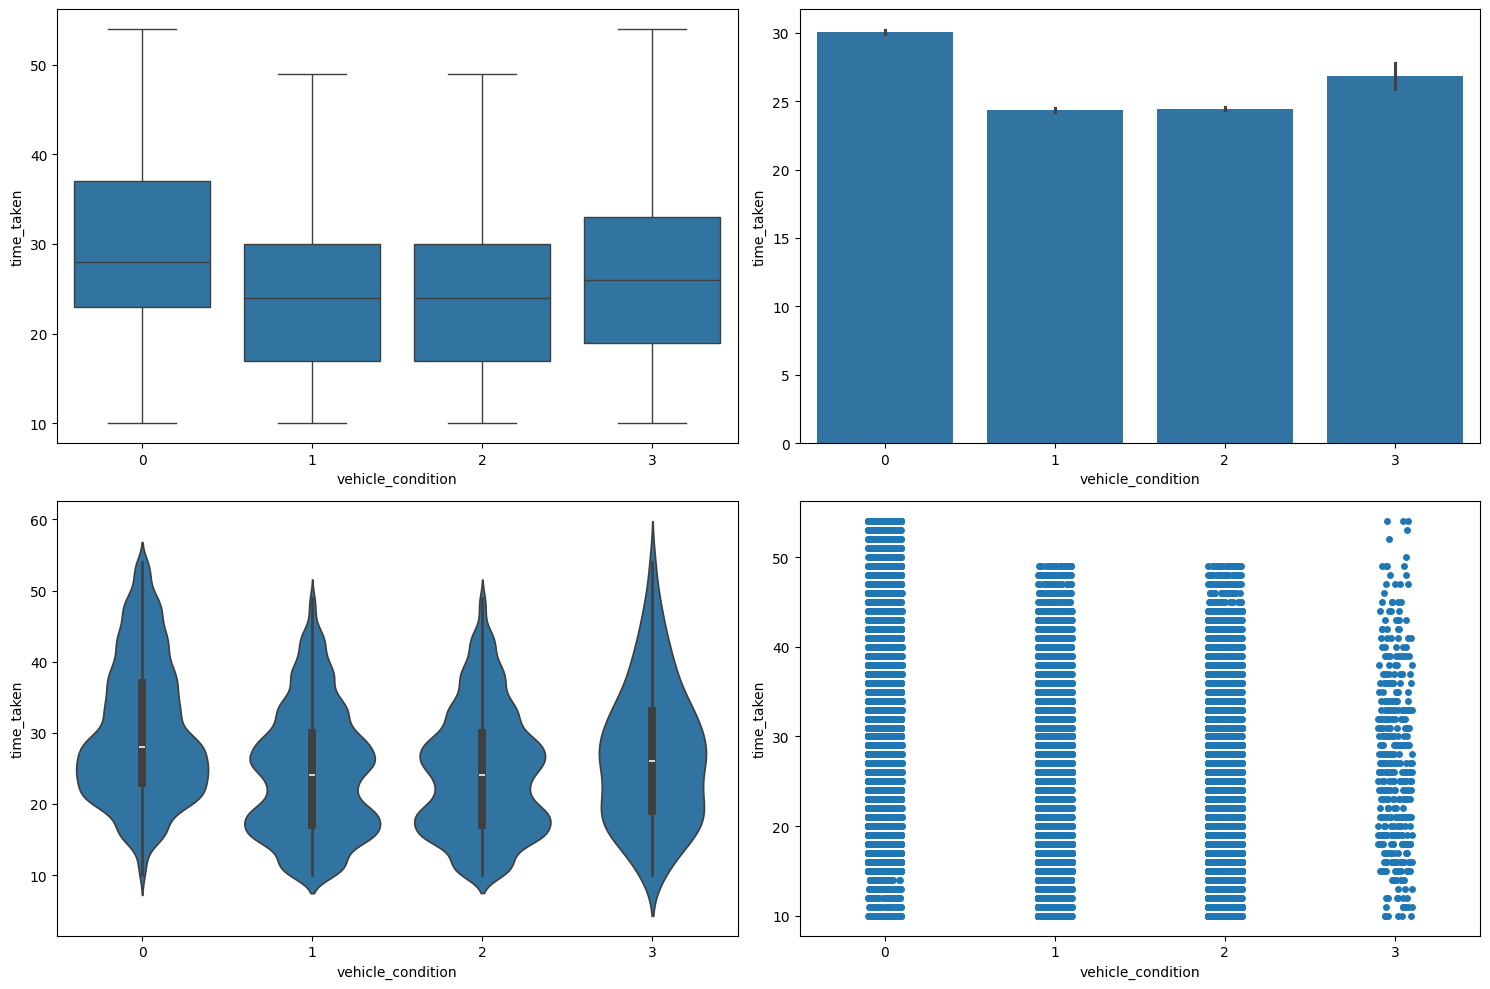

In [110]:
numerical_categorical_analysis(df,'vehicle_condition',"time_taken")

In [111]:
annova_test(df, "time_taken", "vehicle_condition")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and vehicle_condition.


Count  Percentage
type_of_vehicle                    
motorcycle        26427       58.08
scooter           15244       33.50
electric_scooter   3778        8.30
bicycle              53        0.12

**************************************************
Unique categories (sample up to 20): ['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
Number of categories: 4
**************************************************


/tmp/ipython-input-592092594.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-592092594.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



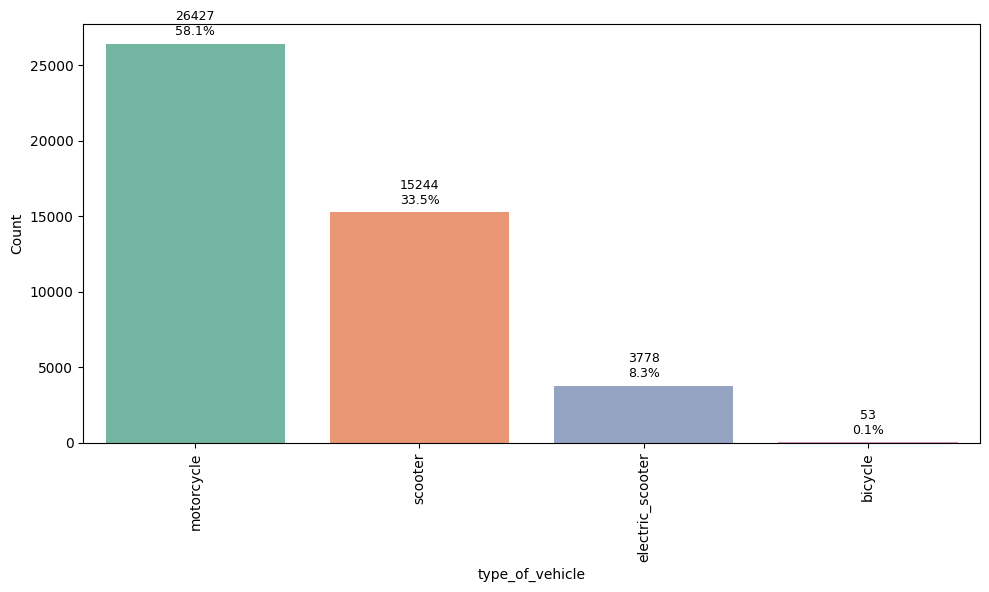

Count  Percentage
type_of_vehicle                    
motorcycle        26427       58.08
scooter           15244       33.50
electric_scooter   3778        8.30
bicycle              53        0.12

In [112]:
categorical_analysis(df, "type_of_vehicle")

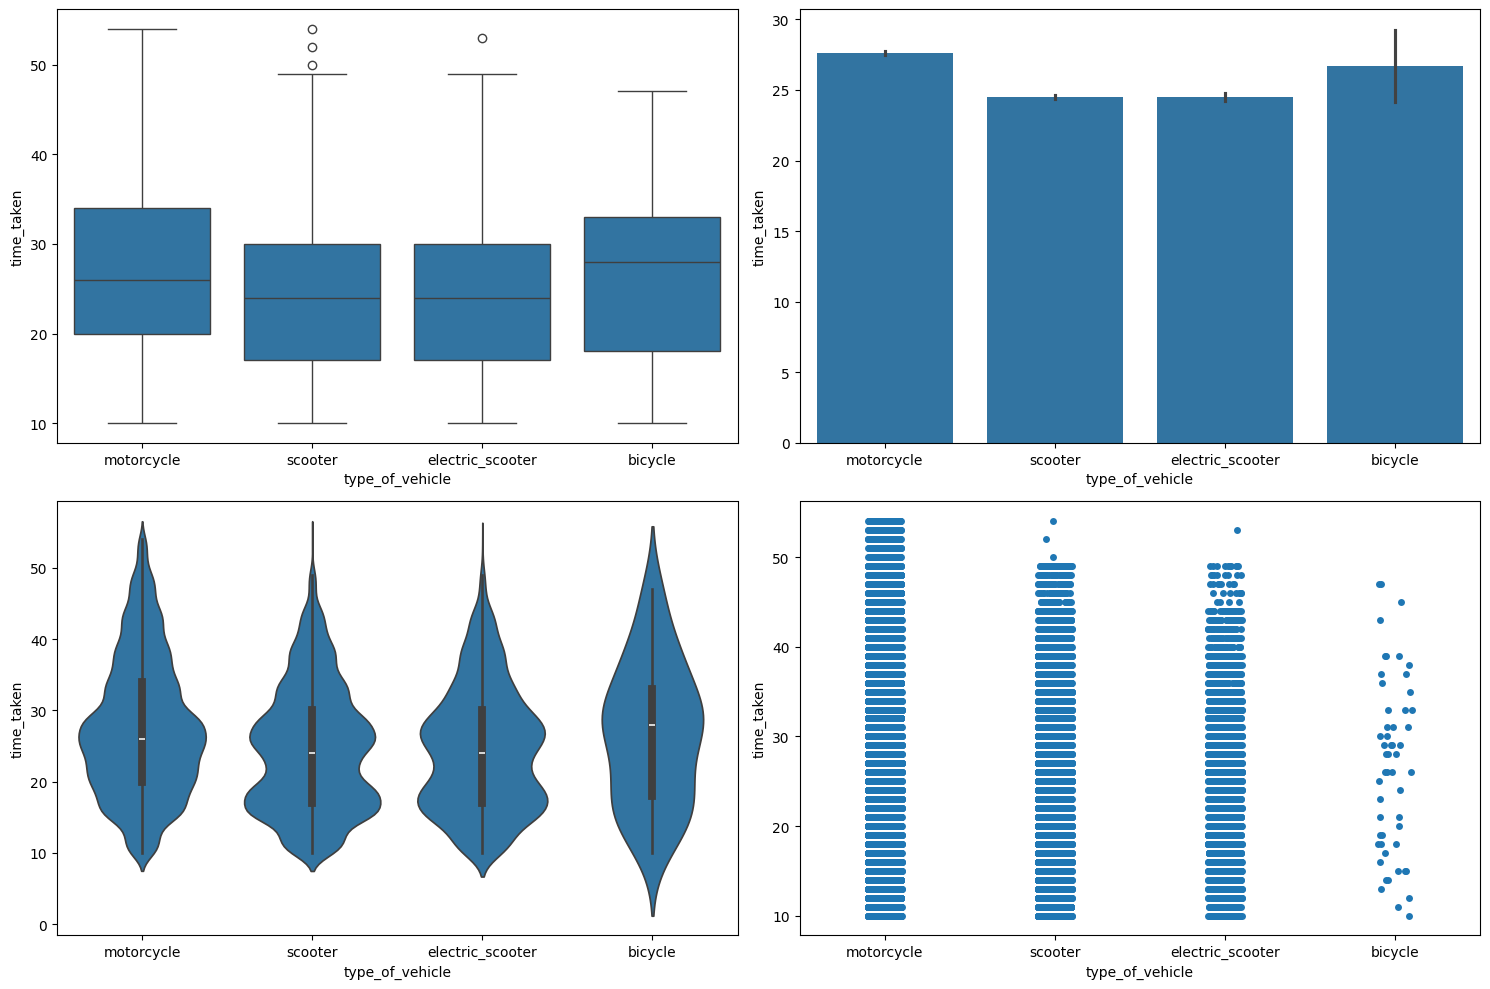

In [113]:
numerical_categorical_analysis(df, "type_of_vehicle","time_taken")

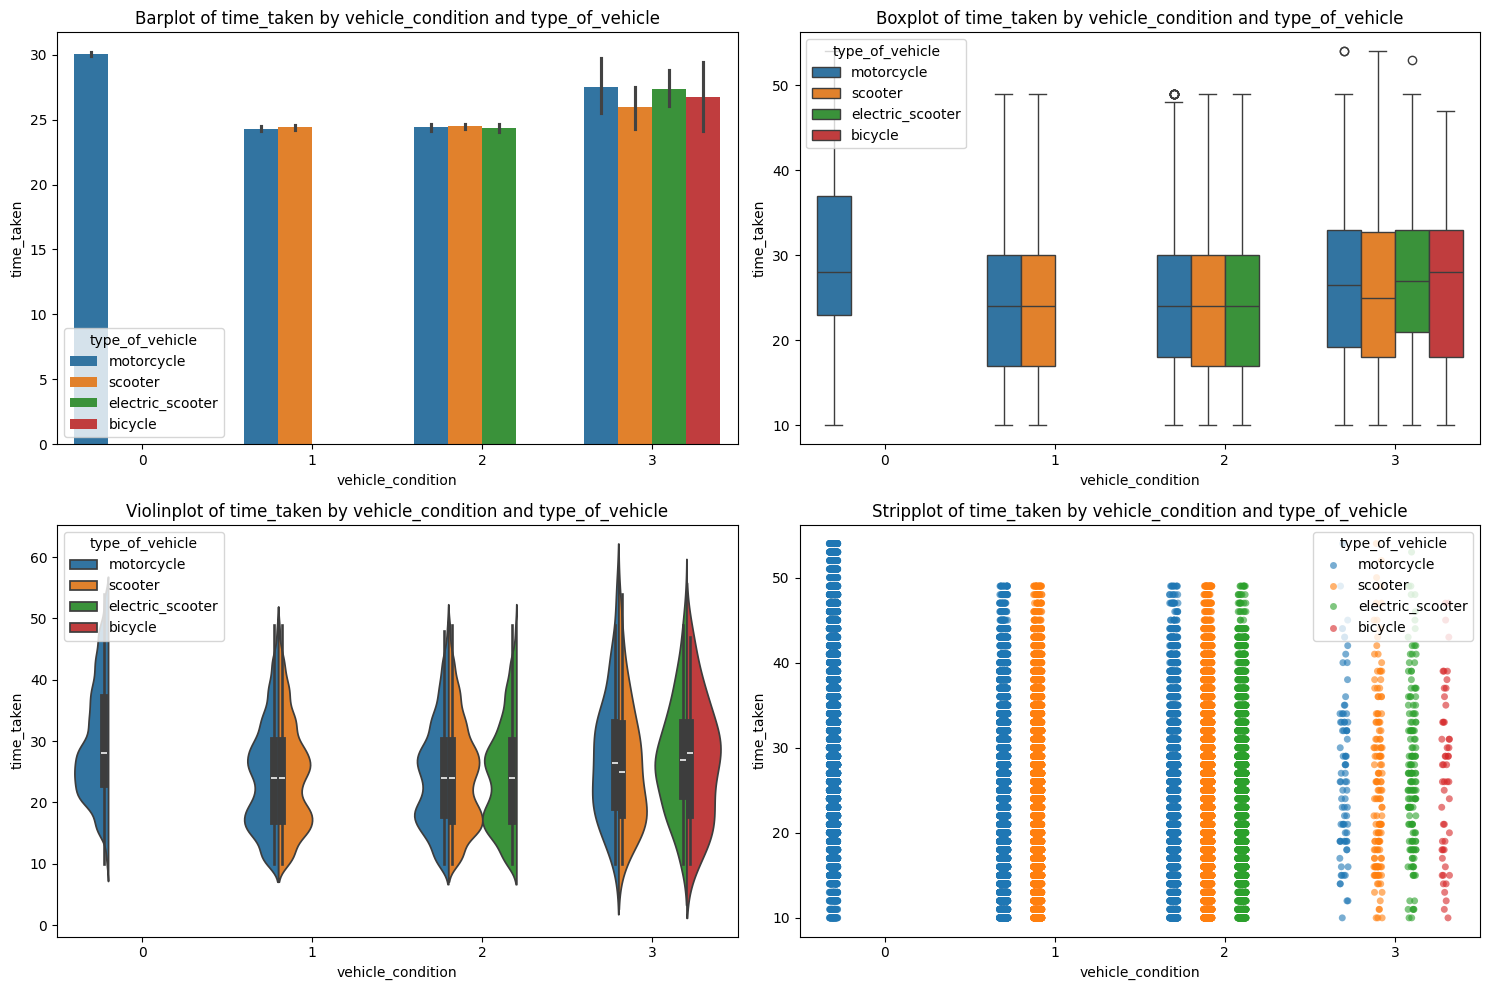

In [117]:
multivariate_analysis(df, "time_taken","vehicle_condition","type_of_vehicle")

In [118]:
chi_2_test(df, "vehicle_condition","type_of_vehicle")

0.0
Reject the null hypothesis. There is a significant association between vehicle_condition and type_of_vehicle.


# Type Of Order

In [120]:
df['type_of_order'].dtype

dtype('O')

Count  Percentage
type_of_order                   
snack          11512       25.30
meal           11435       25.13
drinks         11294       24.82
buffet         11261       24.75

**************************************************
Unique categories (sample up to 20): ['snack', 'drinks', 'buffet', 'meal']
Number of categories: 4
**************************************************


/tmp/ipython-input-592092594.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-592092594.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



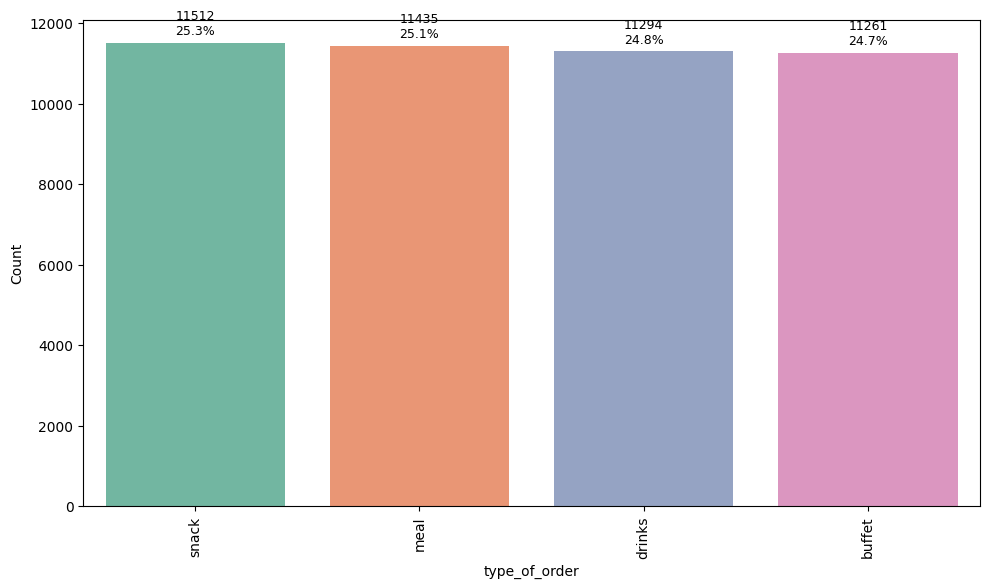

Count  Percentage
type_of_order                   
snack          11512       25.30
meal           11435       25.13
drinks         11294       24.82
buffet         11261       24.75

In [121]:
categorical_analysis(df, 'type_of_order')

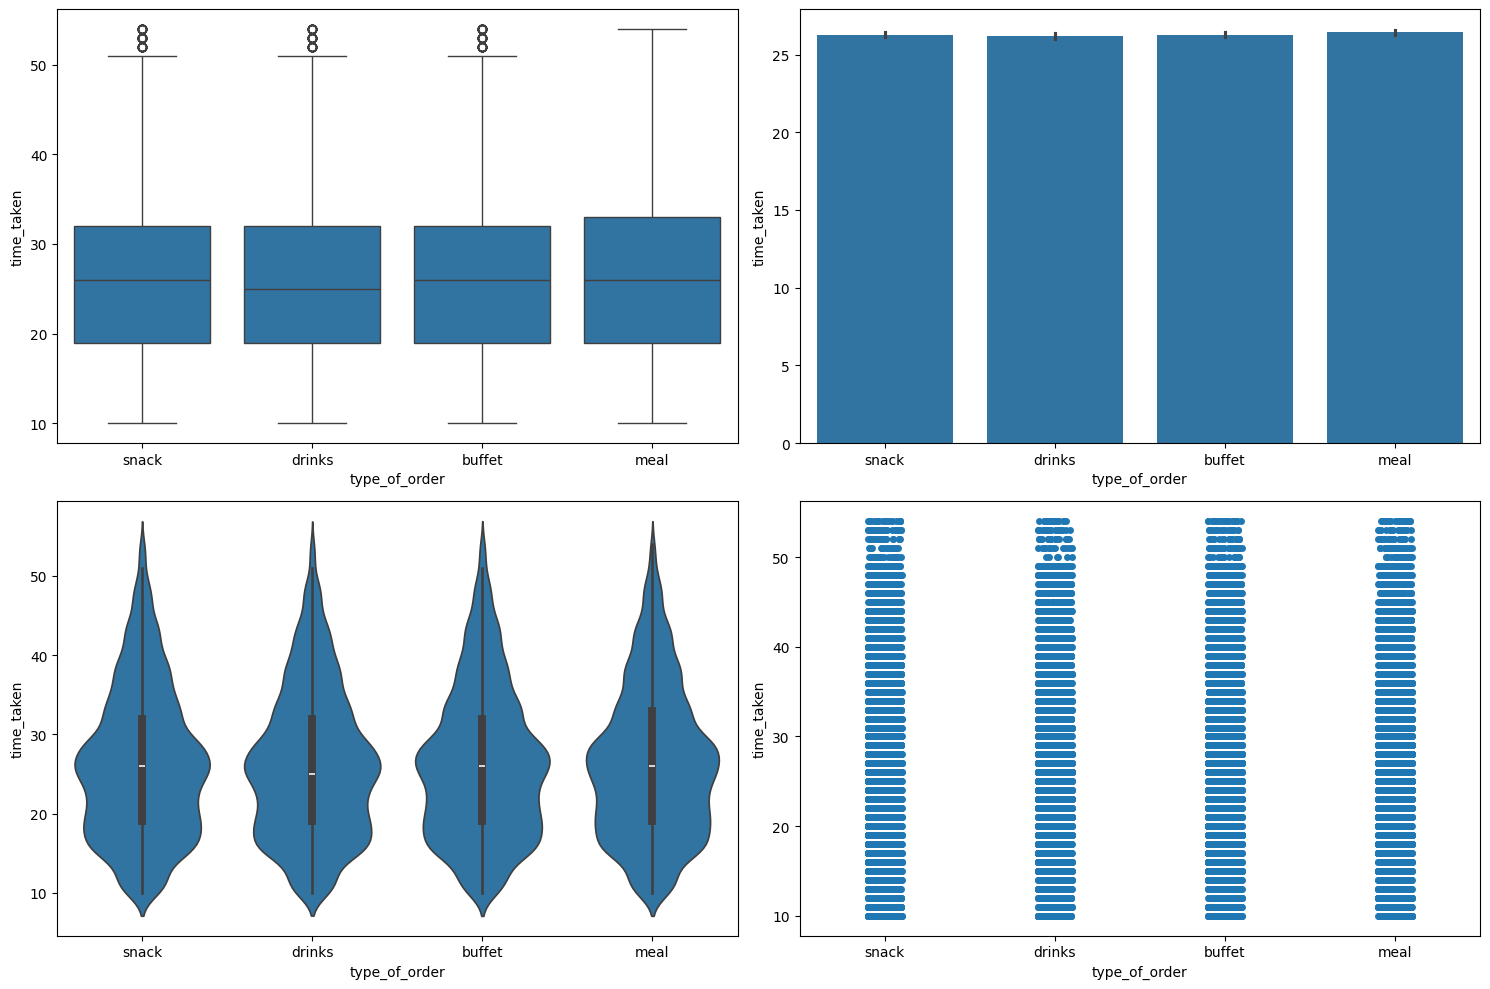

In [122]:
numerical_categorical_analysis(df, "type_of_order","time_taken")

In [123]:
annova_test(df, "time_taken","type_of_order")

0.3043309877239704
Fail to reject the null hypothesis. There is no significant relationship between  time_taken and type_of_order.


In [125]:
pd.crosstab(df['type_of_order'],df['is_weekend'])

is_weekend        0     1
type_of_order            
buffet         8238  3023
drinks         8130  3164
meal           8290  3145
snack          8337  3175

In [127]:
chi_2_test(df, "pickup_time_minutes","type_of_order")

0.0808538276538974
Fail to reject the null hypothesis. There is no significant association between pickup_time_minutes and type_of_order.


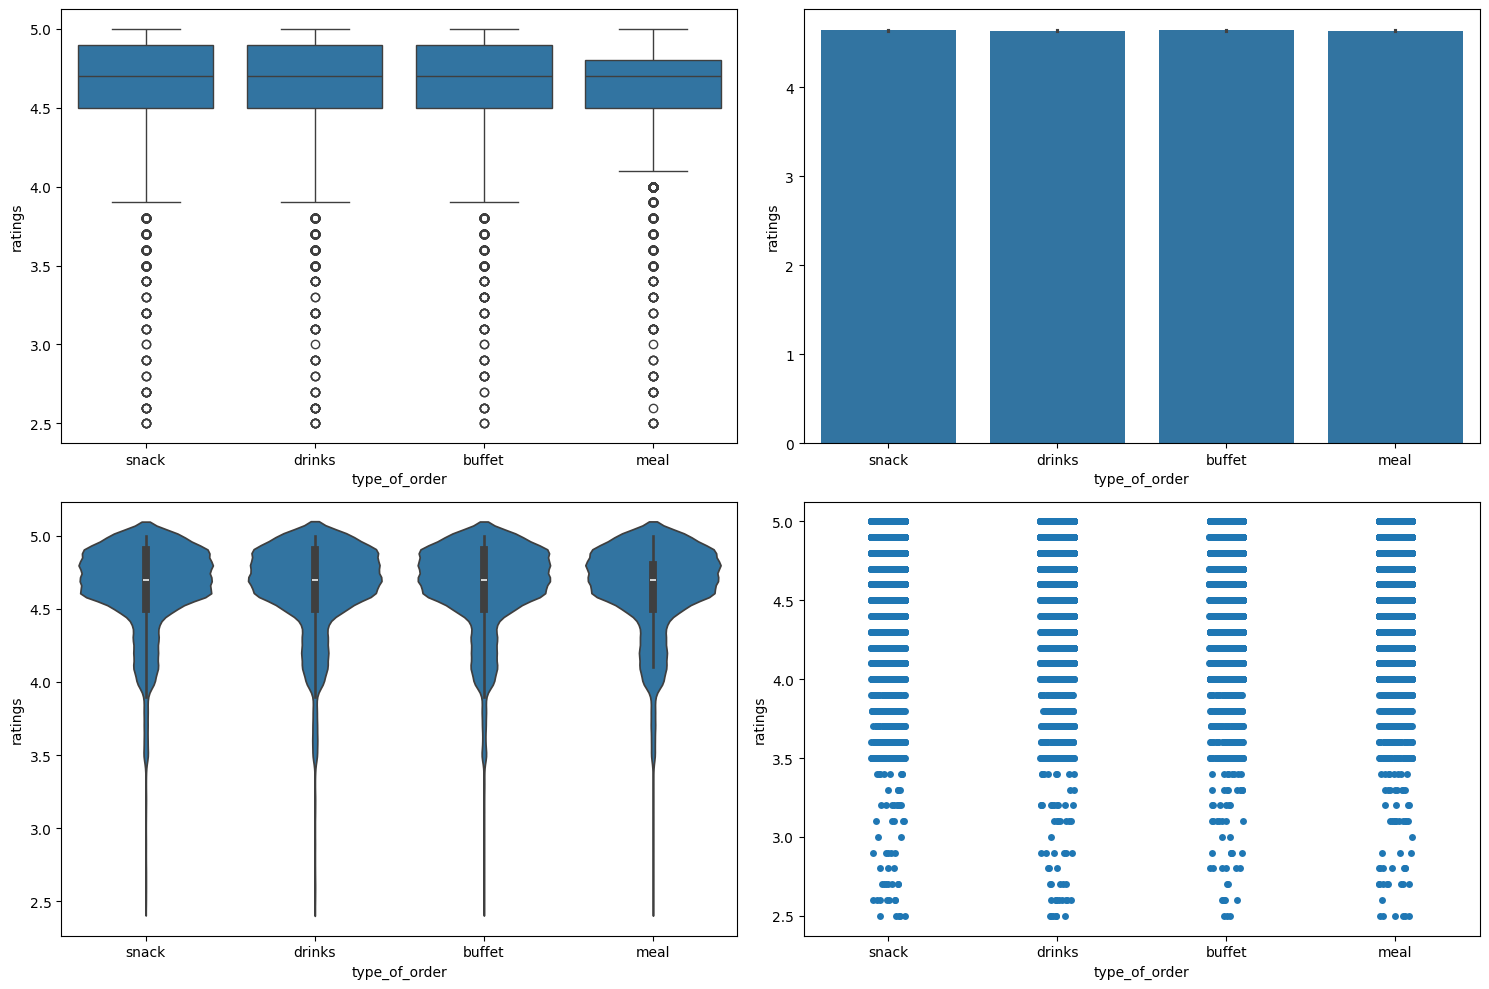

In [128]:
numerical_categorical_analysis(df, "type_of_order","ratings")

In [129]:
chi_2_test(df, "is_weekend","type_of_order")

0.2658161540207276
Fail to reject the null hypothesis. There is no significant association between is_weekend and type_of_order.


In [130]:
chi_2_test(df, "festival","type_of_order")

0.6149018072722126
Fail to reject the null hypothesis. There is no significant association between festival and type_of_order.


# City Name

Count  Percentage
city_name                   
JAP         3439        7.56
RANCHI      3222        7.08
BANG        3184        7.00
SUR         3182        6.99
HYD         3177        6.98
MUM         3168        6.96
MYS         3164        6.95
COIMB       3162        6.95
VAD         3159        6.94
INDO        3154        6.93
CHEN        3132        6.88
PUNE        3129        6.88
AGR          761        1.67
LUDH         758        1.67
ALH          738        1.62
KNP          737        1.62
DEH          735        1.62
GOA          709        1.56
AURG         703        1.54
KOC          701        1.54
KOL          699        1.54
BHP          689        1.51

**************************************************
Unique categories (sample up to 20): ['INDO', 'BANG', 'COIMB', 'CHEN', 'HYD', 'RANCHI', 'MYS', 'DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'KOL', 'JAP', 'SUR', 'GOA', 'AURG', 'AGR', 'VAD']
Number of categories: 22
**************************************************


/tmp/ipython-input-592092594.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-592092594.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



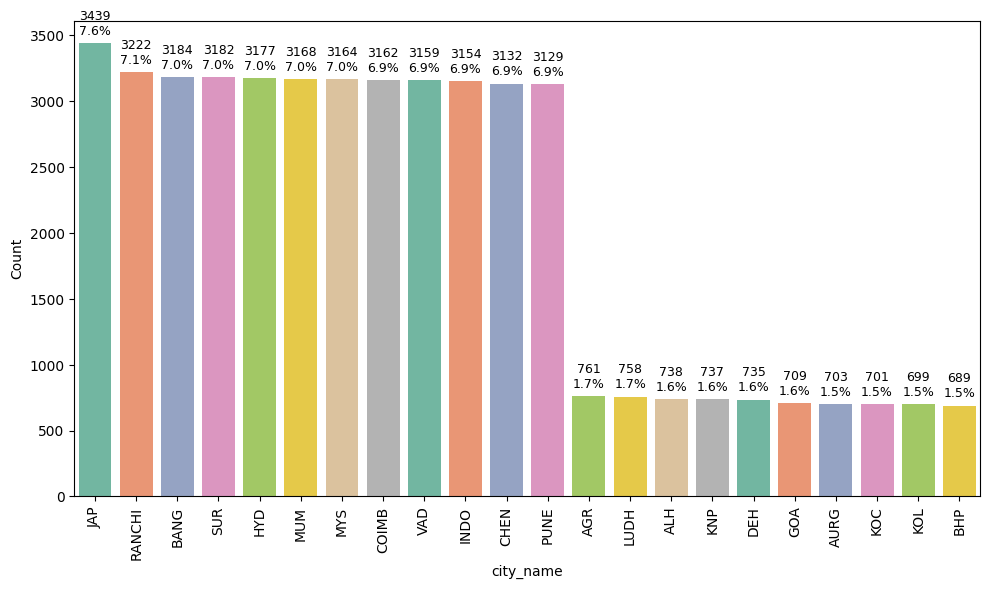

Count  Percentage
city_name                   
JAP         3439        7.56
RANCHI      3222        7.08
BANG        3184        7.00
SUR         3182        6.99
HYD         3177        6.98
MUM         3168        6.96
MYS         3164        6.95
COIMB       3162        6.95
VAD         3159        6.94
INDO        3154        6.93
CHEN        3132        6.88
PUNE        3129        6.88
AGR          761        1.67
LUDH         758        1.67
ALH          738        1.62
KNP          737        1.62
DEH          735        1.62
GOA          709        1.56
AURG         703        1.54
KOC          701        1.54
KOL          699        1.54
BHP          689        1.51

In [131]:
categorical_analysis(df,"city_name")

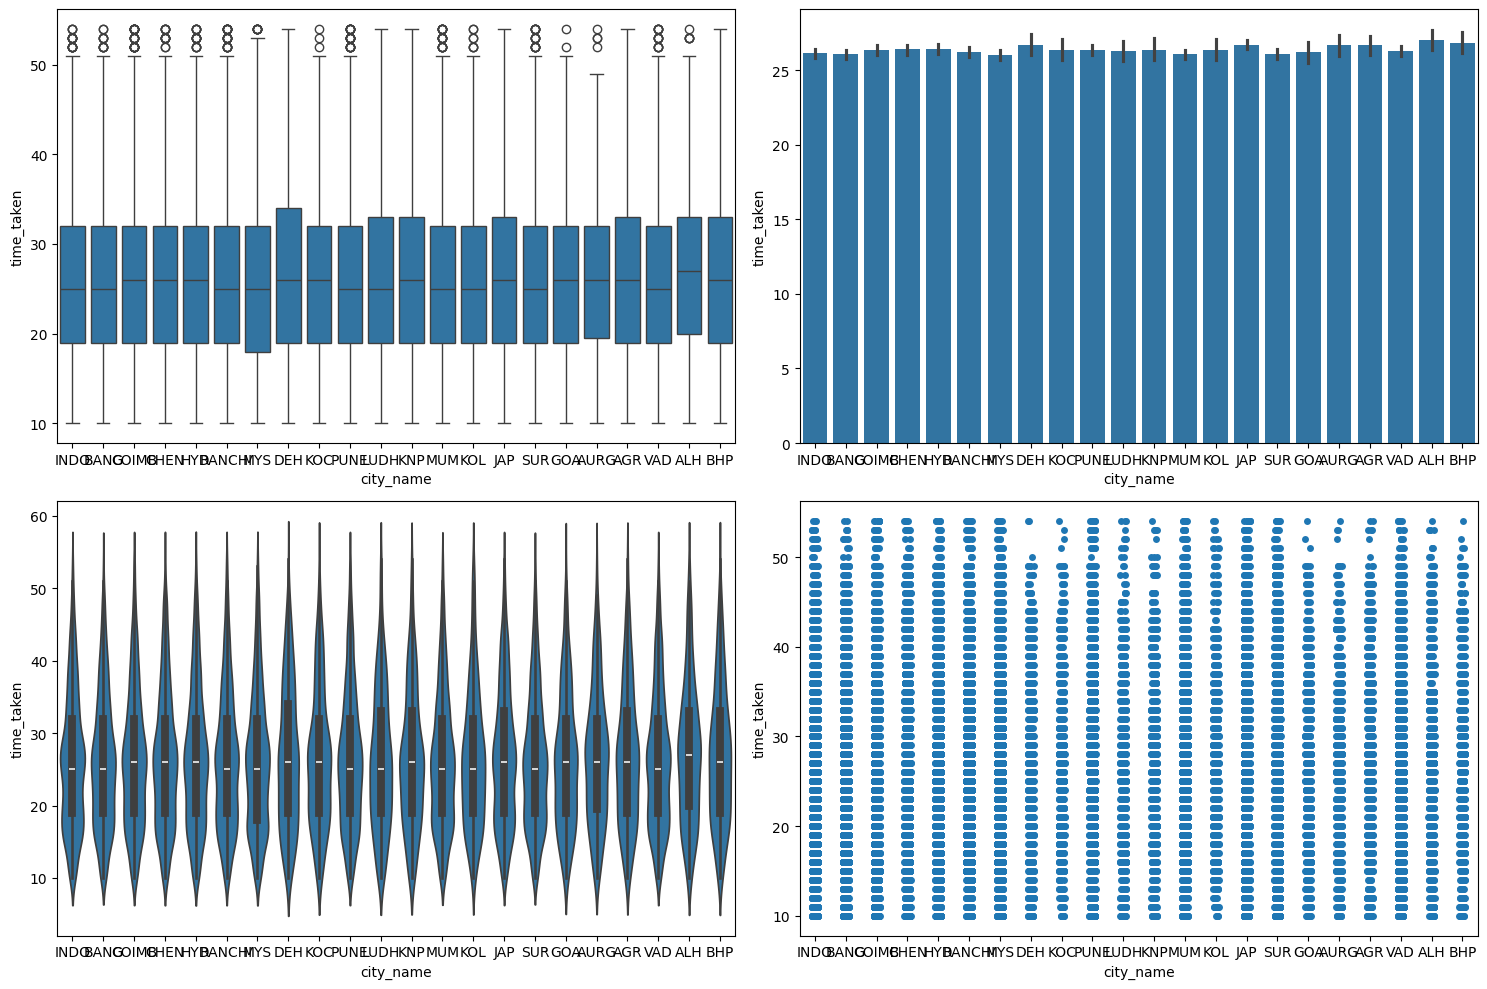

In [132]:
numerical_categorical_analysis(df, "city_name","time_taken")

Count  Percentage
city_type                       
metropolitian  34029       74.79
urban          10111       22.22
NaN             1198        2.63
semi-urban       164        0.36

**************************************************
Unique categories (sample up to 20): ['urban', 'metropolitian', 'semi-urban']
Number of categories: 4
**************************************************


/tmp/ipython-input-592092594.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-592092594.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



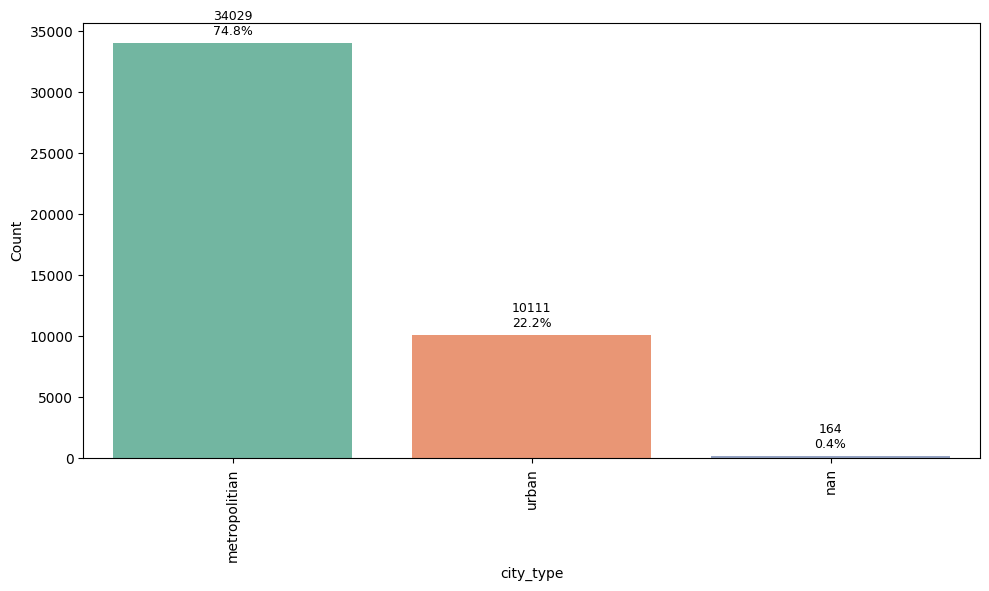

Count  Percentage
city_type                       
metropolitian  34029       74.79
urban          10111       22.22
NaN             1198        2.63
semi-urban       164        0.36

In [134]:
categorical_analysis(df,"city_type")

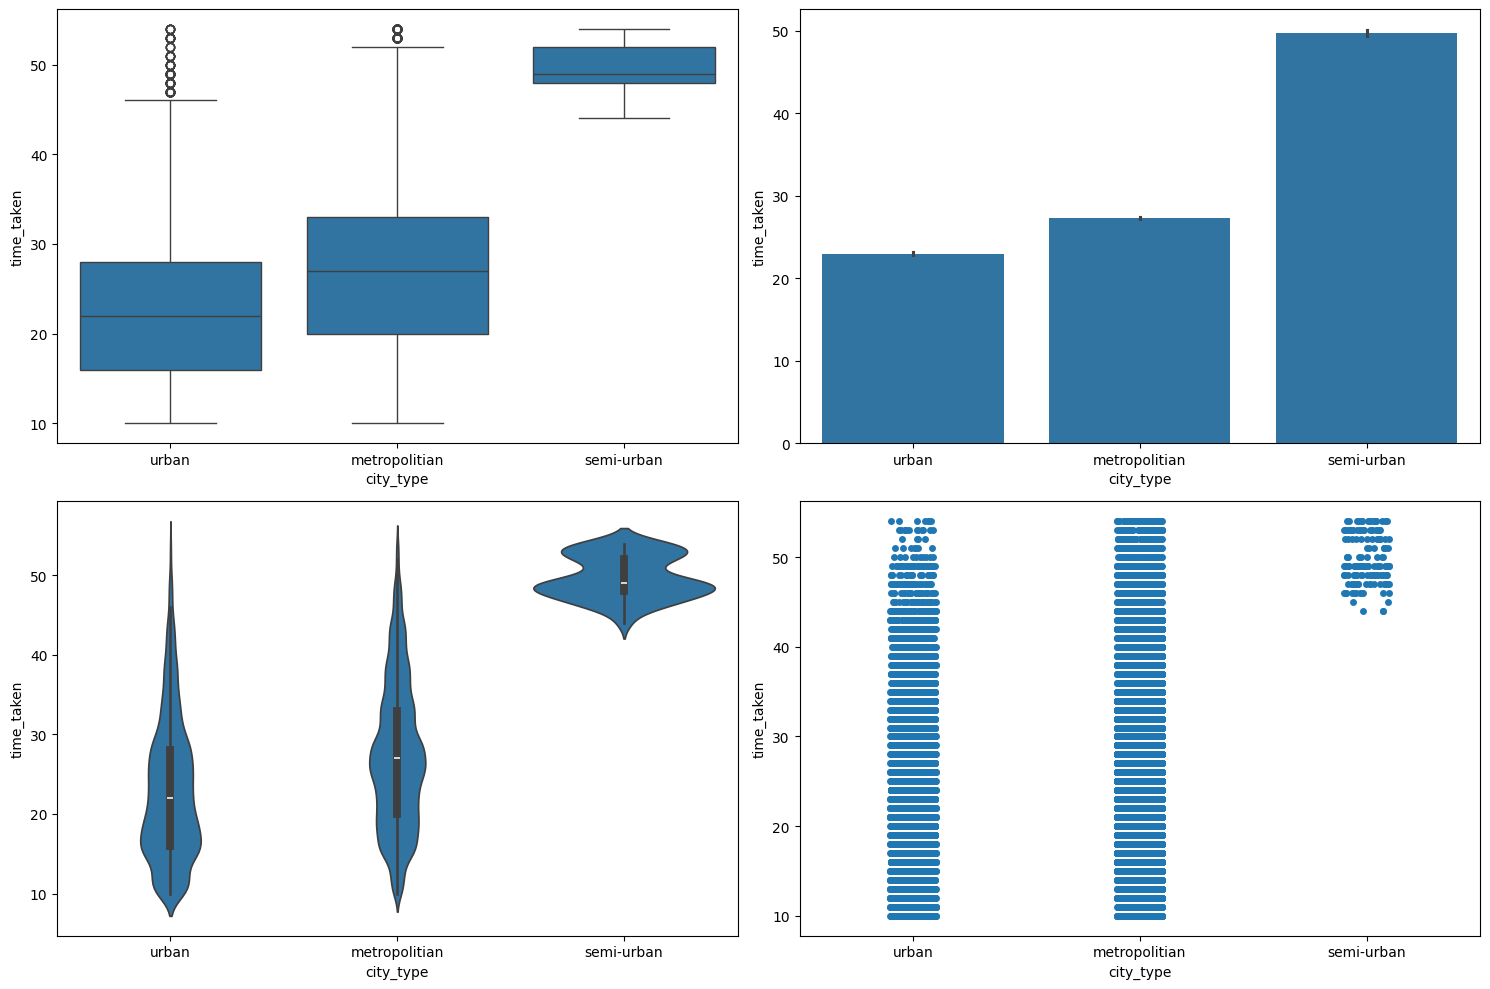

In [136]:
numerical_categorical_analysis(df, "city_type","time_taken")

In [137]:
annova_test(df, "time_taken", "city_type")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and city_type.


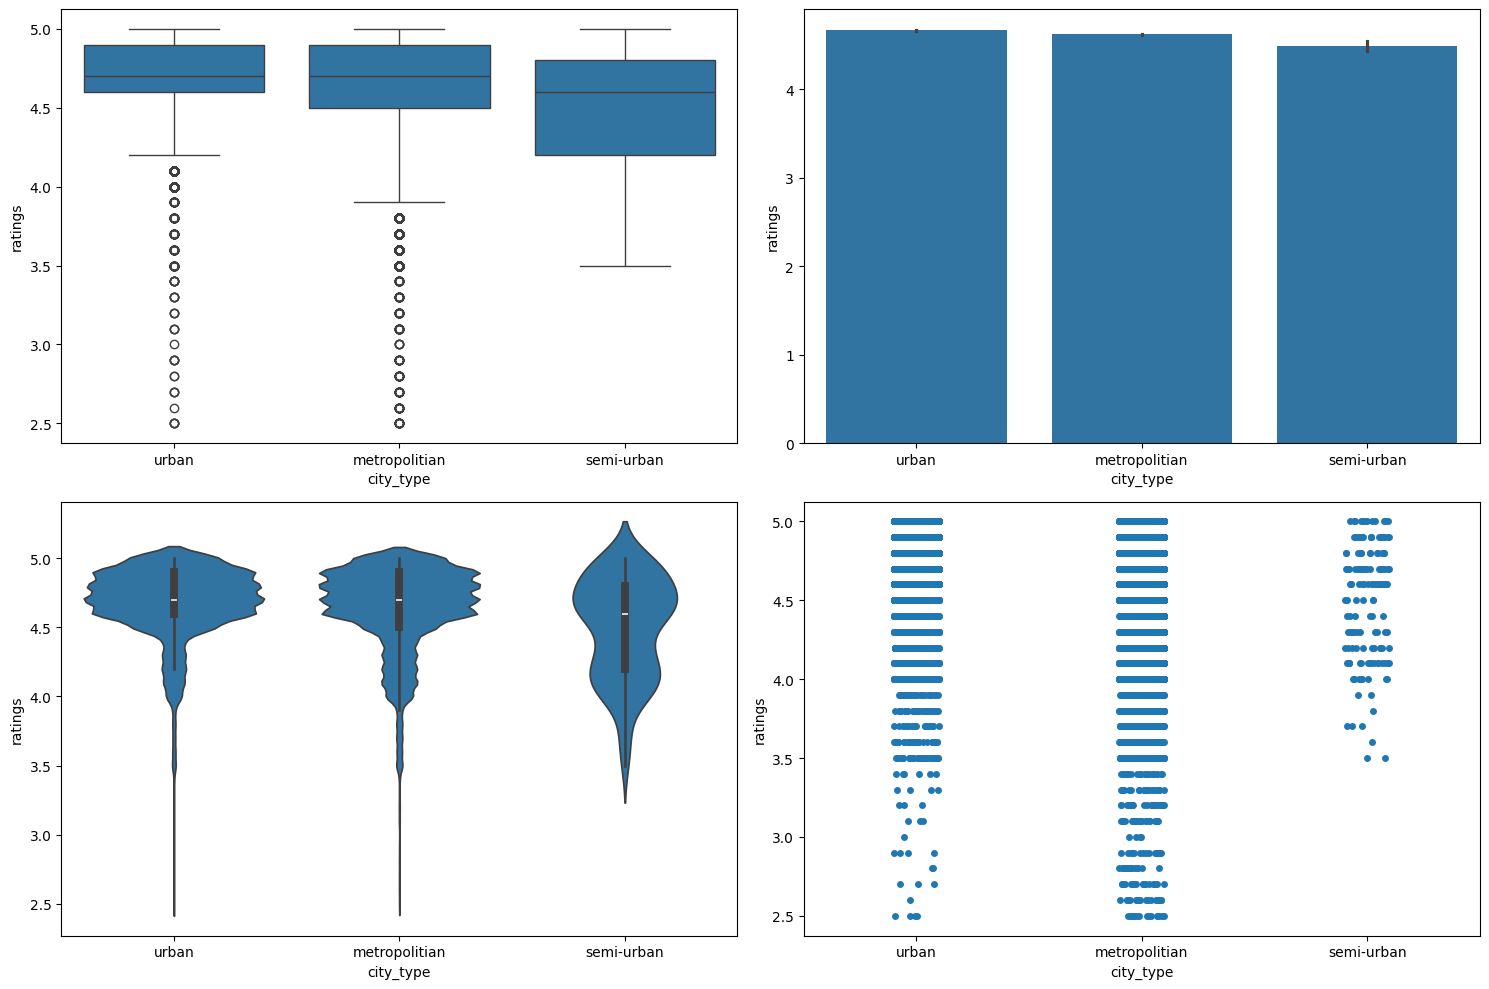

In [138]:
numerical_categorical_analysis(df,"city_type","ratings")

In [139]:
annova_test(df, "time_taken", "ratings")

0.0
Reject the null hypothesis. There is a significant relationship between time_taken and ratings.


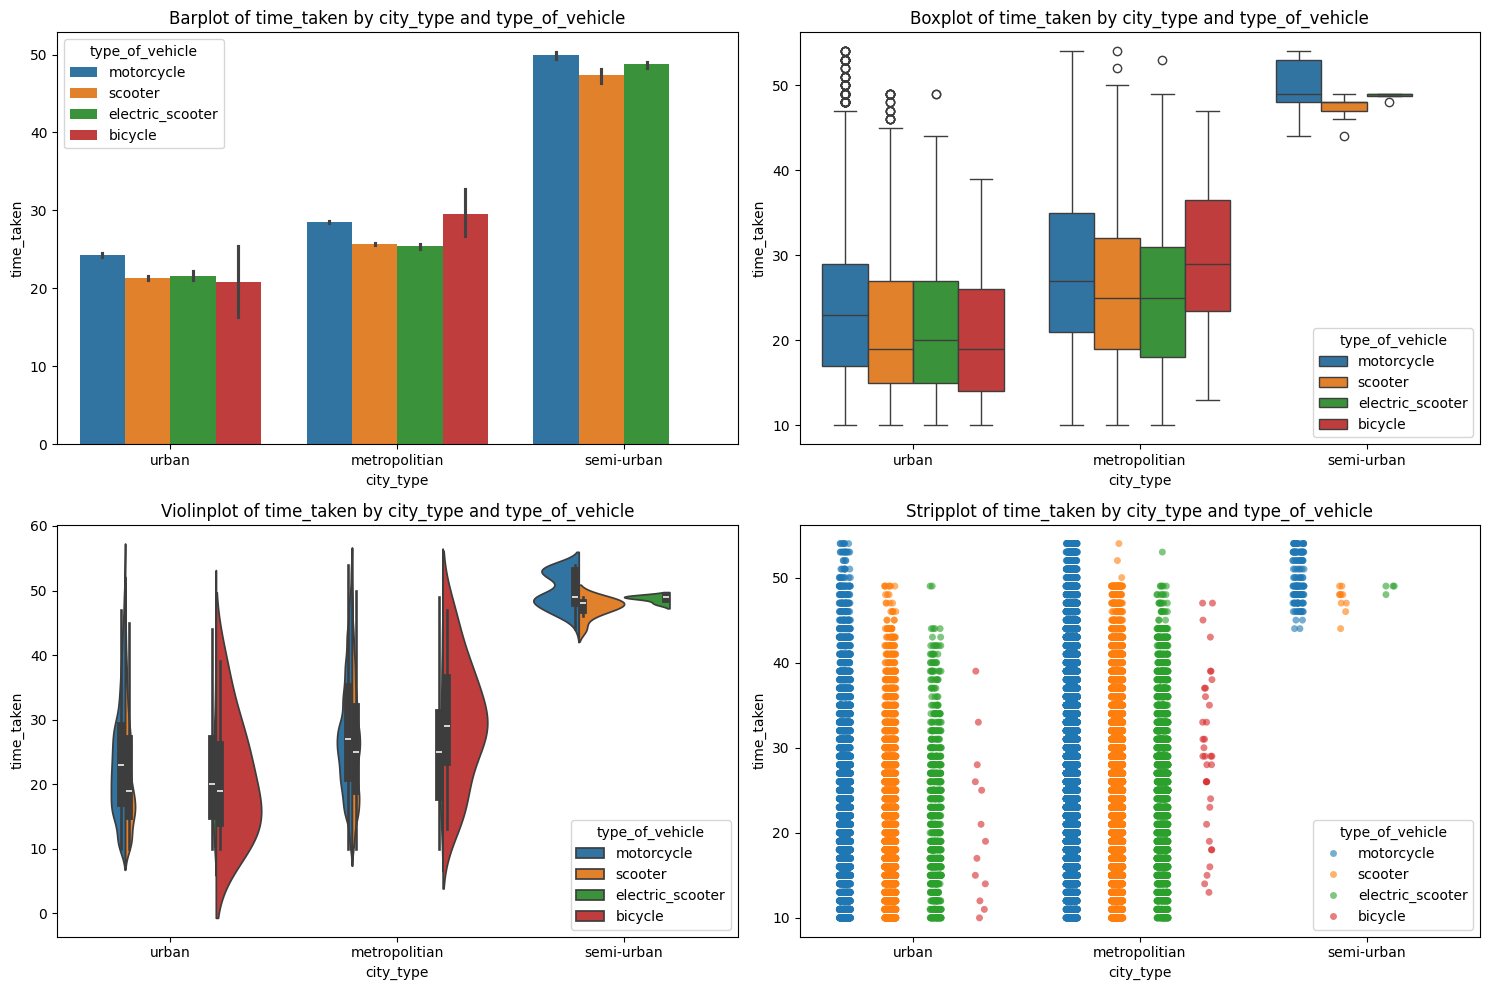

In [141]:
multivariate_analysis(df, "time_taken","city_type","type_of_vehicle")

# Distance

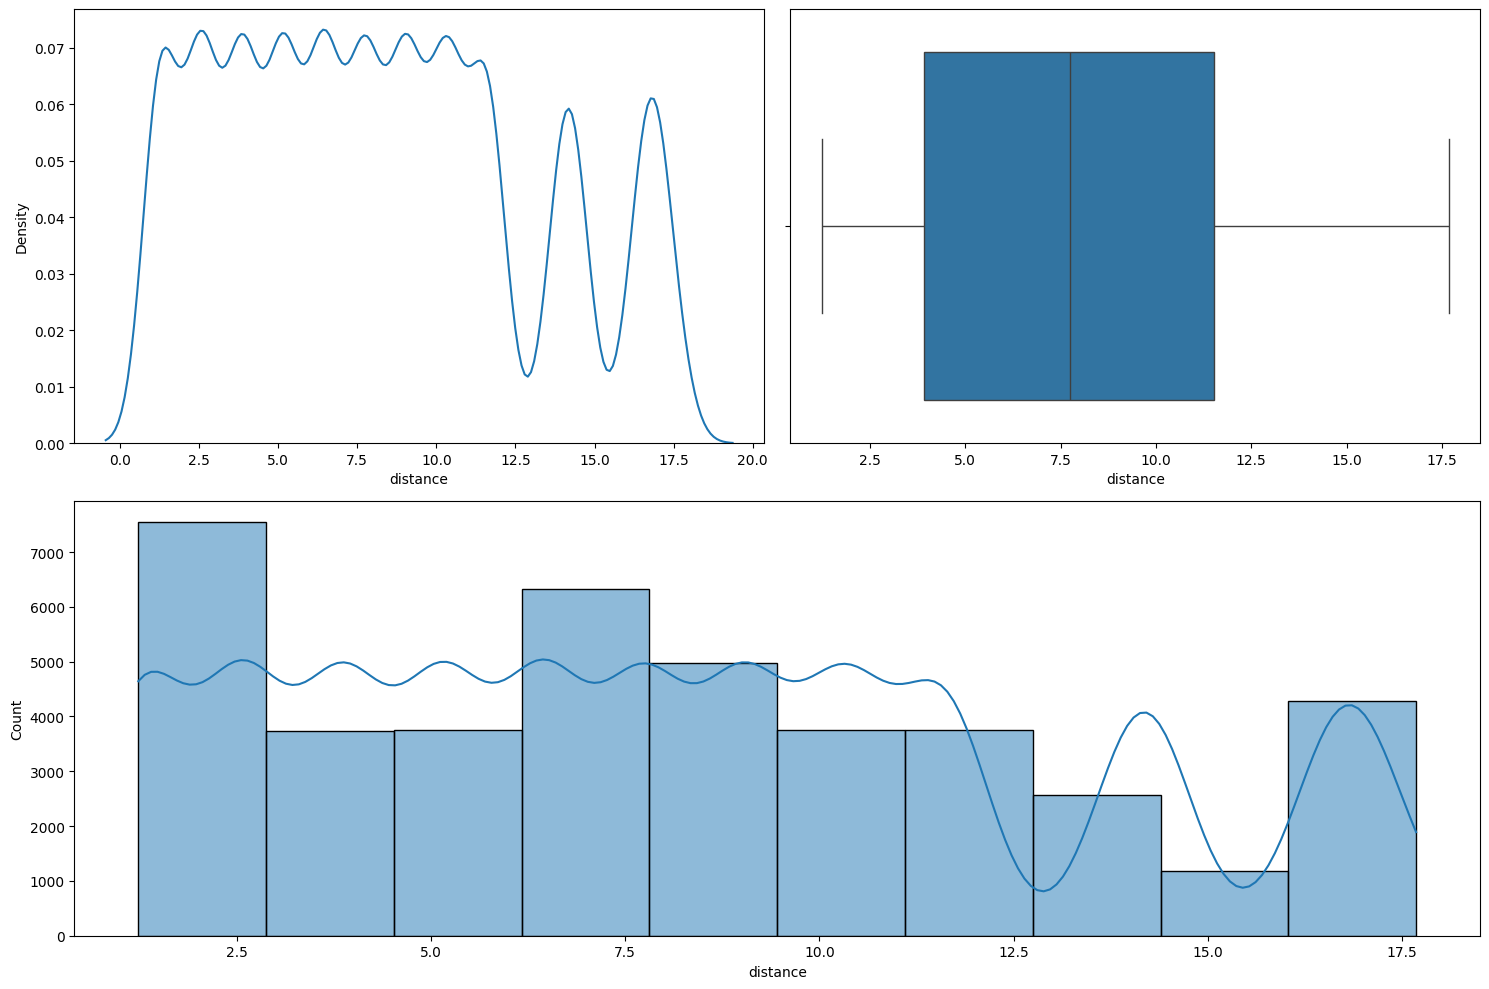

In [142]:
numerical_analysis(df, "distance", bins=10)

<Axes: xlabel='distance', ylabel='time_taken'>

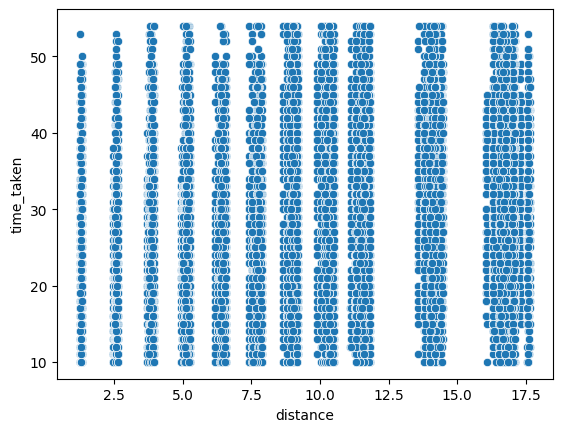

In [143]:
sns.scatterplot(df, x="distance",y="time_taken")

In [144]:
df[["distance","time_taken"]].corr()

distance  time_taken
distance    1.000000    0.320705
time_taken  0.320705    1.000000

In [ ]:
numerical_categorical_analysis(df, "distance","type_of_vehicle")

In [ ]:
numerical_categorical_analysis(df,"distance","festival")

In [ ]:
numerical_categorical_analysis(df, "distance","type_of_vehicle")